In [1]:
import numpy as np
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type = 'nf'
fname = 'v0'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

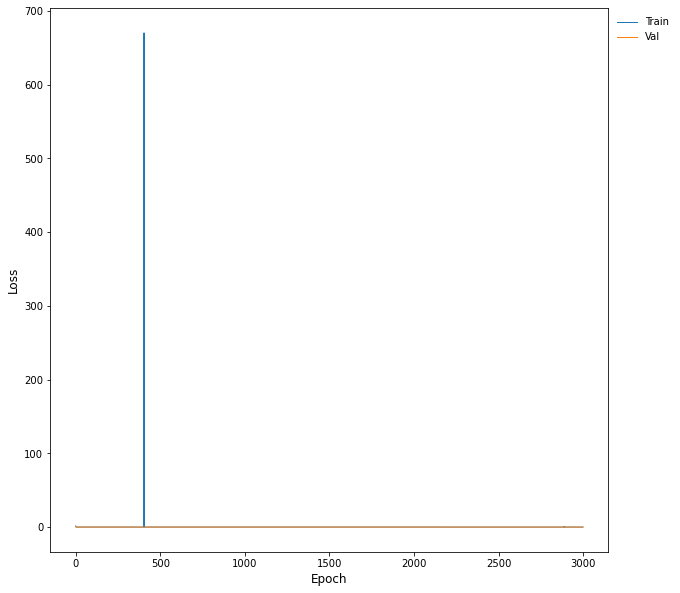

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale('log')
# plt.ylim(0,1.1*train_loss_list[0])
plt.show()

In [6]:
# Get predictions and ground truths
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs)
mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df = get_metric_dataframes(configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

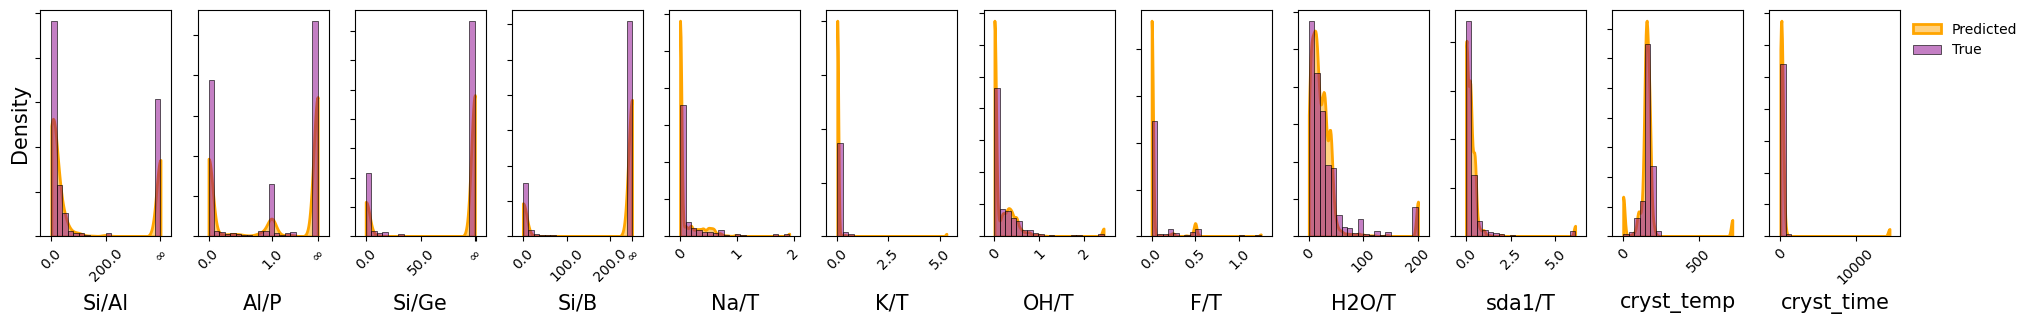

In [7]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, False], [False, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5)

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA
MMD: 0.18250370025634766
WSD: 0.13722946357808075


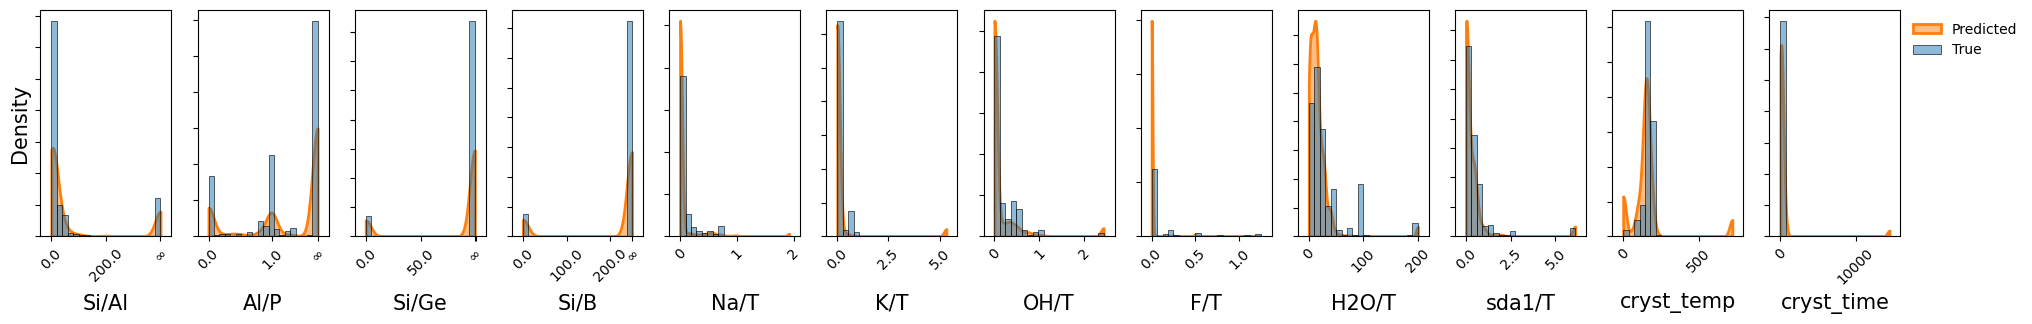

AEL
MMD: 0.504669189453125
WSD: 0.19270584940115815


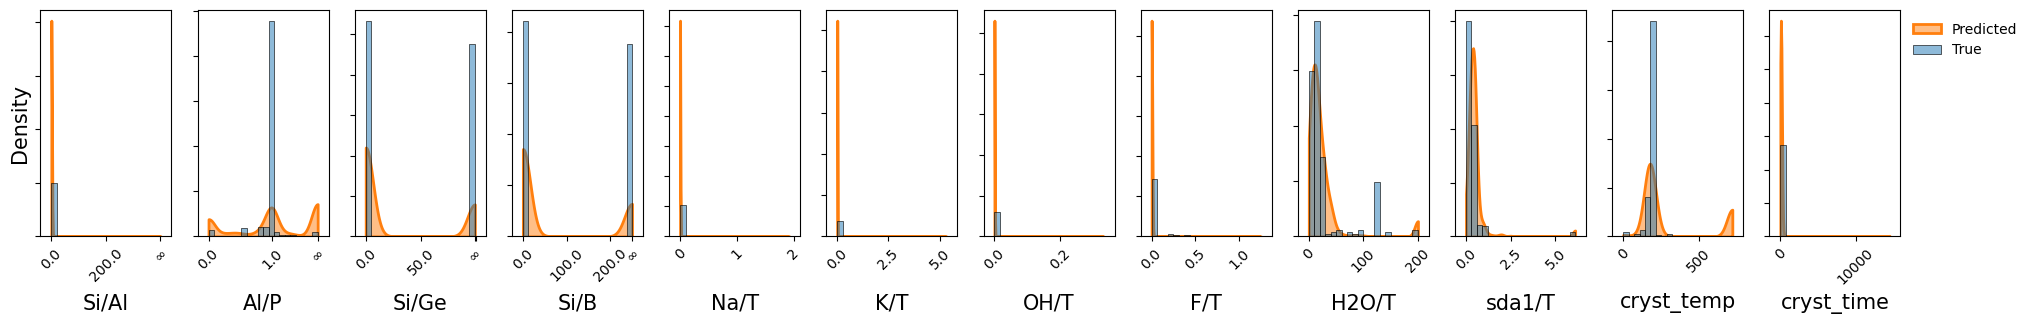

MFI
MMD: 0.06278800964355469
WSD: 0.06256845248806953


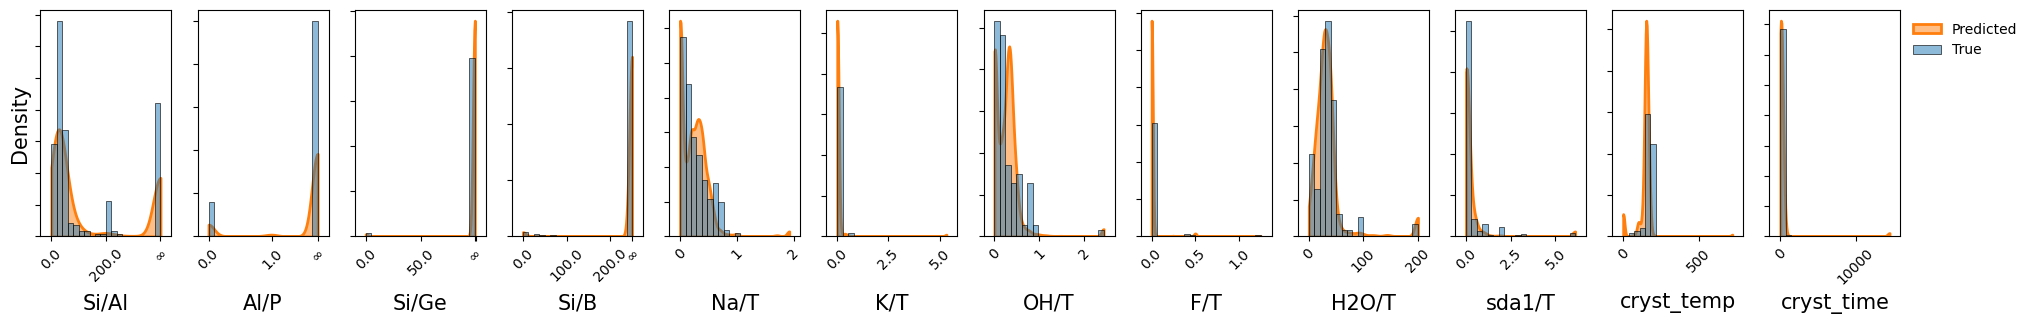

LTA
MMD: 0.35170650482177734
WSD: 0.19124305796518126


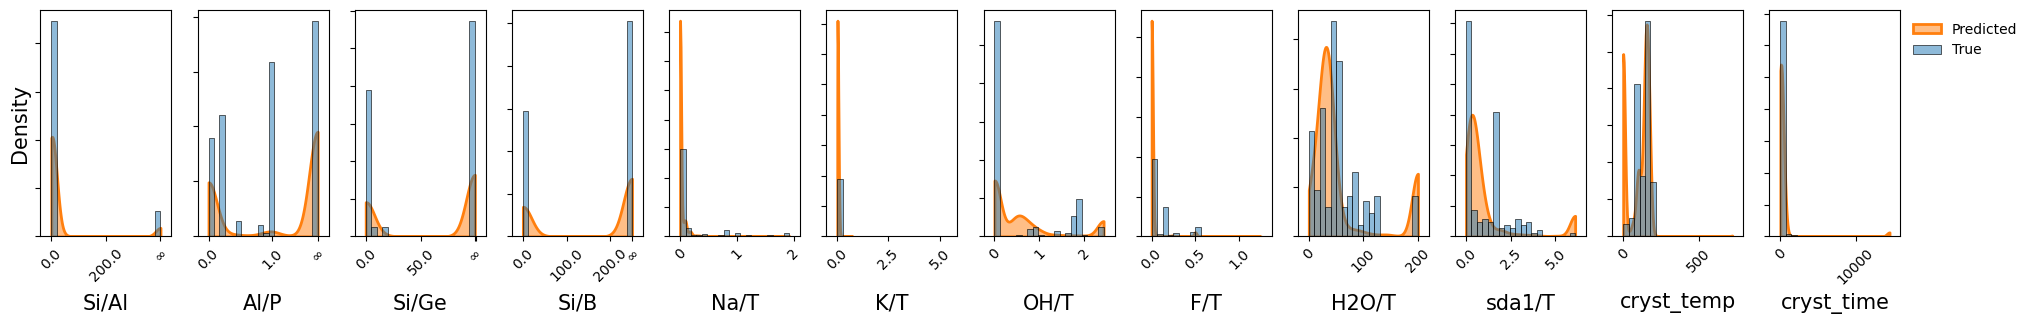

AFI
MMD: 0.16629505157470703
WSD: 0.09958181615554698


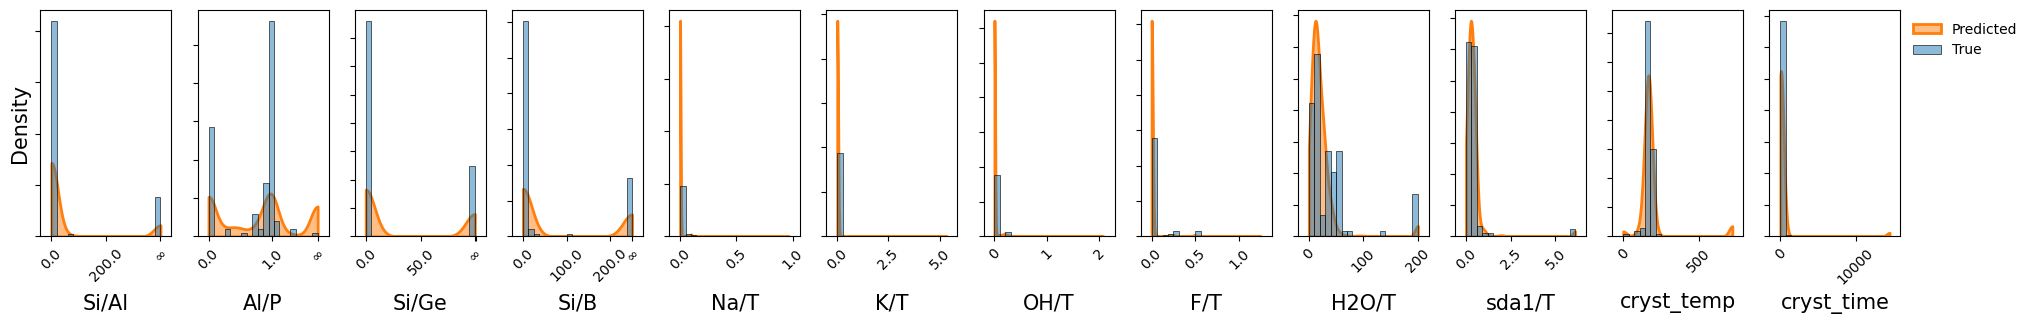

IWR
MMD: 0.8282861709594727
WSD: 0.49767819702225713


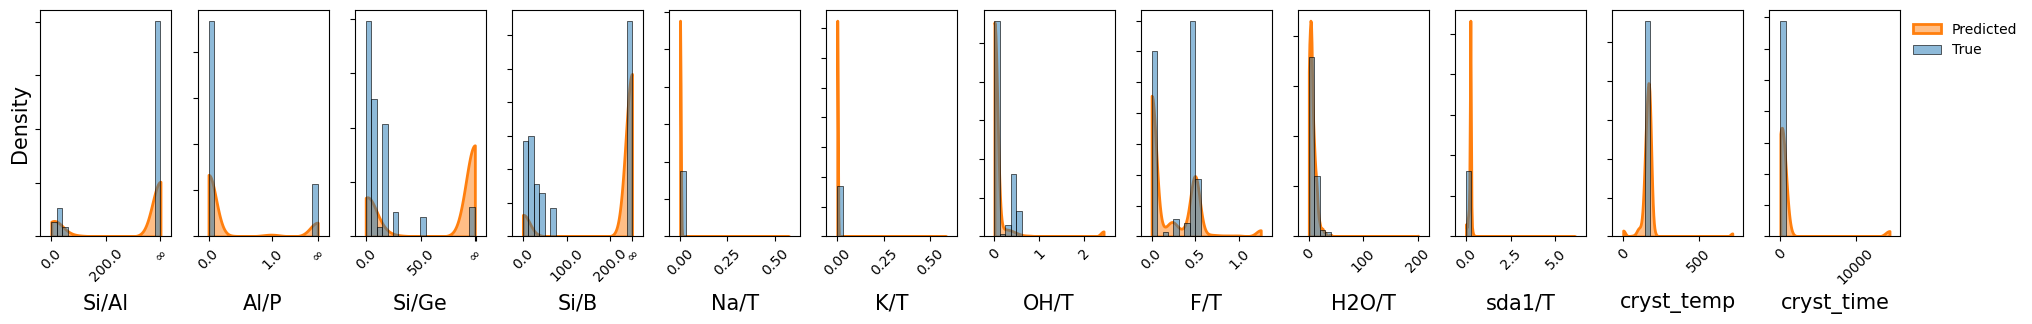

BEA
MMD: 0.06834793090820312
WSD: 0.1100962710980056


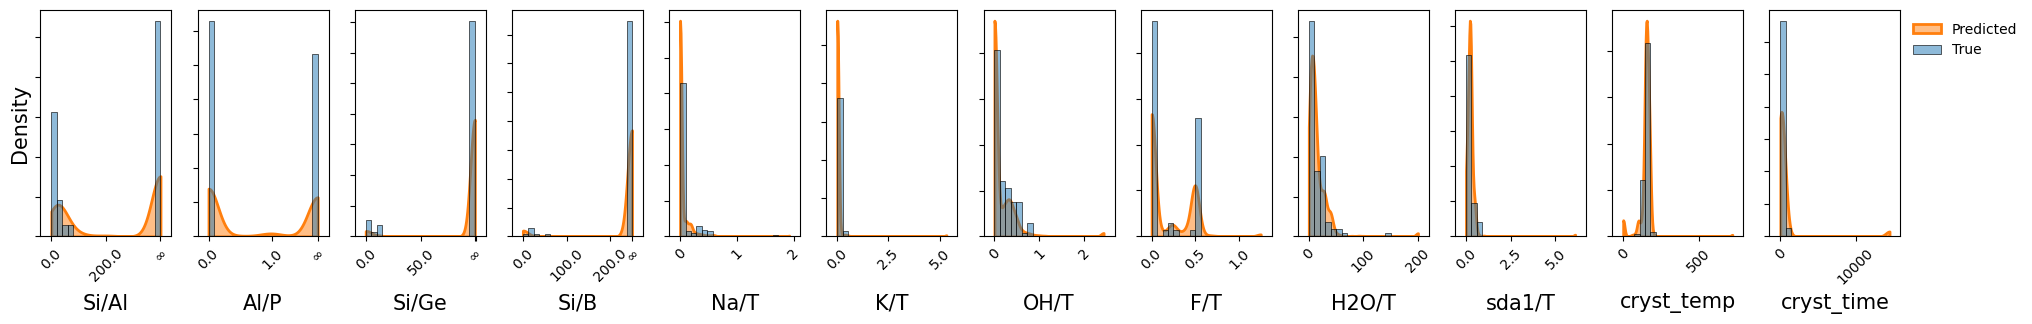

MTW
MMD: 0.07656192779541016
WSD: 0.07718815613933161


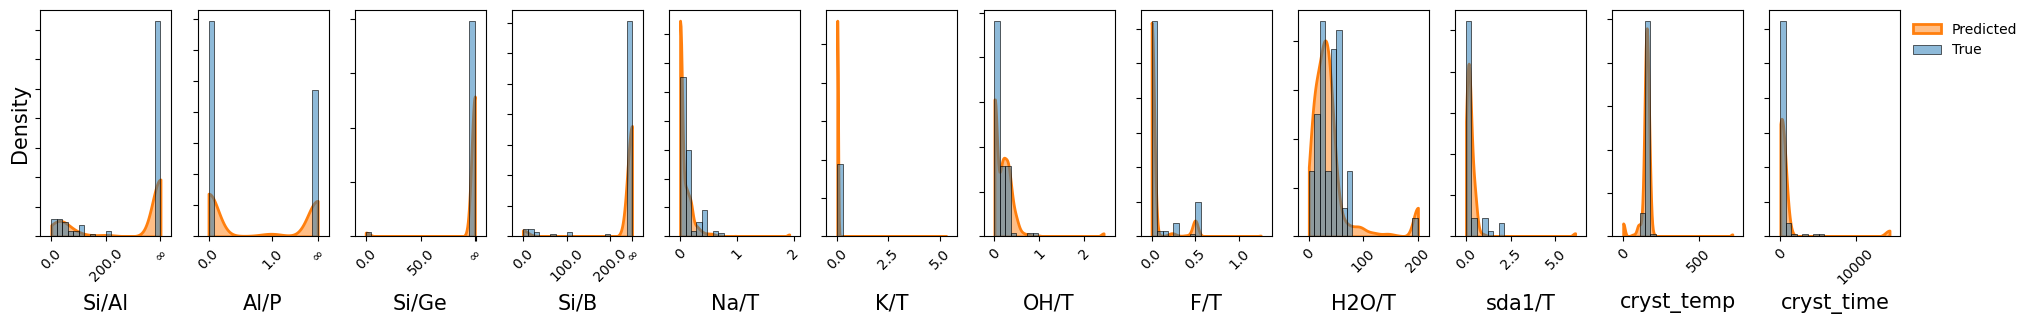

MEL
MMD: 0.11111736297607422
WSD: 0.1442199394368162


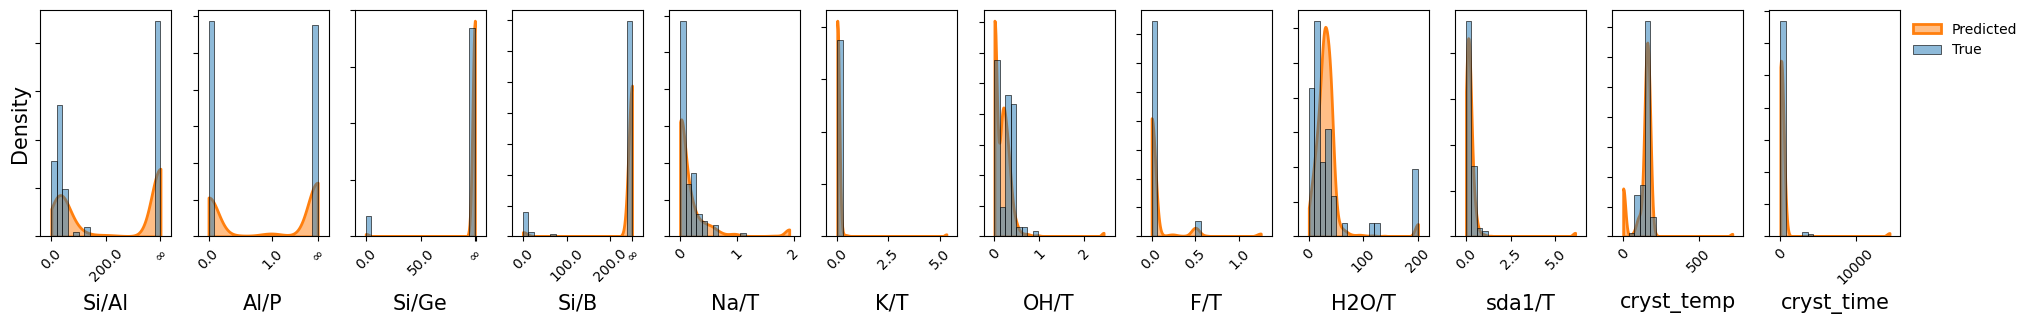

LEV
MMD: 0.3097543716430664
WSD: 0.11243253653334123


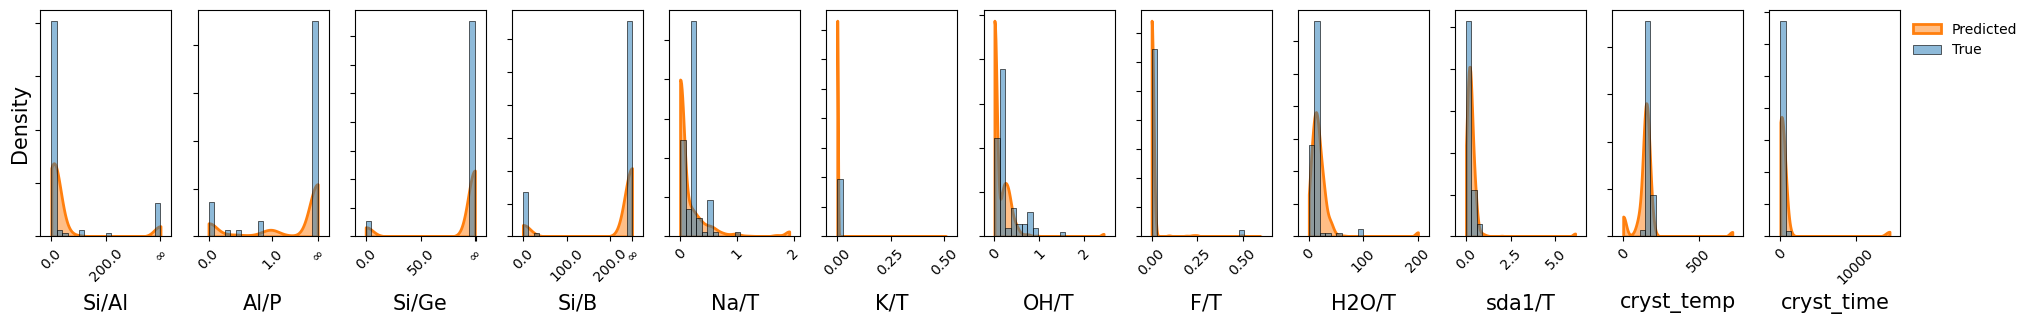

Mean MMD: 0.2662030220031738
Mean WSD: 0.16249437398177885


In [8]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 1.582735538482666
WSD: 0.7956103436464674


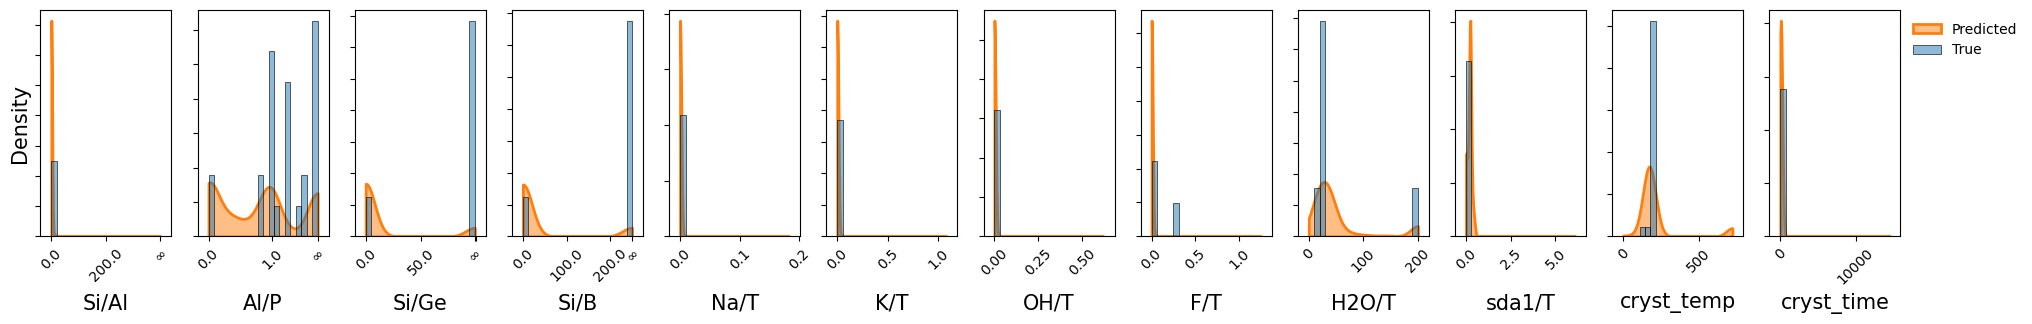

In [11]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 0.5573101043701172
WSD: 0.3062522806837143


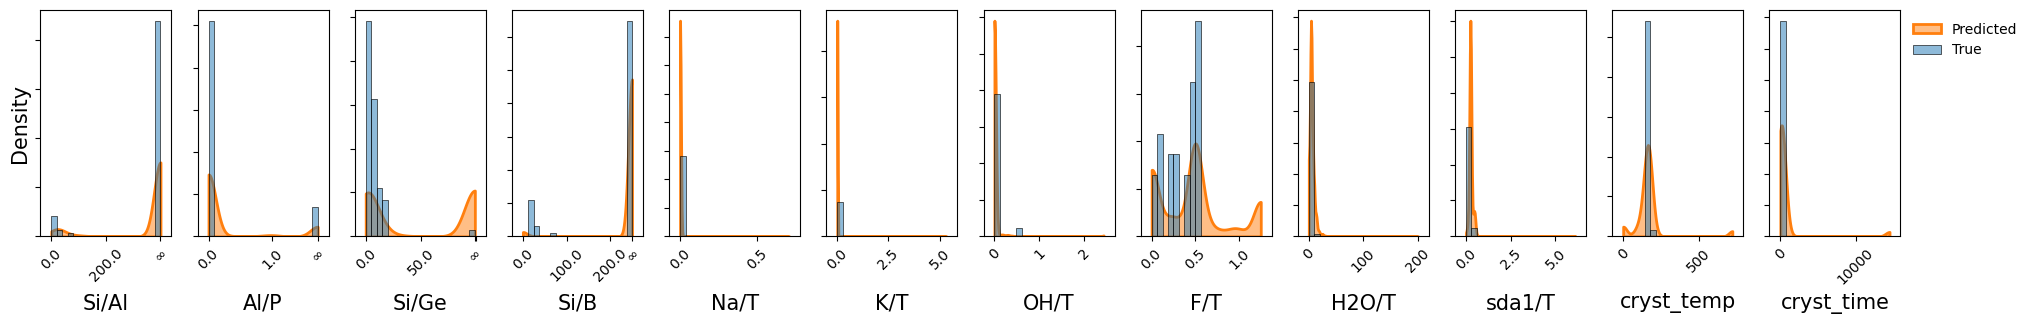

In [12]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 0.58563232421875
WSD: 0.2317287655838523


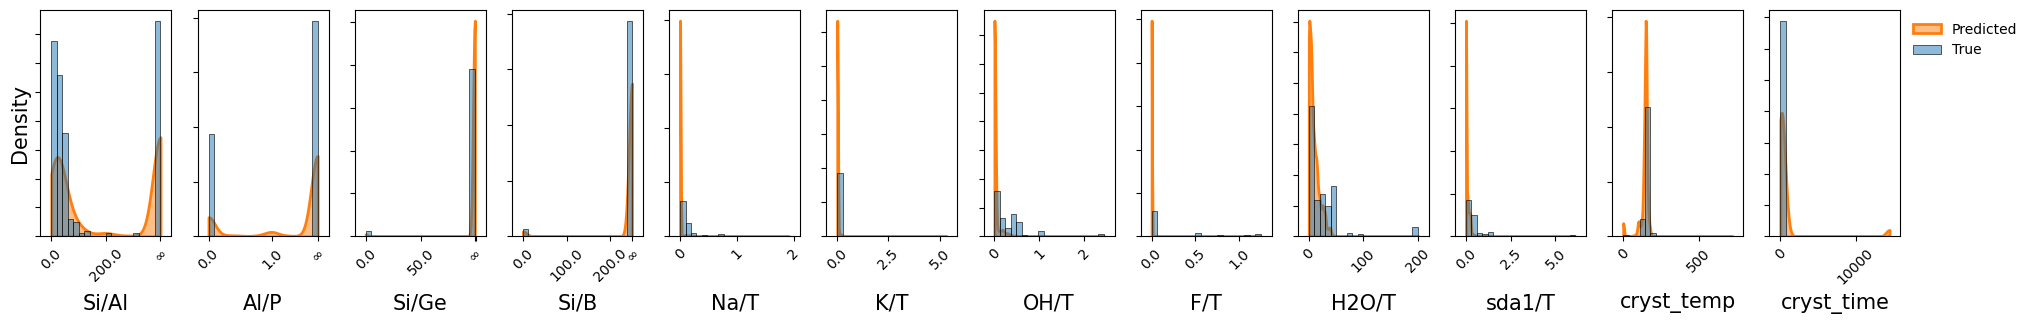

AEL CCCNCCC
MMD: 0.5074567794799805
WSD: 0.19775929615426294


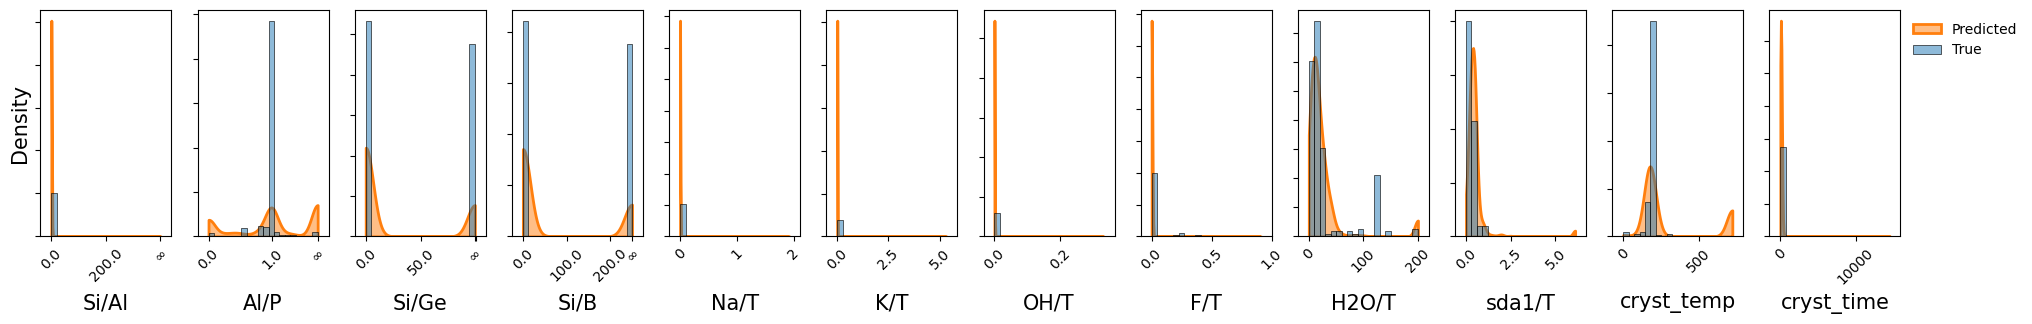

CHA OSDA-free
MMD: 0.4347858428955078
WSD: 0.14246385178808146


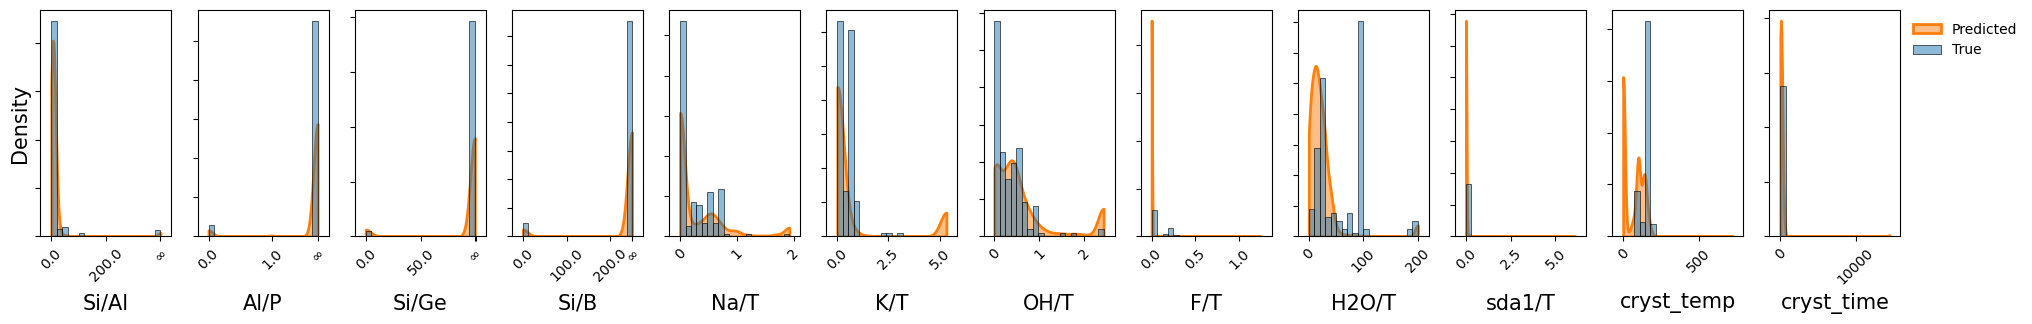

MFI OSDA-free
MMD: 0.1684103012084961
WSD: 0.07244778434109024


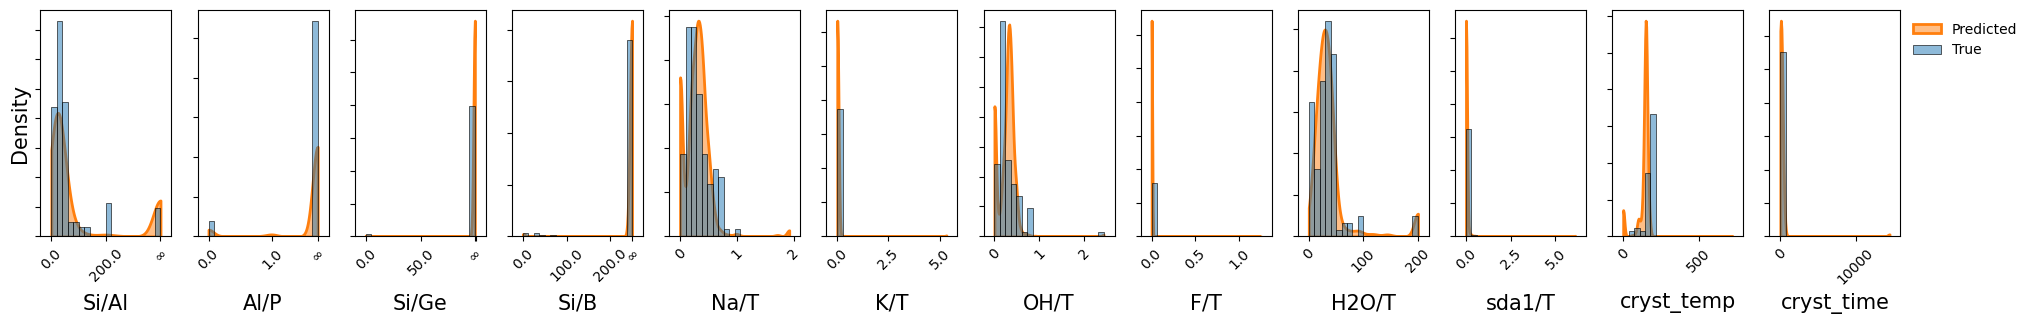

CHA CCN(CC)CC
MMD: 0.4579181671142578
WSD: 0.14377074012143015


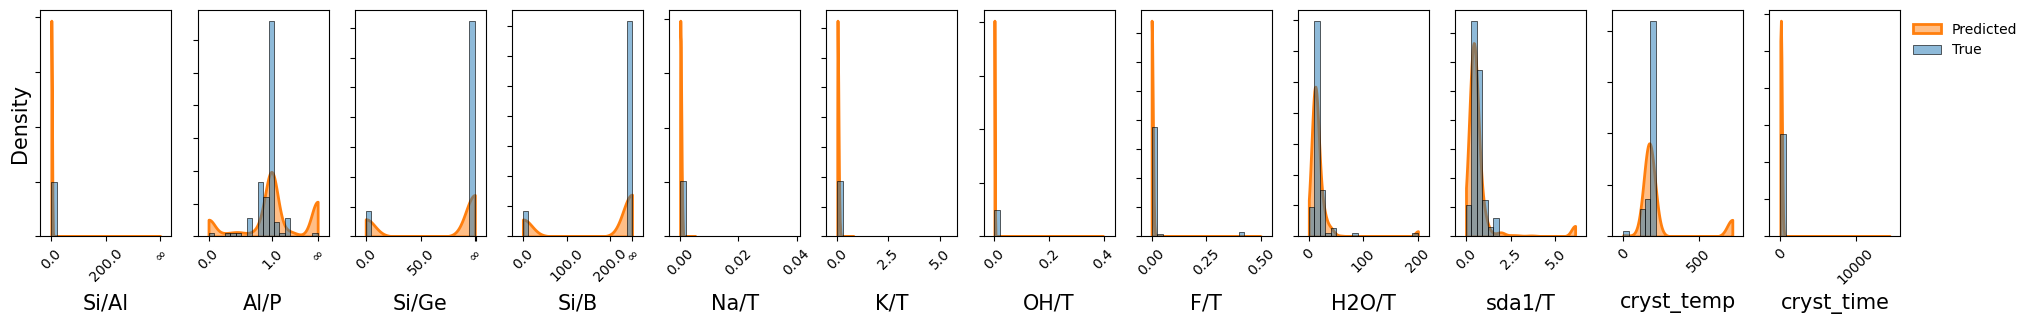

LTA C[N+](C)(C)C
MMD: 0.6272096633911133
WSD: 0.2872943747711133


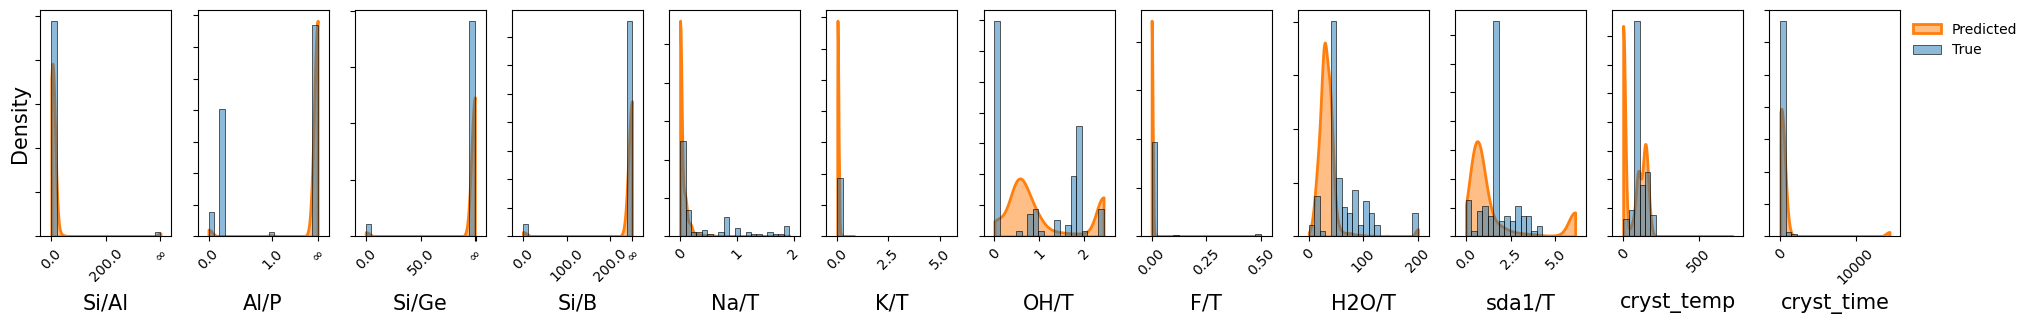

MEL CCCC[N+](CCCC)(CCCC)CCCC
MMD: 0.17240238189697266
WSD: 0.18609904618641127


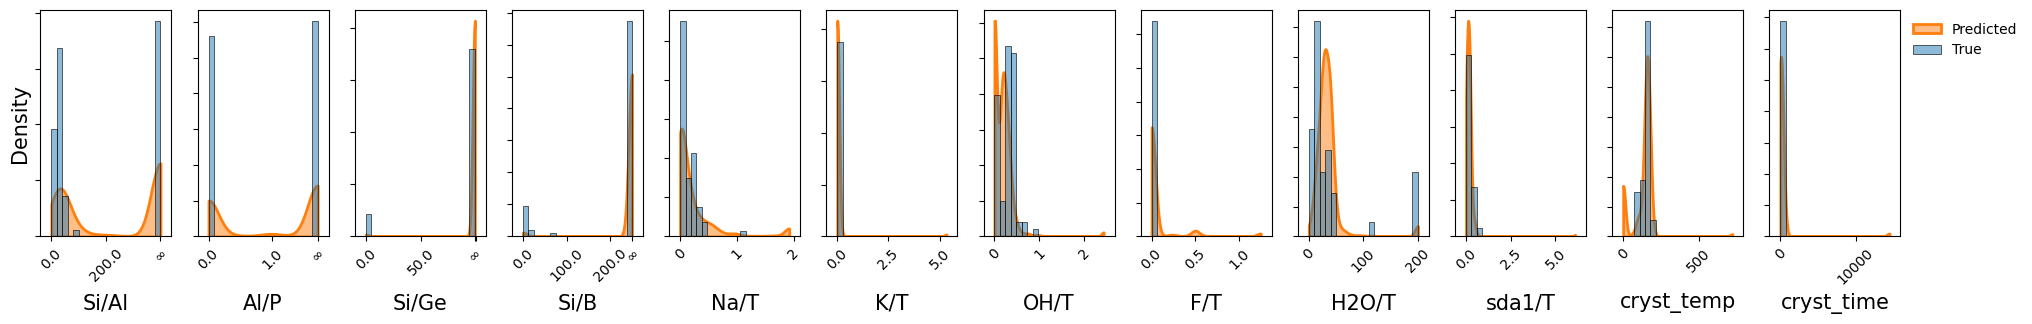

CHA C1COCCN1
MMD: 0.6788091659545898
WSD: 0.3071700900341223


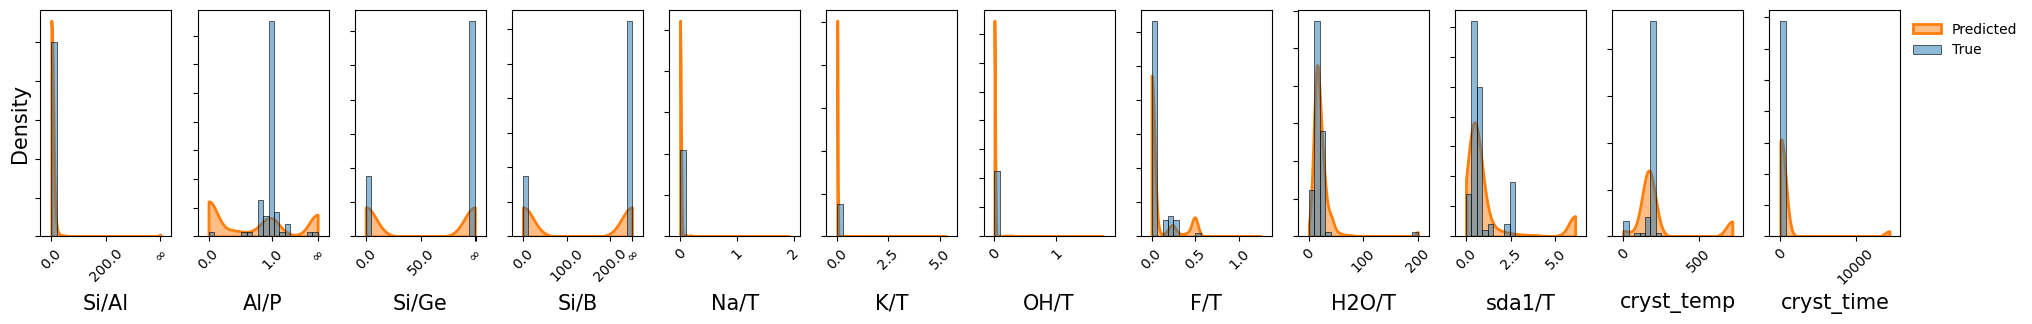

ATO CCCNCCC
MMD: 0.9964990615844727
WSD: 0.13243809794238748


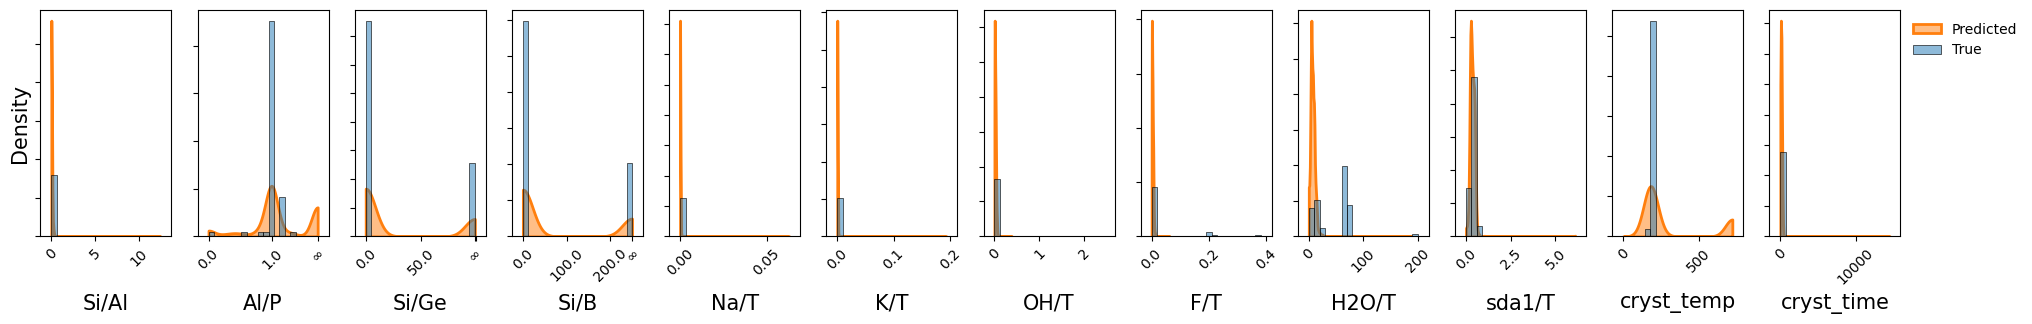

IWR C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.3554396629333496
WSD: 0.6041282295267463


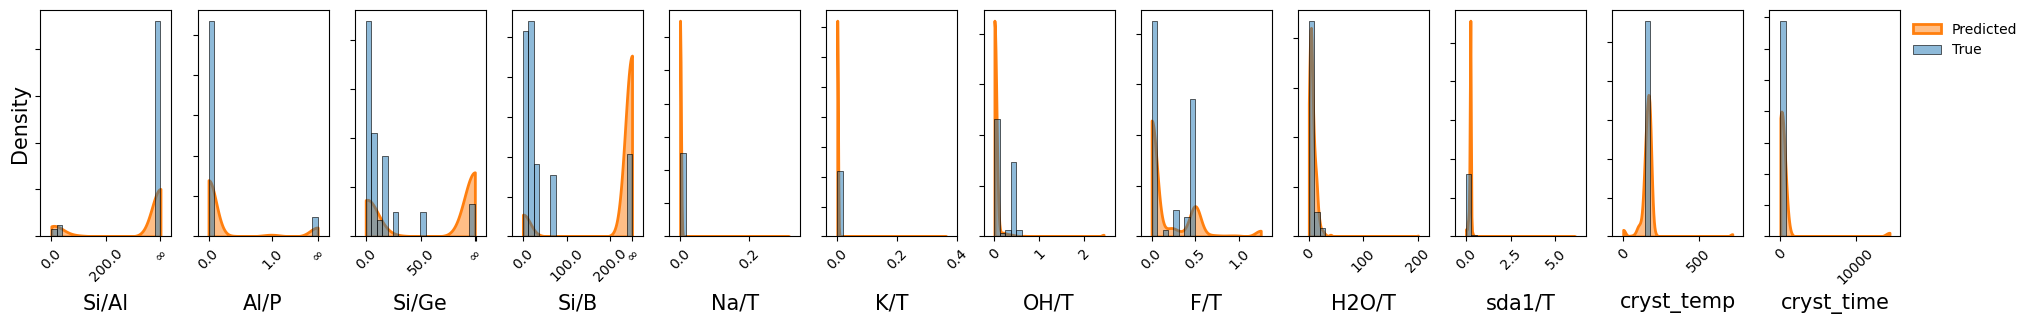

LTA C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2
MMD: 1.3357648849487305
WSD: 0.33163945401158534


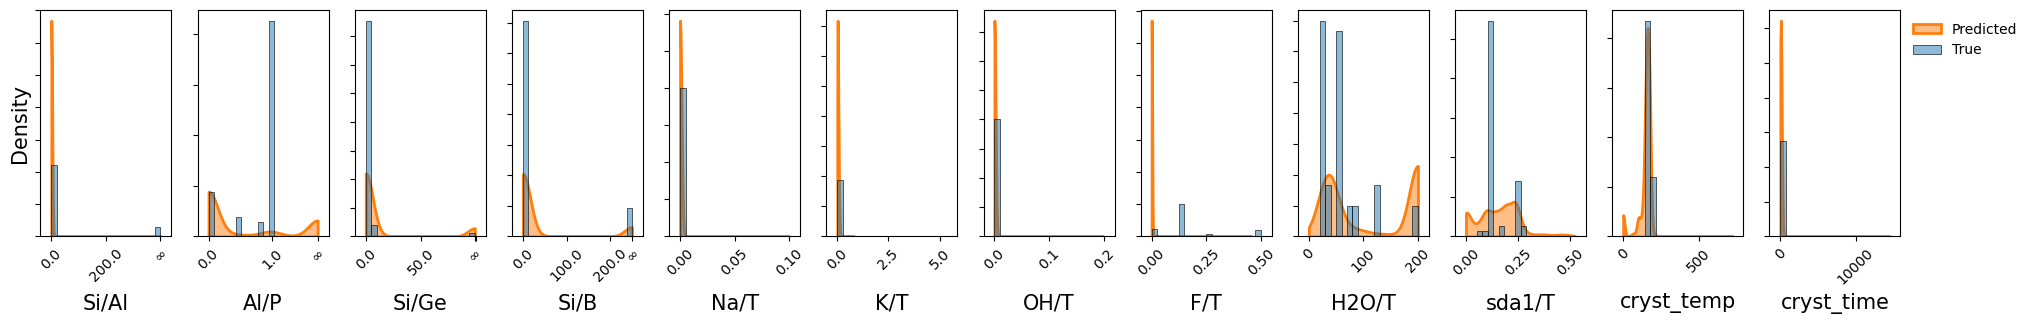

IMF C[N+]1(CCCCC[N+]2(C)CCCC2)CCCC1
MMD: 1.9135351181030273
WSD: 0.41313604925526637


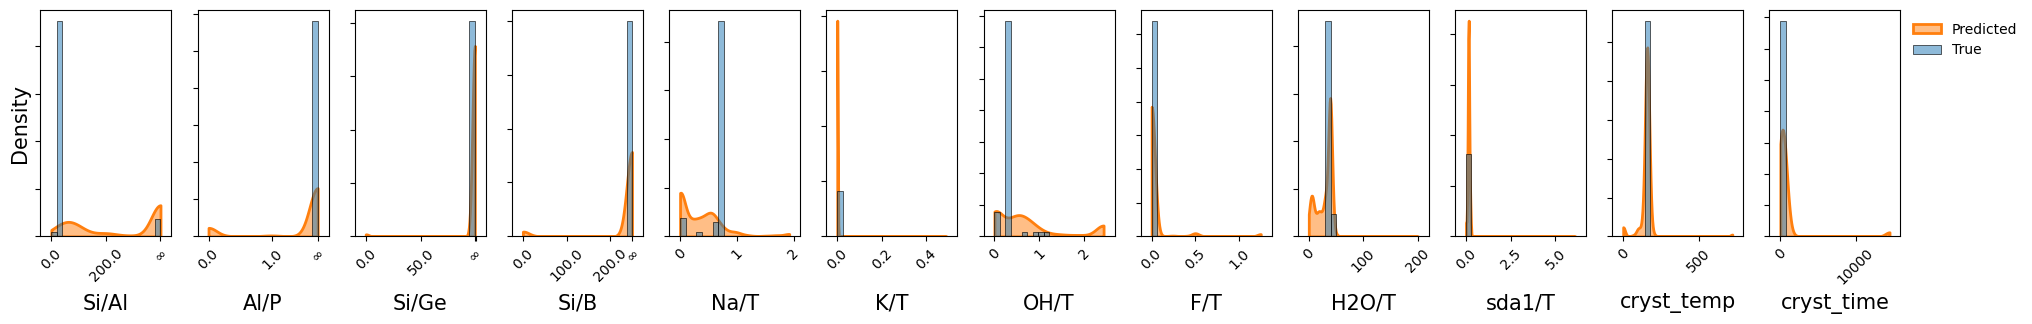

IWR CC[N+]1(CC)CC2C3C(C)=CC(C)(C2C1)C1C[N+](CC)(CC)CC31
MMD: 0.7856578826904297
WSD: 0.43529846206550865


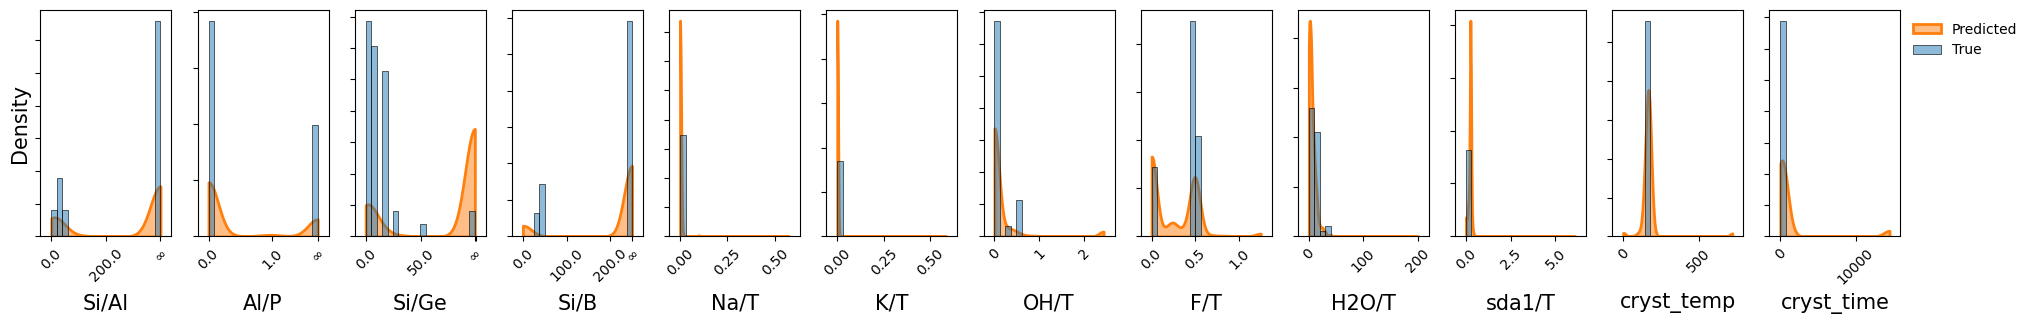

LEV C[N+]12CCC(CC1)CC2
MMD: 0.7394437789916992
WSD: 0.21492956625729304


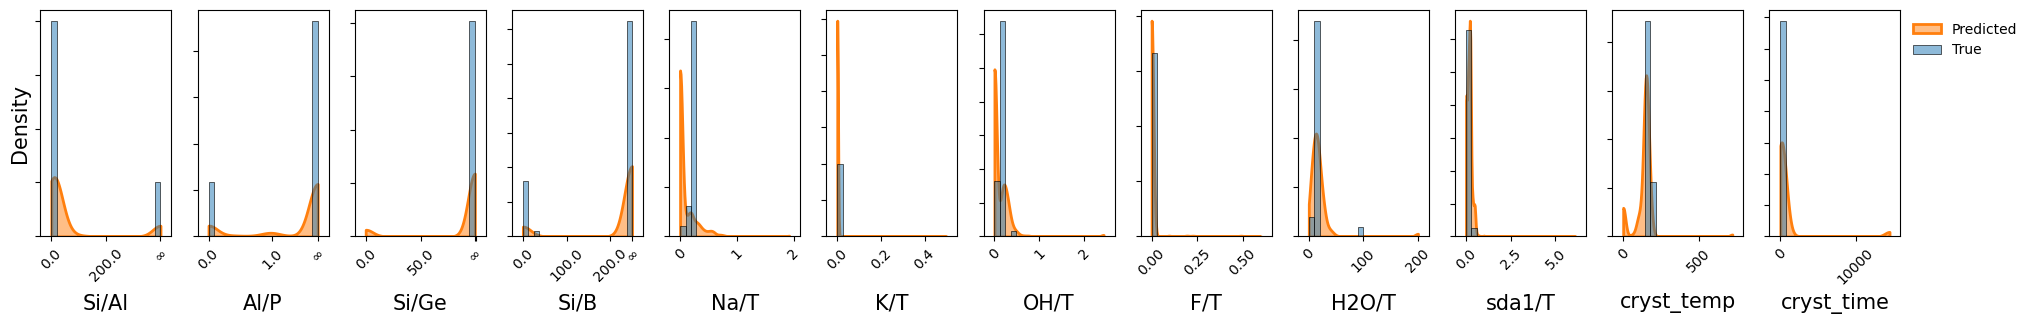

AFI CCCN(CCC)CCC
MMD: 0.1980581283569336
WSD: 0.10730762067313443


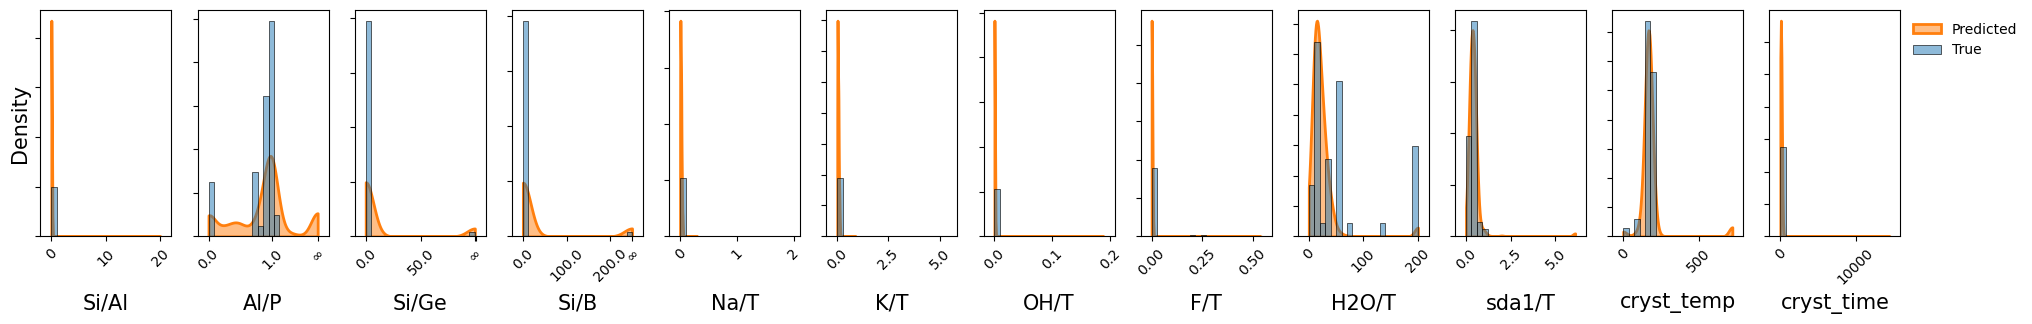

BEC C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 0.5274734497070312
WSD: 0.29502137343681967


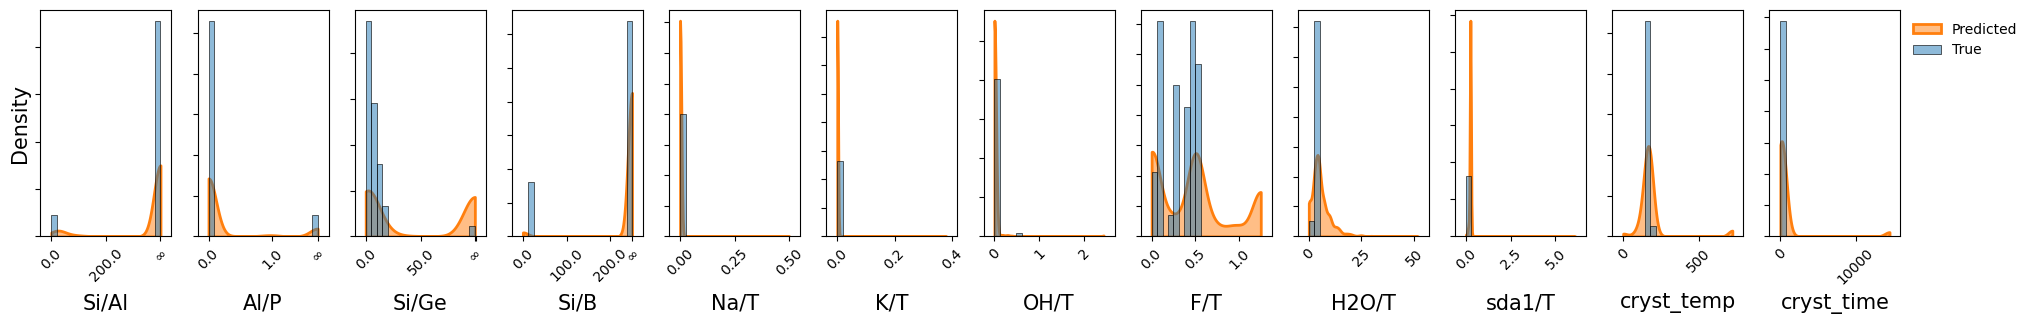

MAZ OSDA-free
MMD: 0.42368221282958984
WSD: 0.07616996968836365


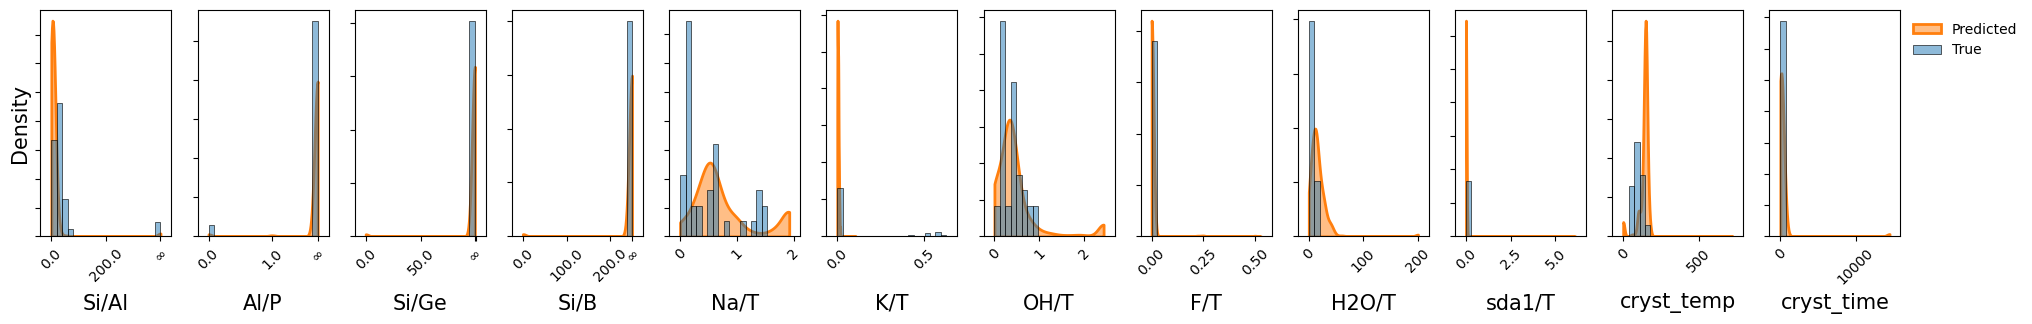

MWW C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 1.4198904037475586
WSD: 0.37504461629683167


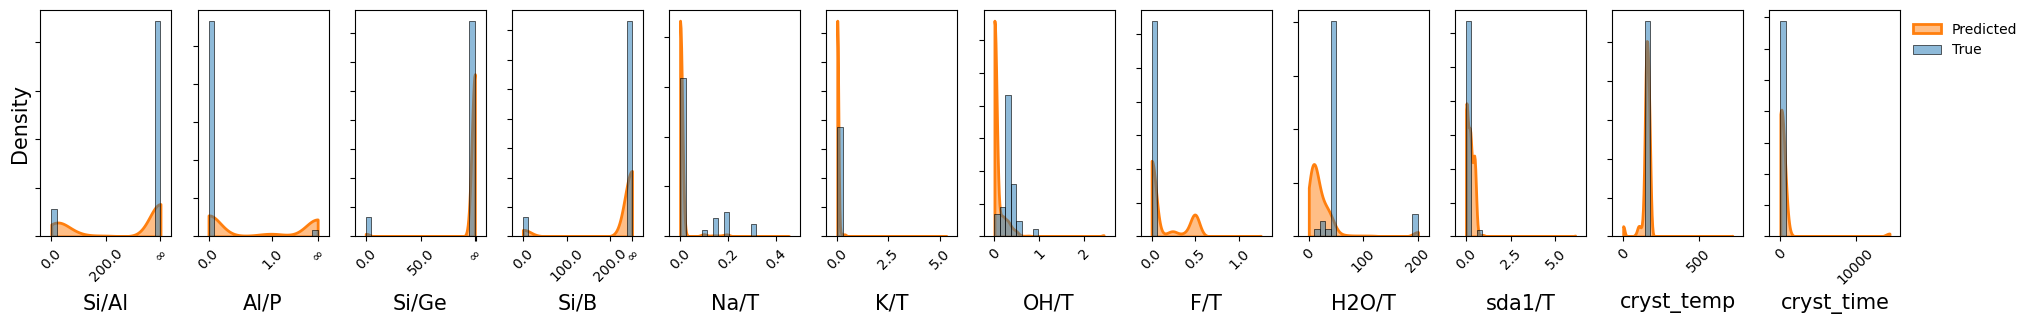

AEN CC[n+]1ccn(C)c1C
MMD: 1.245406150817871
WSD: 0.5084893971148422


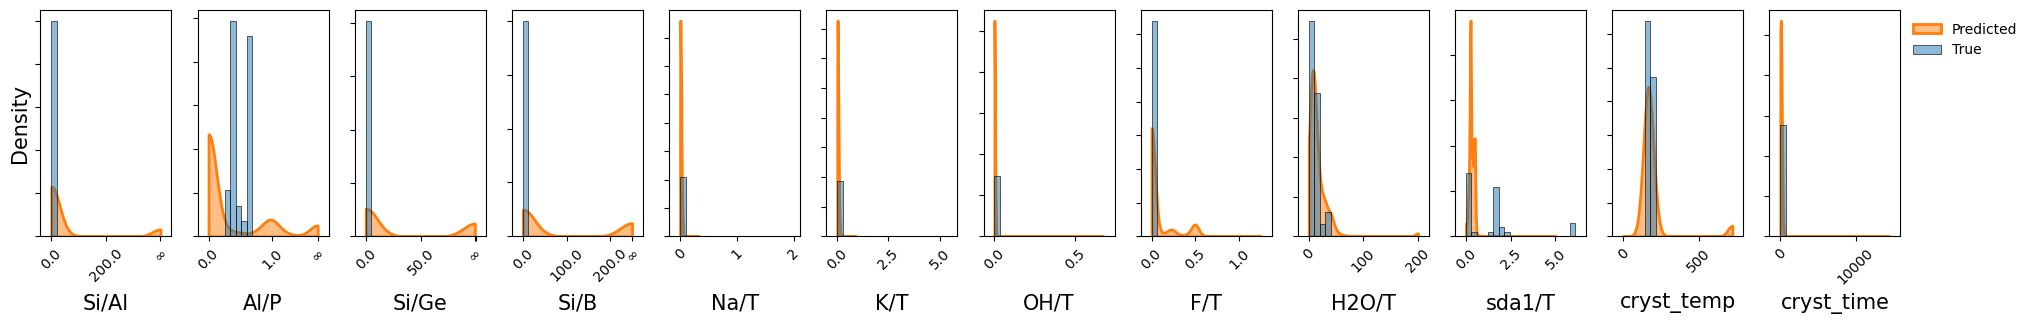

FAU C1COCCOCCOCCOCCOCCO1
MMD: 0.34006214141845703
WSD: 0.16424431630057346


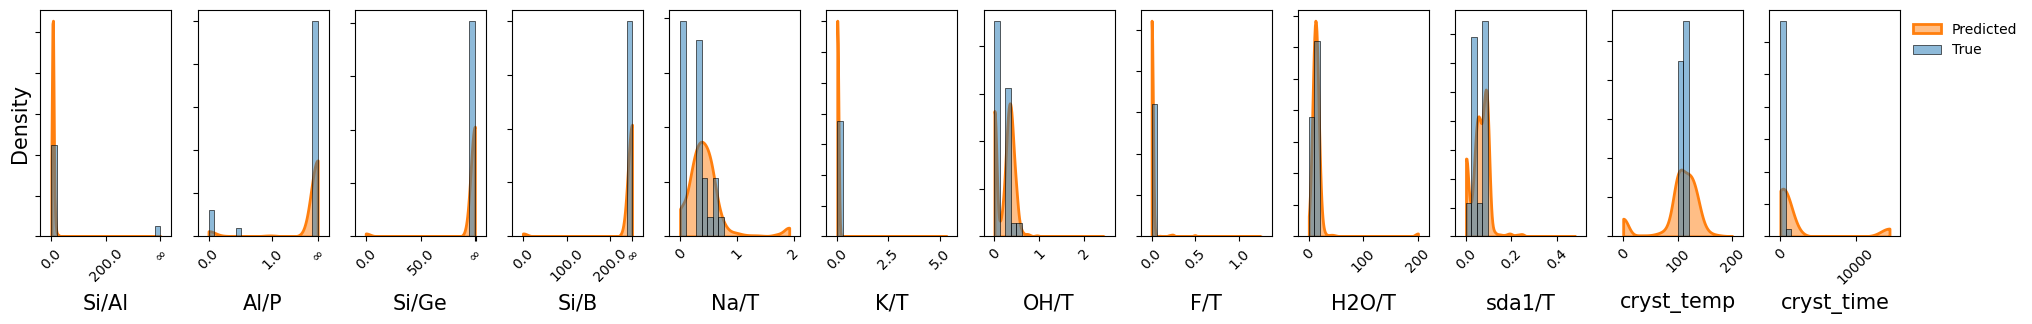

FAU CC[N+](CC)(CC)CC
MMD: 1.1658849716186523
WSD: 0.2901164937810717


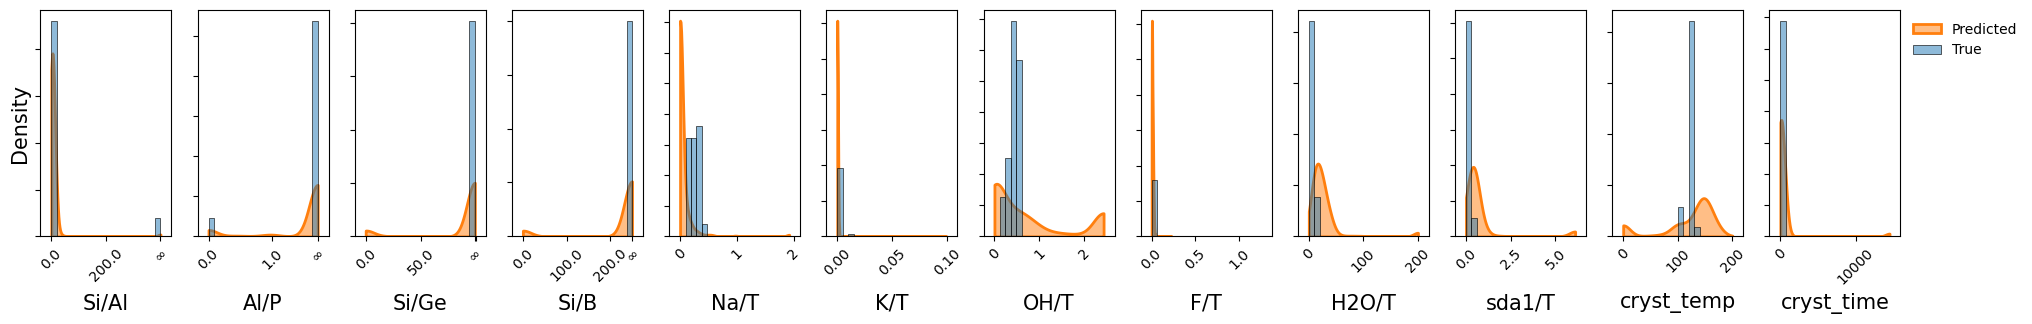

UOV C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C
MMD: 2.932313919067383
WSD: 1.1558021211885428


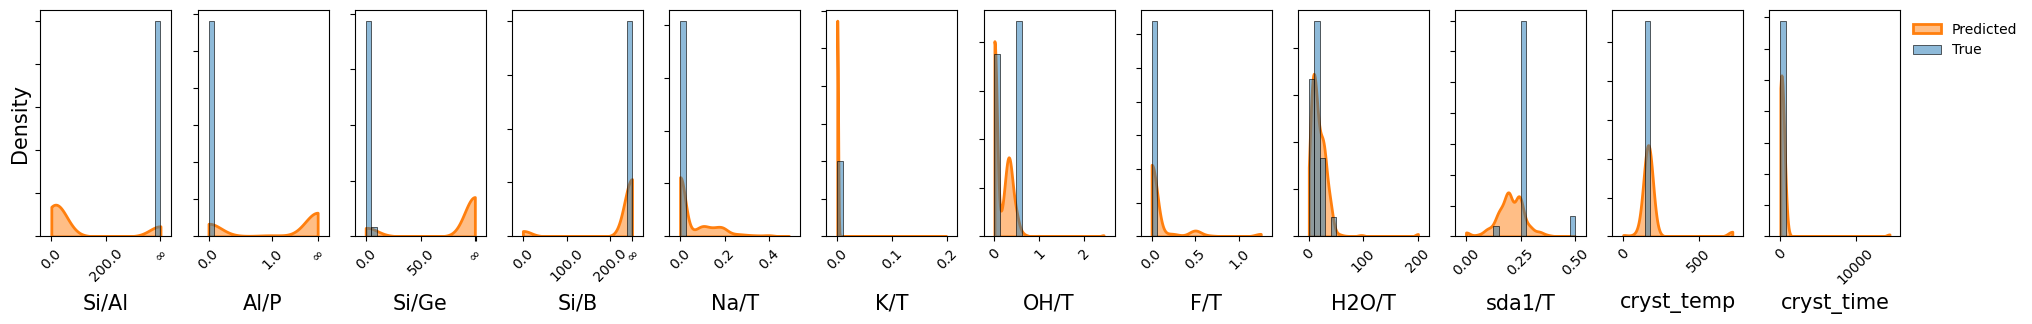

PHI OSDA-free
MMD: 0.5583620071411133
WSD: 0.16111052477884563


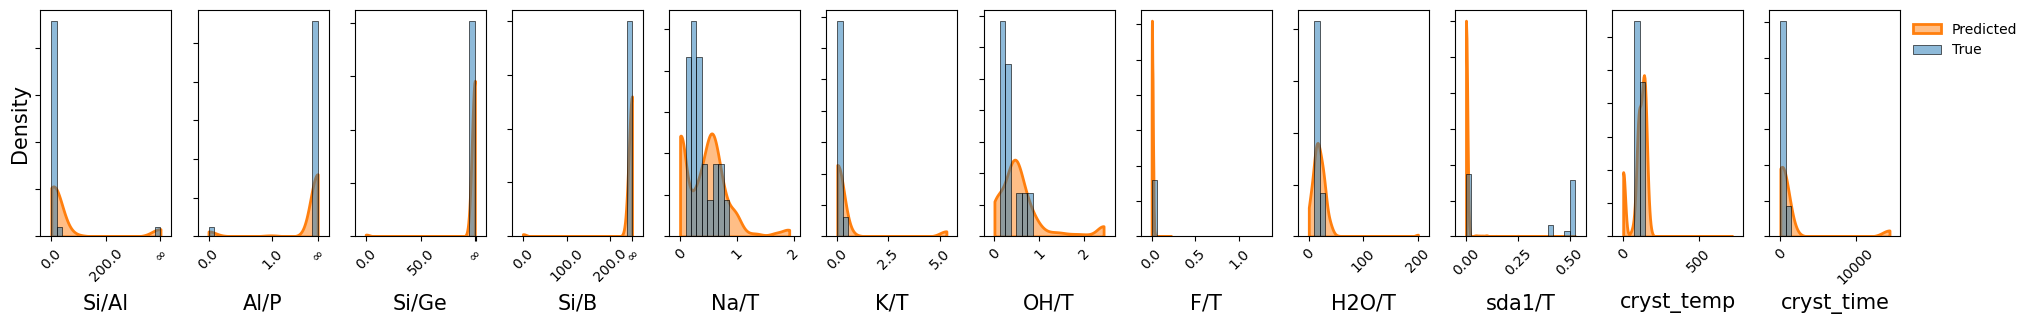

GIS CCCNCCC
MMD: 2.903229236602783
WSD: 1.139964462121418


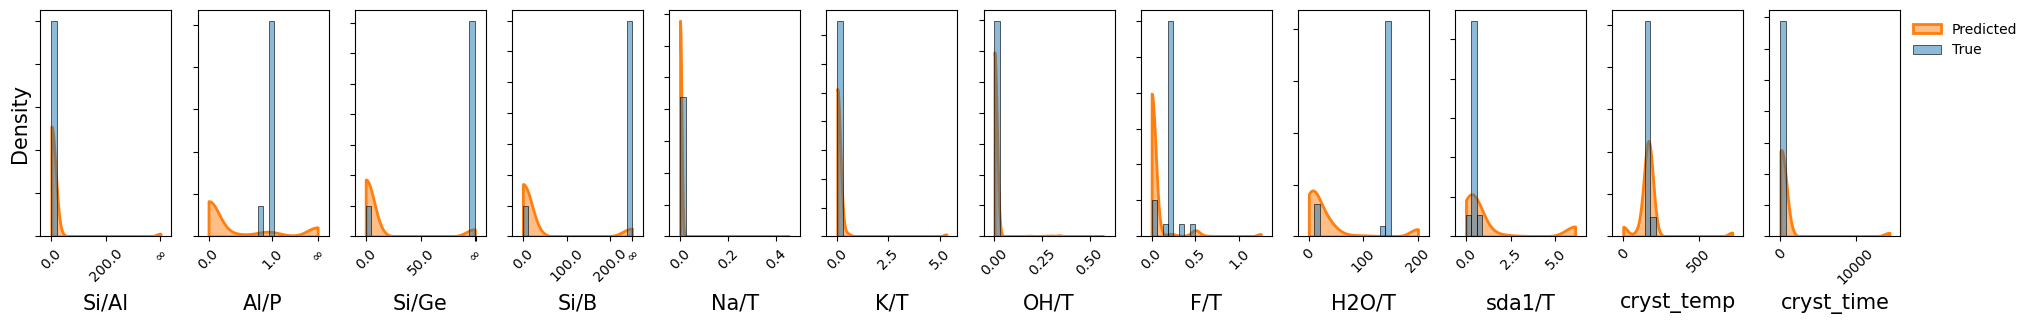

LEV C[N+]1(C)CCCCC1
MMD: 0.5461759567260742
WSD: 0.225564604141411


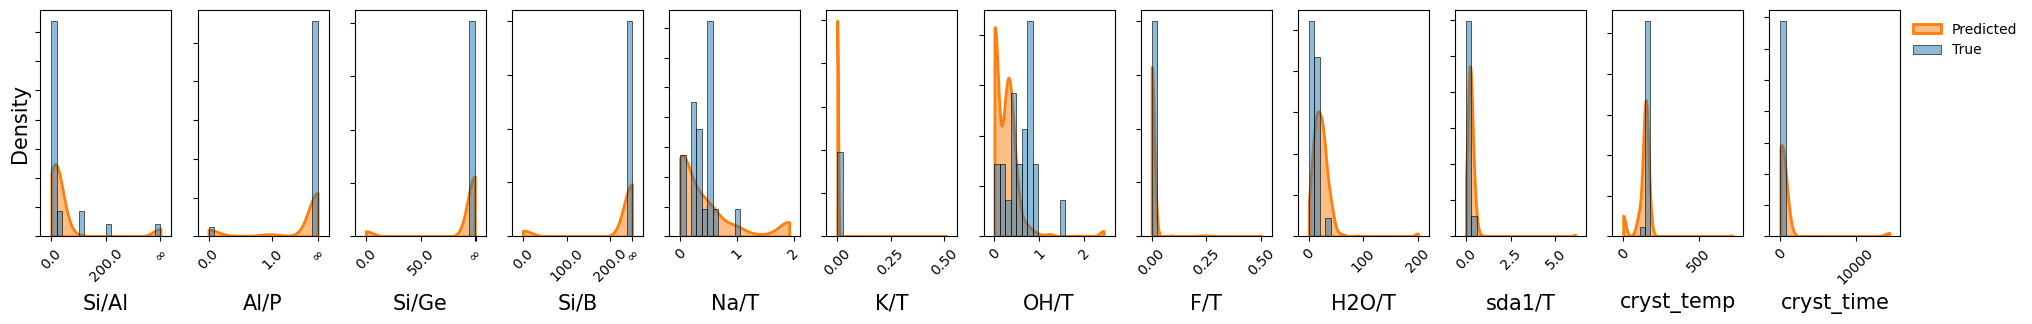

ITT C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.8950161933898926
WSD: 0.7782045155615914


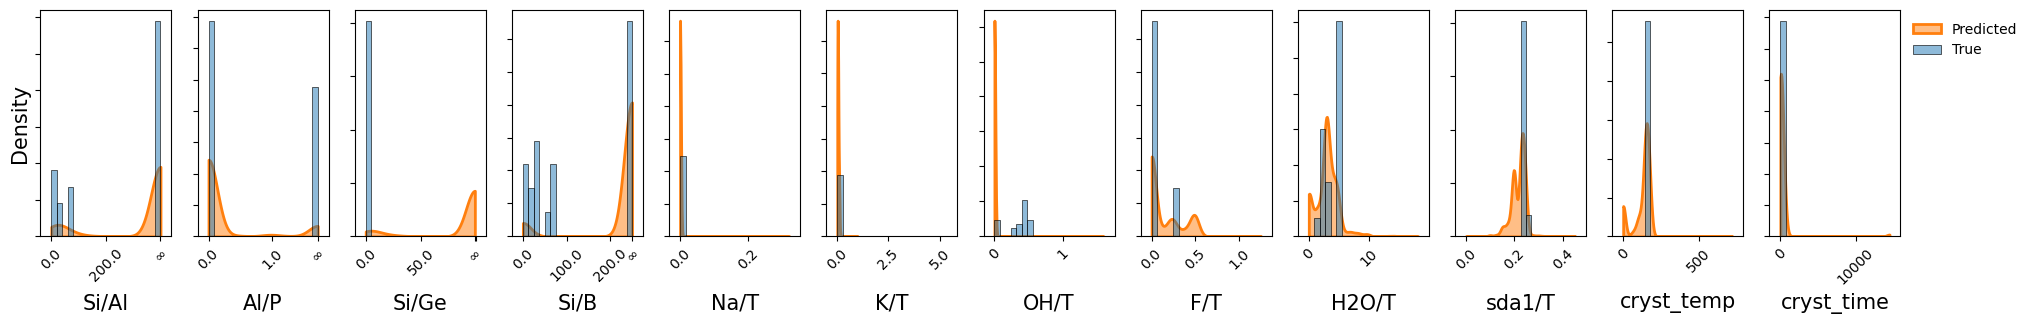

FER C[N+]1(Cc2ccccc2)CCCC1
MMD: 1.8148174285888672
WSD: 0.4501565566950362


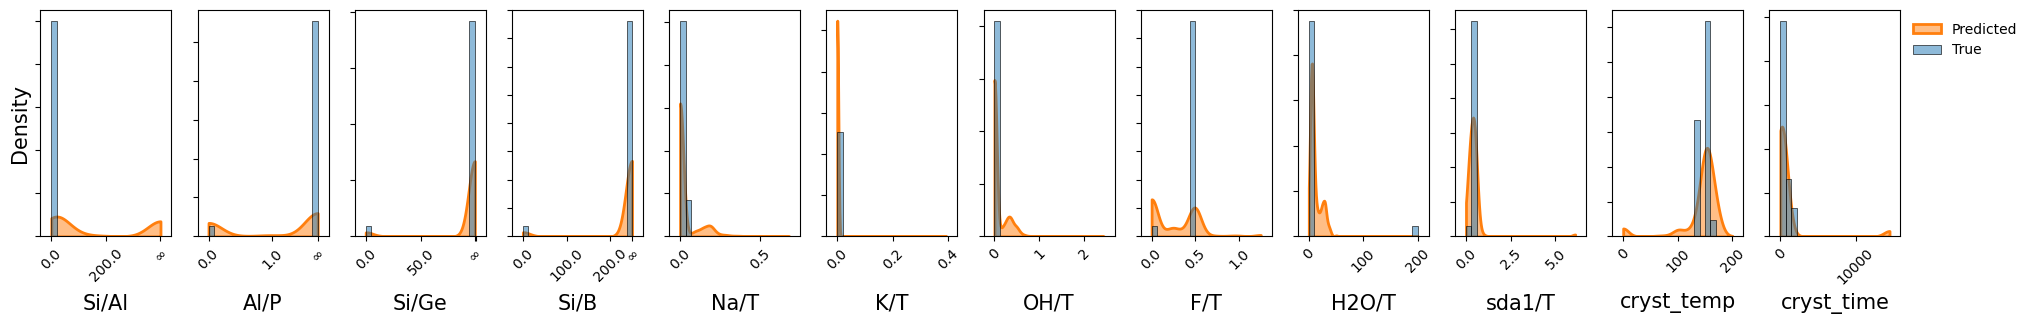

ITG C[N+]1(C)CCC([N+]2(C)CCCC2)CC1
MMD: 1.4671216011047363
WSD: 0.6637226842106506


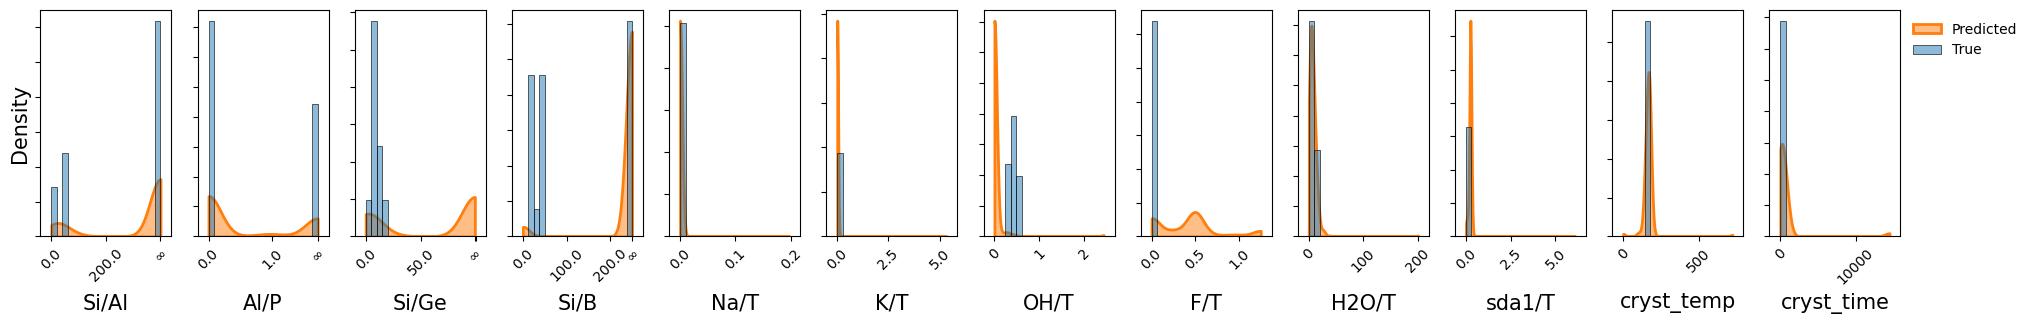

BEA C(CCCC[N+]12CCC(CC1)CC2)CCC[N+]12CCC(CC1)CC2
MMD: 1.4335651397705078
WSD: 0.33188064100573694


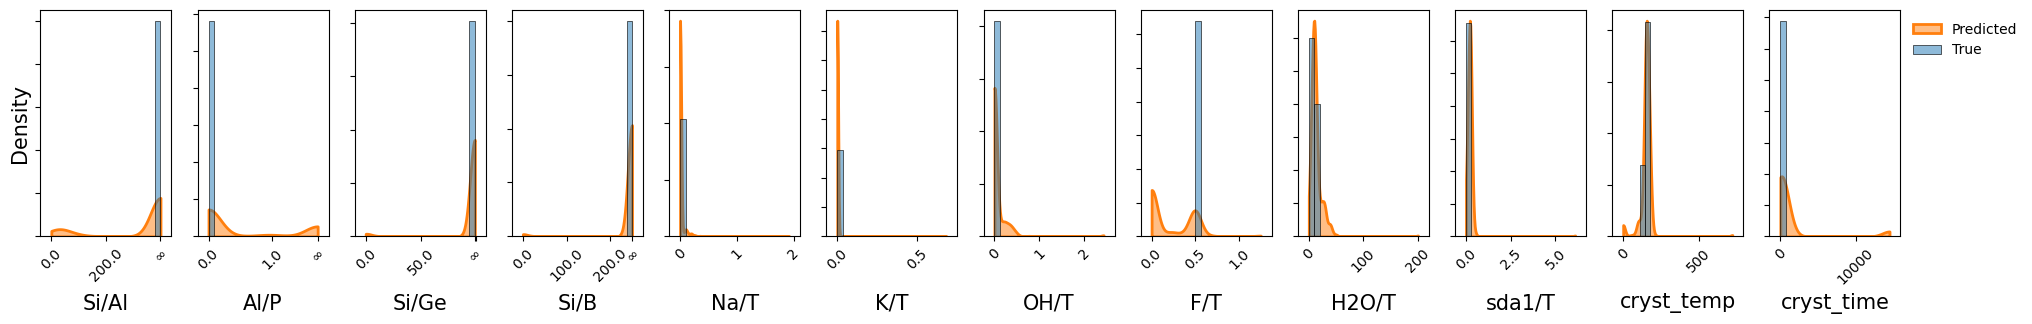

SAV C1CNCCCNCCNCCNC1
MMD: 2.183626174926758
WSD: 1.0100014000294597


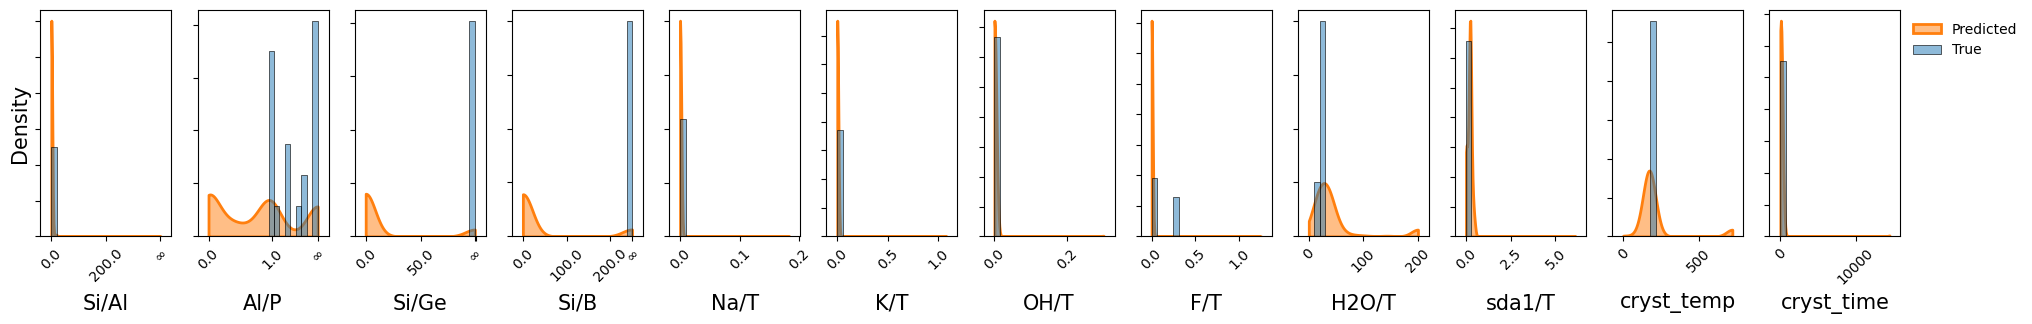

AEI CC[P+](CC)(CC)CC
MMD: 1.6195554733276367
WSD: 0.4130910070381104


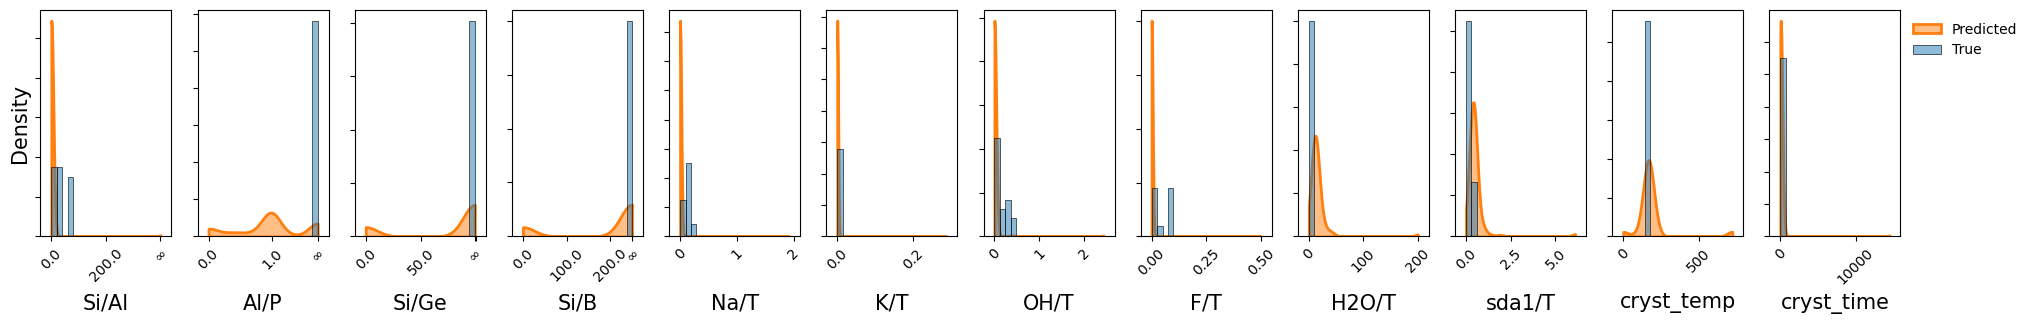

AFI C[N+]12CCCC[C@@H]1[C@H]1C[C@@H](C2)[C@@H]2CCCCN2C1
MMD: 0.4230642318725586
WSD: 0.44111863244623517


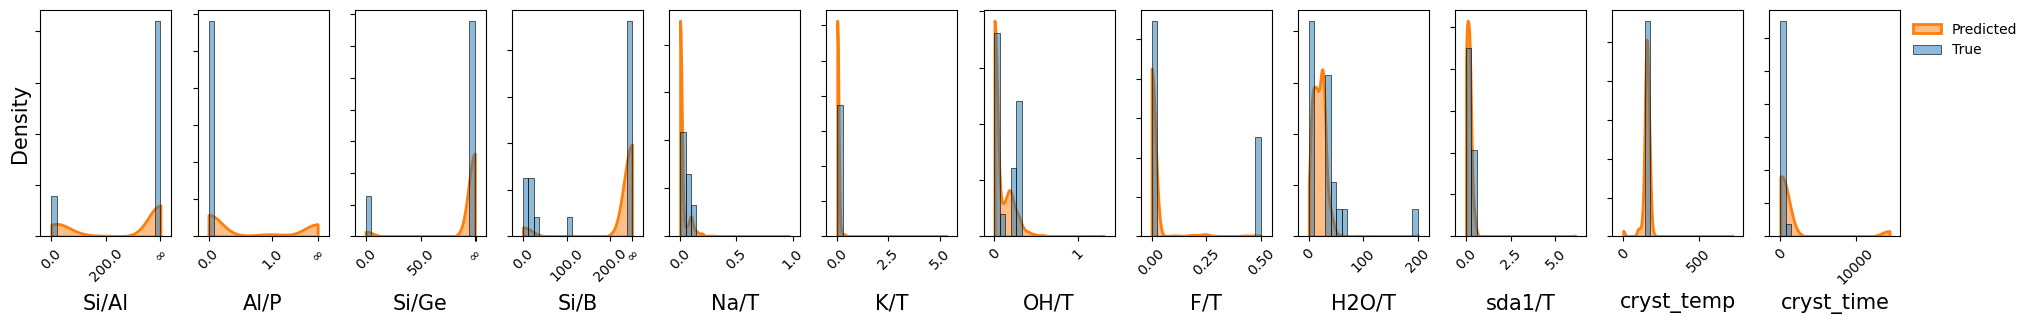

NSI c1cc(-c2ccncc2)ccn1
MMD: 1.924267292022705
WSD: 1.1000091911942858


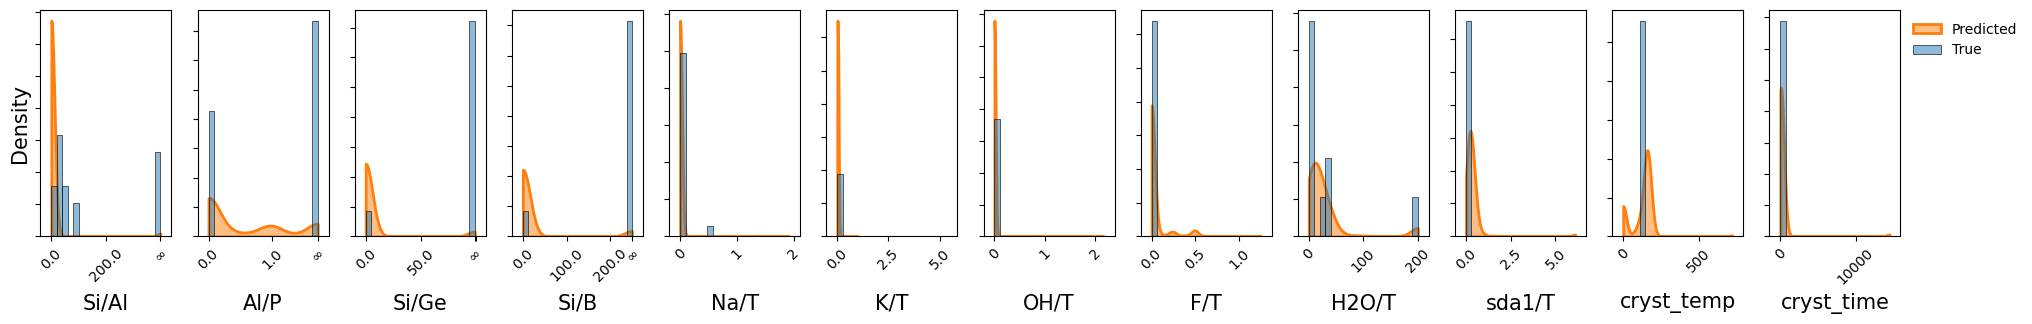

CON CC1(C)[C@H]2CC[C@@H](C[N+](C)(C)C)[C@@H]1C2
MMD: 0.9647994041442871
WSD: 0.5699784790286284


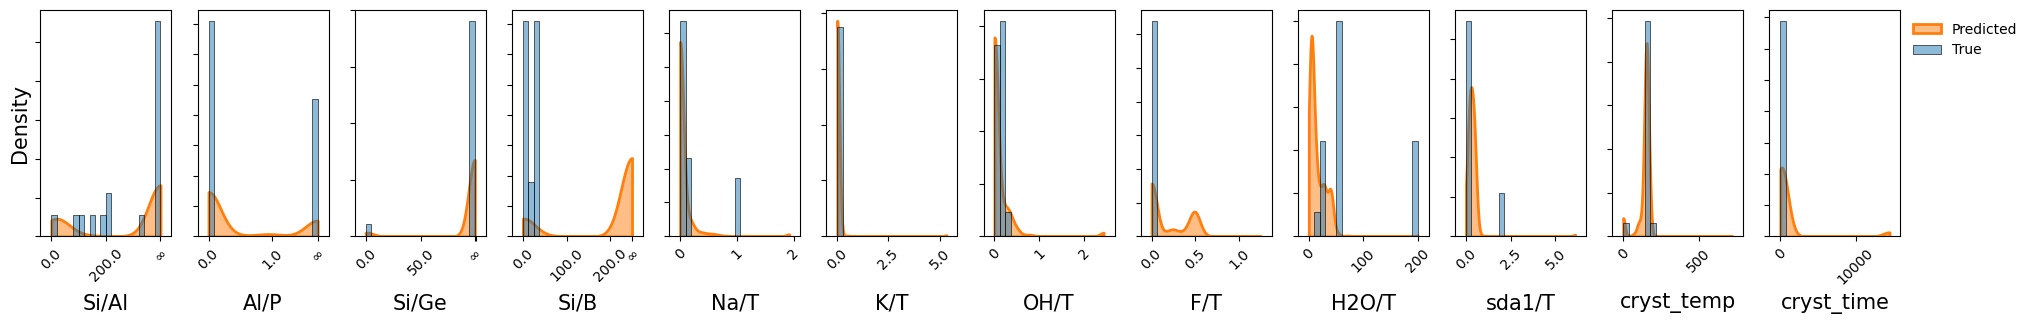

FER C1CNCCN1
MMD: 0.5259122848510742
WSD: 0.23576332161130256


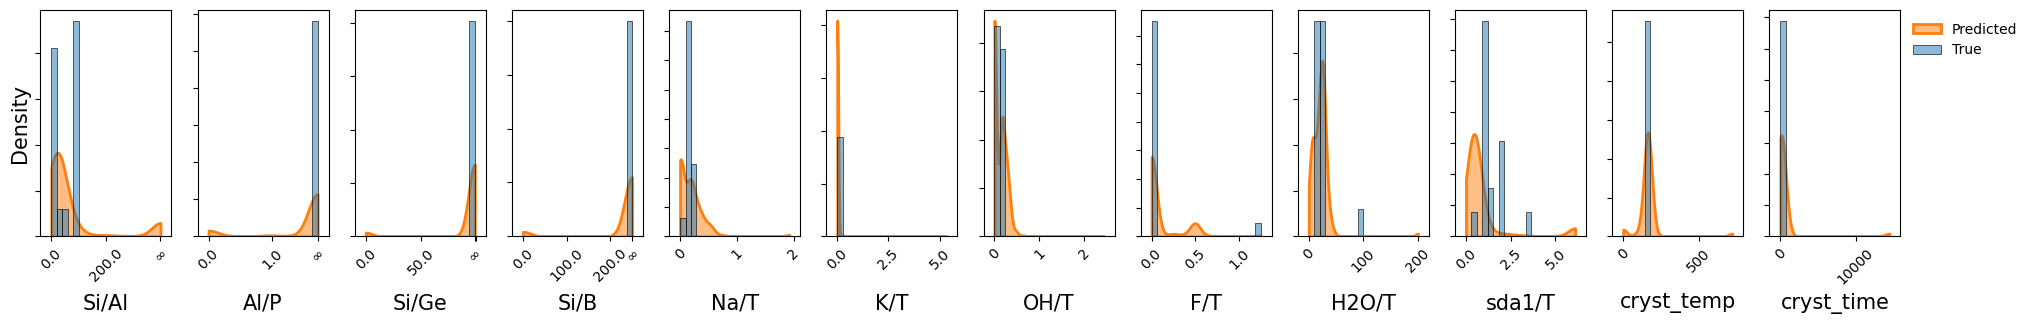

MTW C[N+]1(Cc2ccccc2)CCC(CCCCCC2CC[N+](C)(Cc3ccccc3)CC2)CC1
MMD: 0.8529863357543945
WSD: 0.13338940611224093


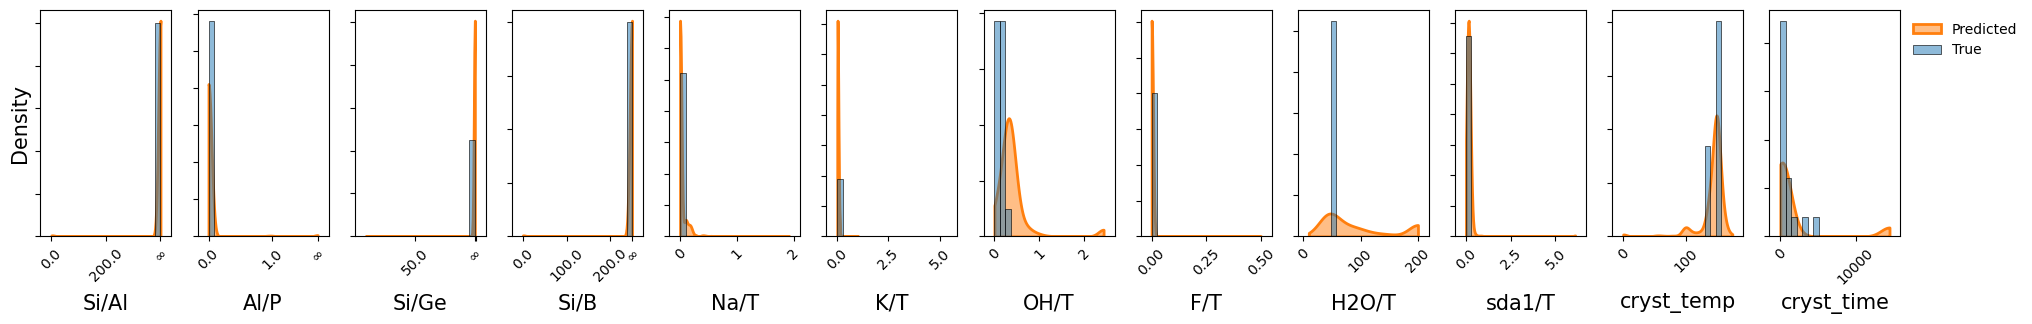

BEA C(CC[N+]12CCN(CC1)CC2)C[N+]12CCN(CC1)CC2
MMD: 0.5003957748413086
WSD: 0.20597164631640874


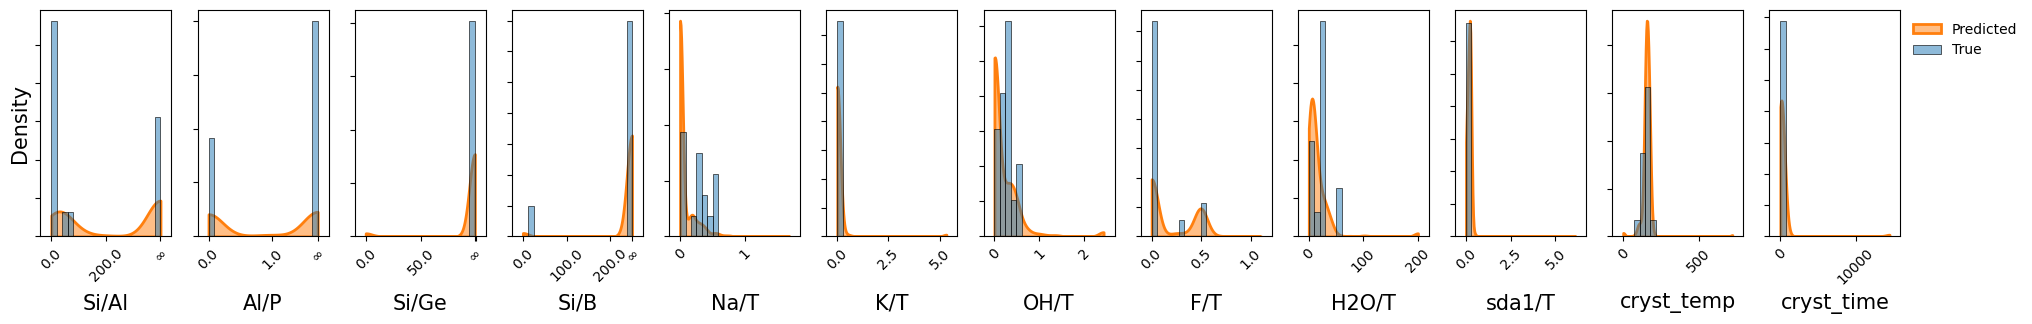

MWW CCCCCCC[N+](C)(C)C
MMD: 3.3669776916503906
WSD: 1.0245265936703216


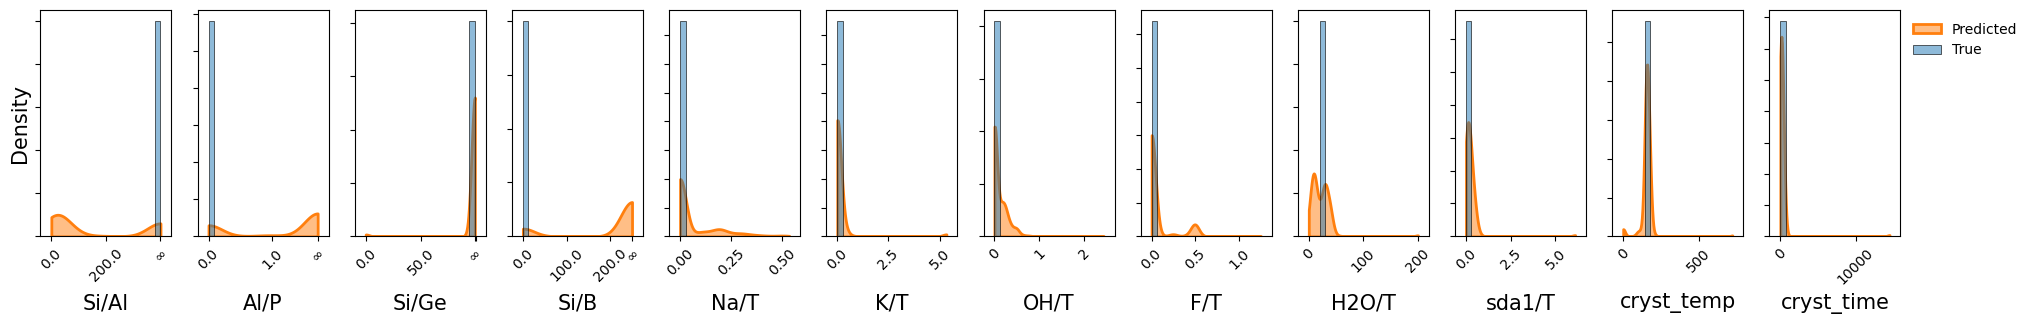

MFI CCN
MMD: 0.4644441604614258
WSD: 0.20263729150412307


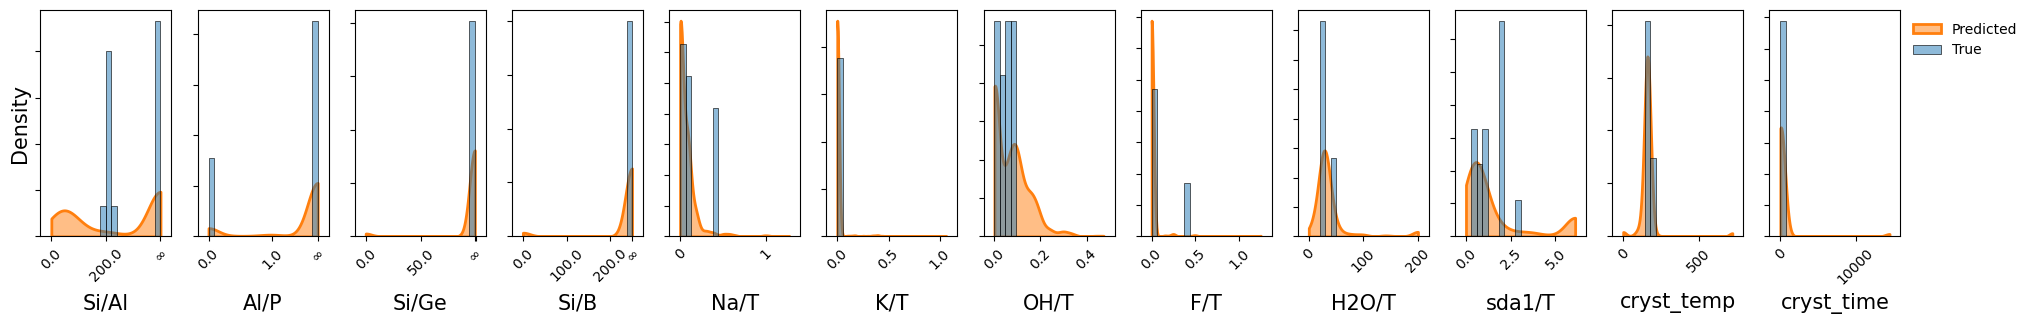

TON NCCCCCCCCN
MMD: 0.5039176940917969
WSD: 0.3064199725688491


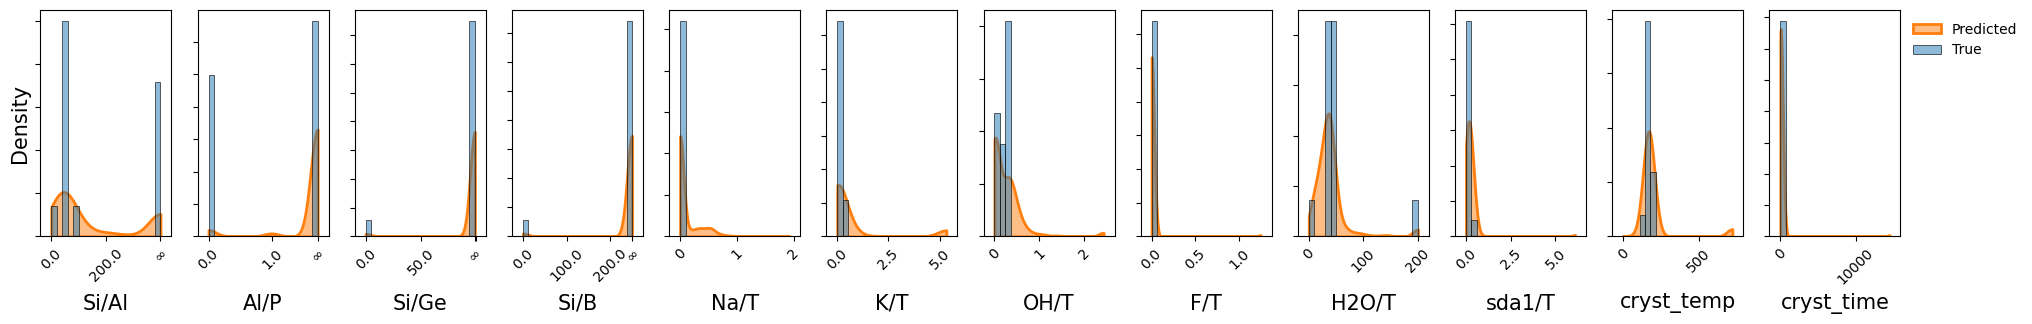

AFR CCC[N+](CCC)(CCC)CCC
MMD: 0.9094085693359375
WSD: 0.16067141994874412


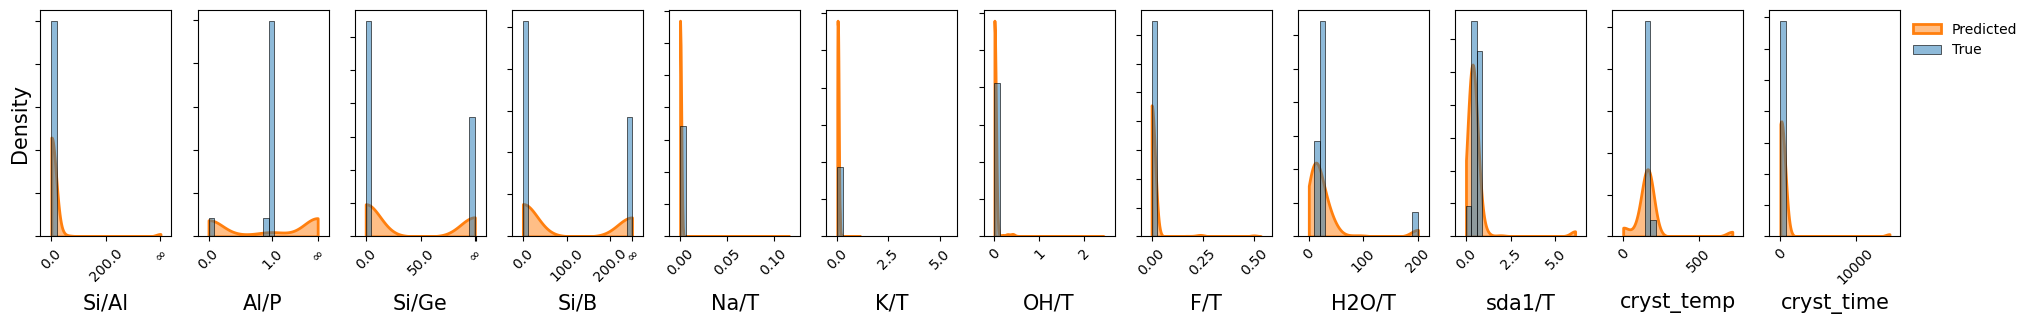

AST c1ccncc1
MMD: 1.9782848358154297
WSD: 0.6990866237433785


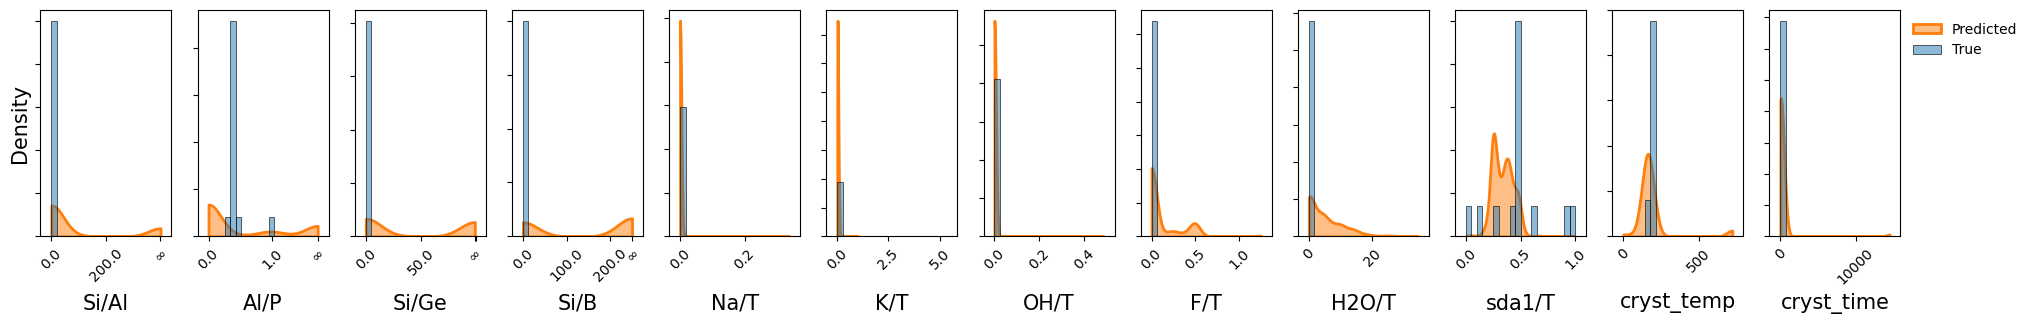

AEI C[C@H]1C[C@@H](C)C[N+](C)(C)C1
MMD: 1.196854591369629
WSD: 0.18529489821099626


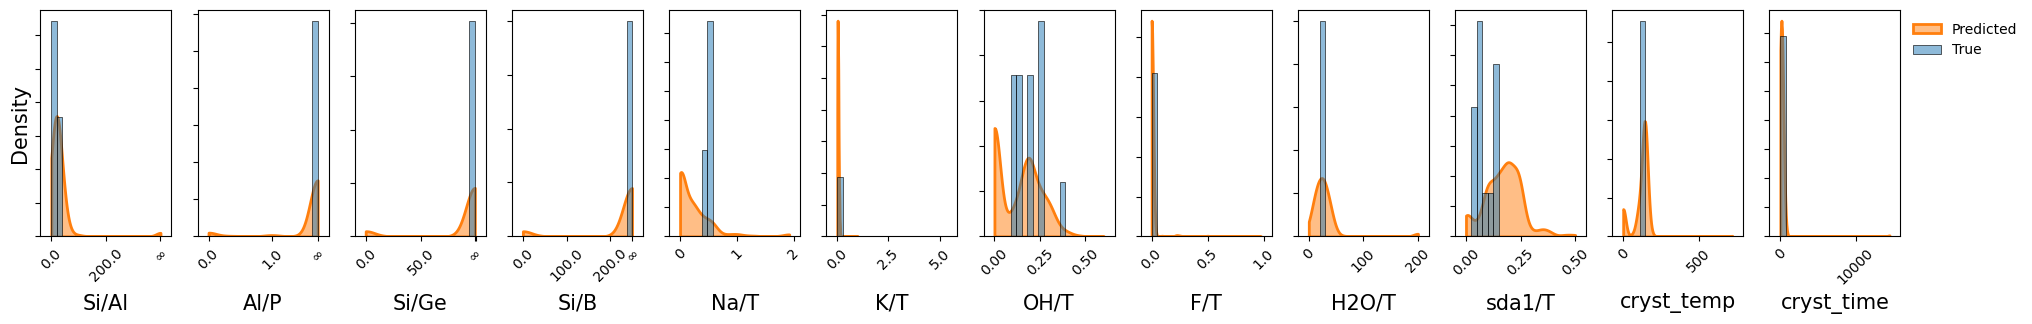

MTT C[N+](C)(C)CCCCCCC[N+](C)(C)C
MMD: 0.3422832489013672
WSD: 0.44995659823775275


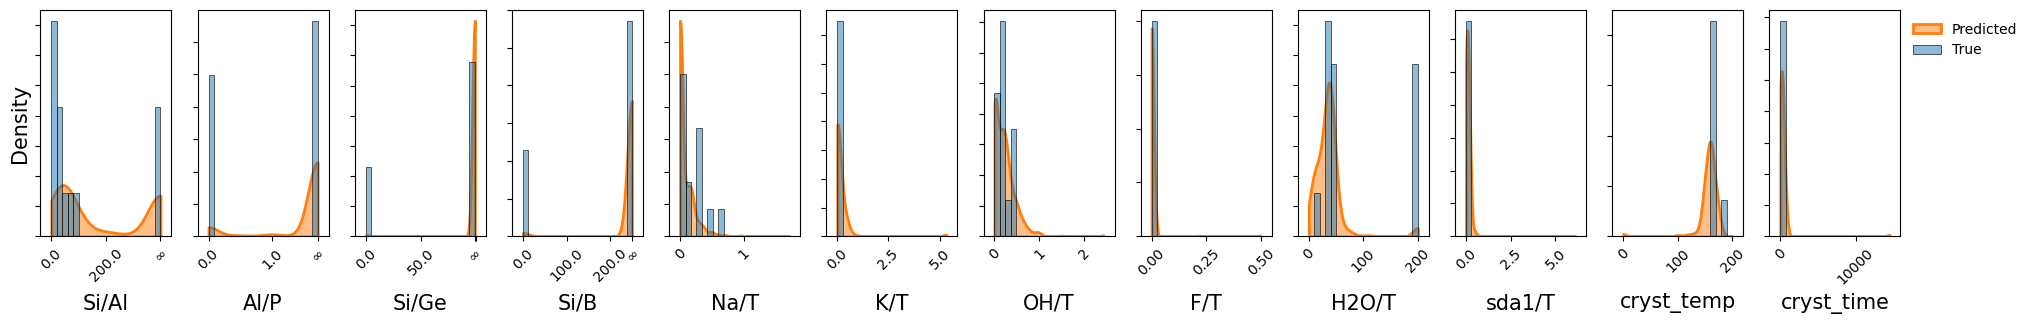

LTA Cc1ccc(C[n+]2ccn(C)c2C)cc1
MMD: 0.5840206146240234
WSD: 0.2736050871243072


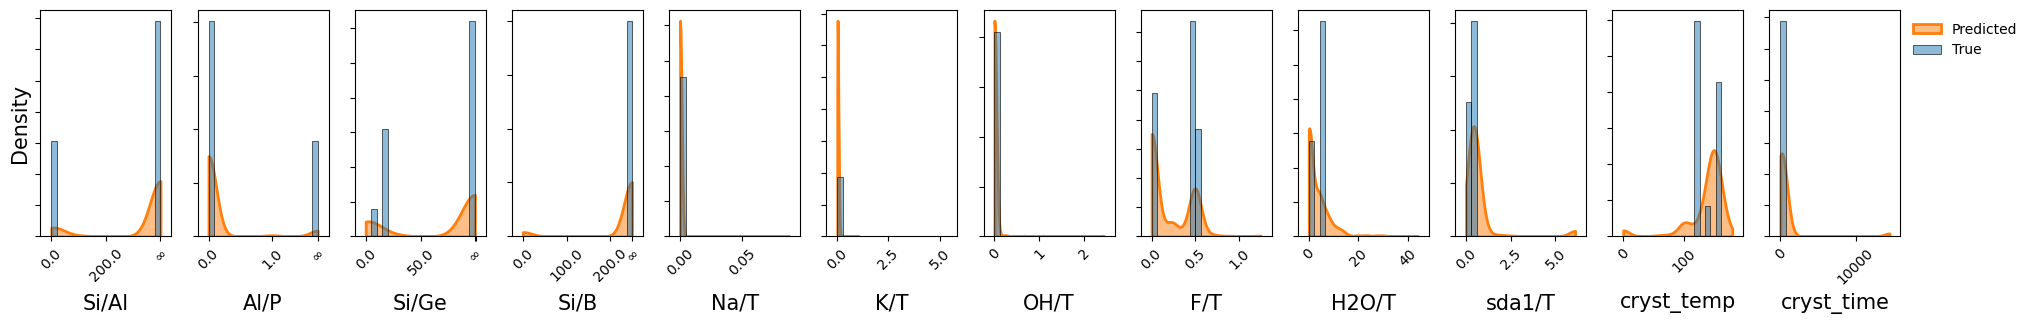

SWY C1CCCC(CCCCCCC2(N3CCCCCCN3)CCCCCCC2)(N2CCCCCCN2)CCC1
MMD: 2.228057861328125
WSD: 0.2406759377769573


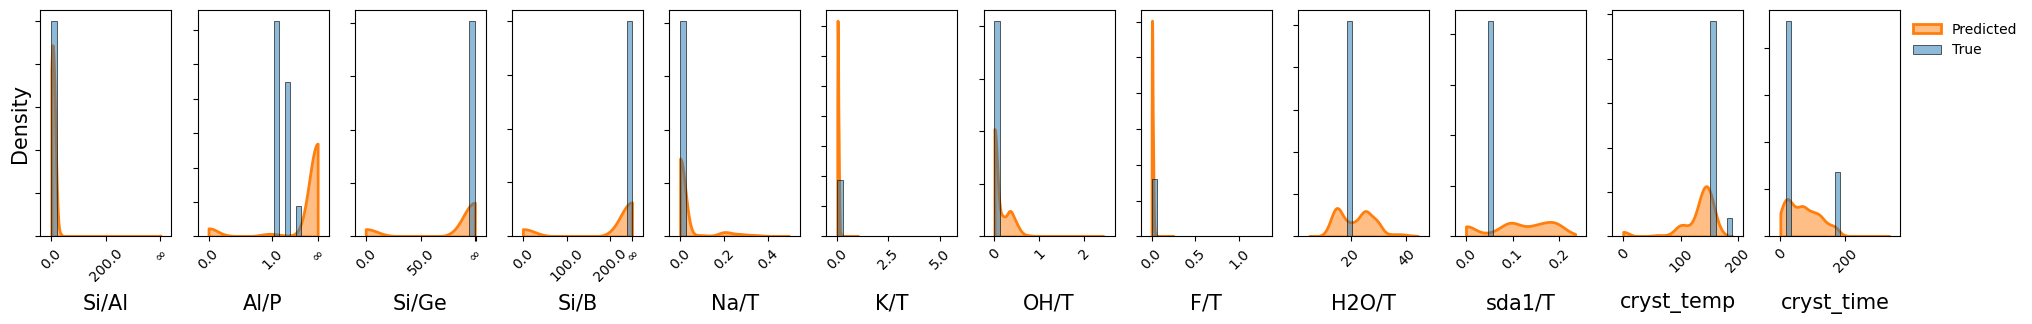

STF CCC1CCCC[N+]12CCCCC2
MMD: 1.8824877738952637
WSD: 0.6343183988085543


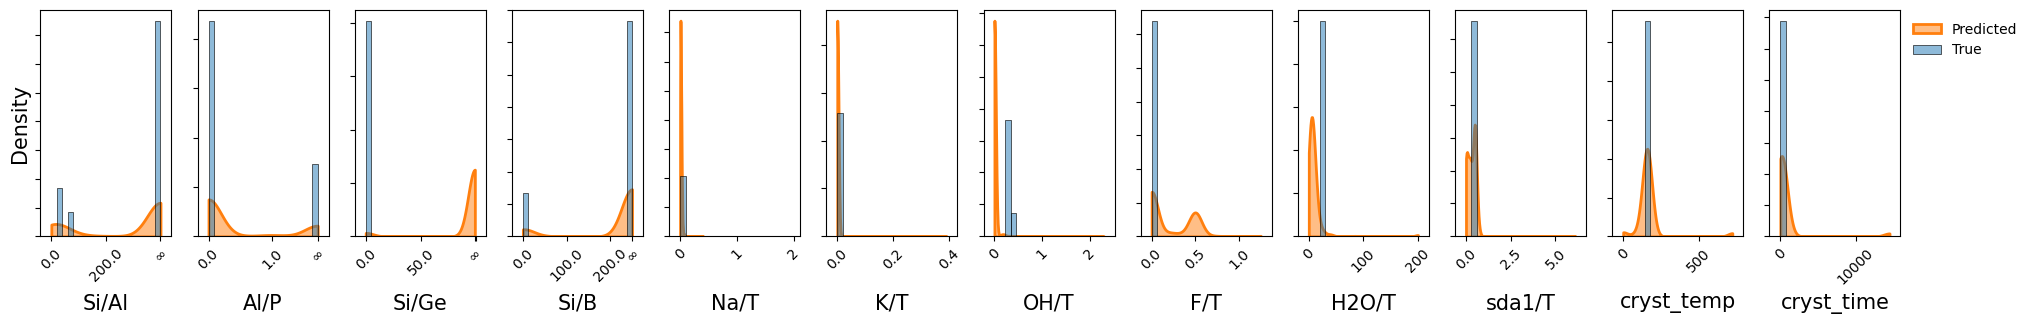

BEA CC[N+]1(CC)CC2C3C=CC(C2C1)C1C[N+](CC)(CC)CC31
MMD: 0.04555320739746094
WSD: 0.13460878277979652


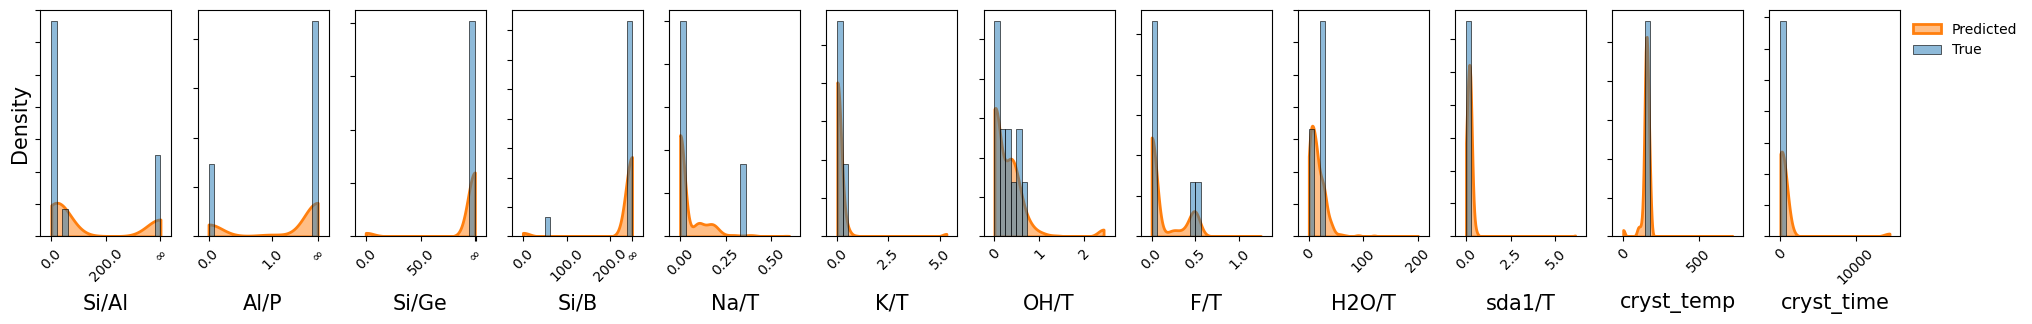

CHA CC(C)NC(C)C
MMD: 1.6880803108215332
WSD: 0.744640358406462


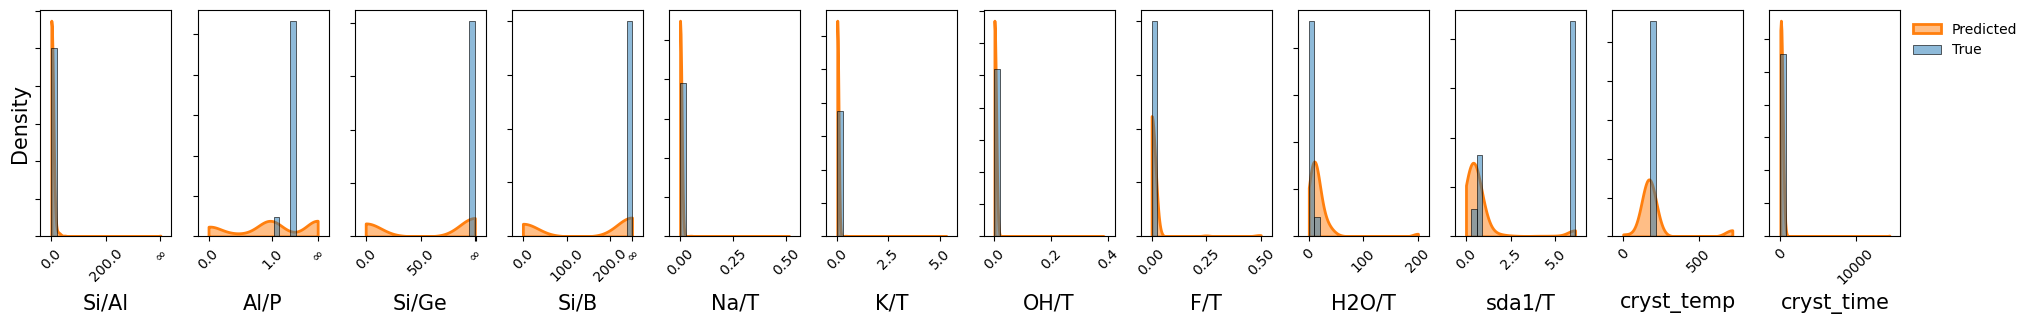

MFI CCCN(CCC)CCCCCN(CCC)CCC
MMD: 0.024694442749023438
WSD: 0.07280612033093731


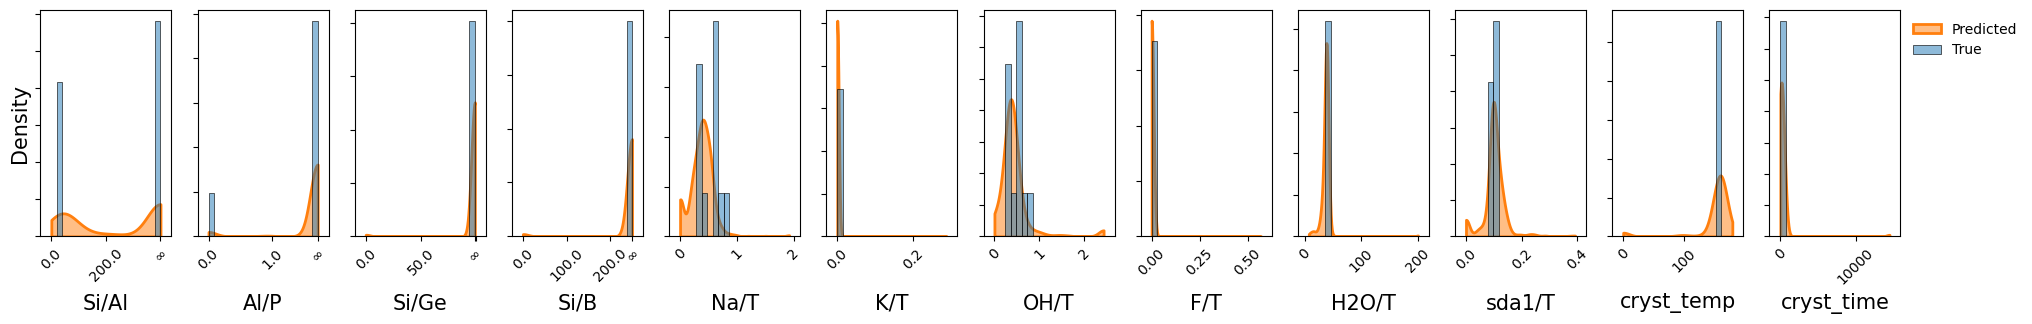

ITE NCCNCCNCCNCCNCCN
MMD: 2.599376678466797
WSD: 0.2279085946802768


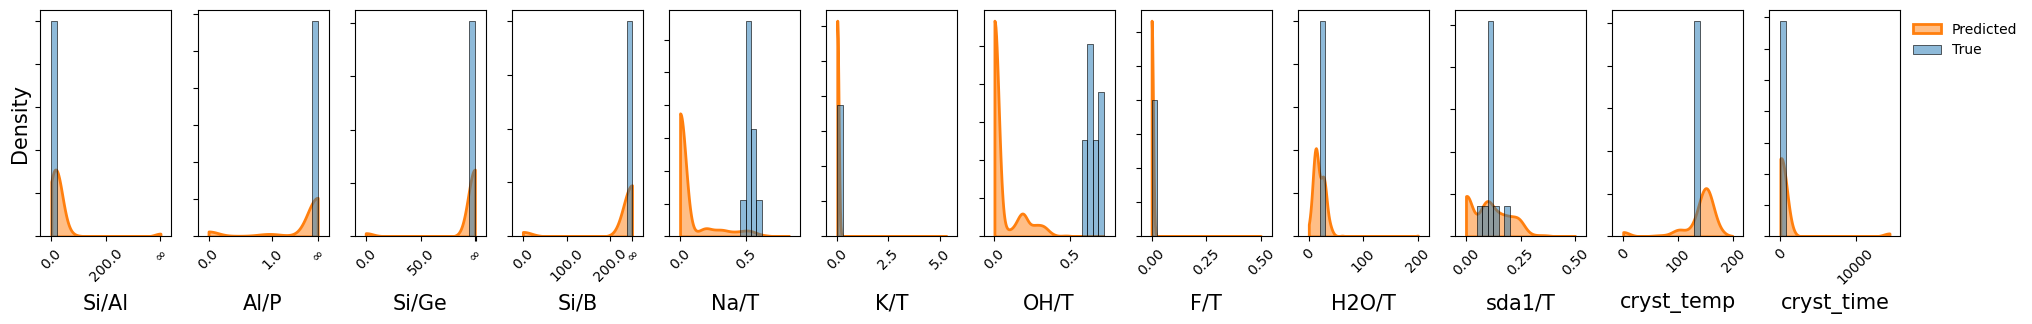

ISV CC1(C)CC2CC(C)(C1)C[N+]21CCCCC1
MMD: 1.0542593002319336
WSD: 0.3425824154024396


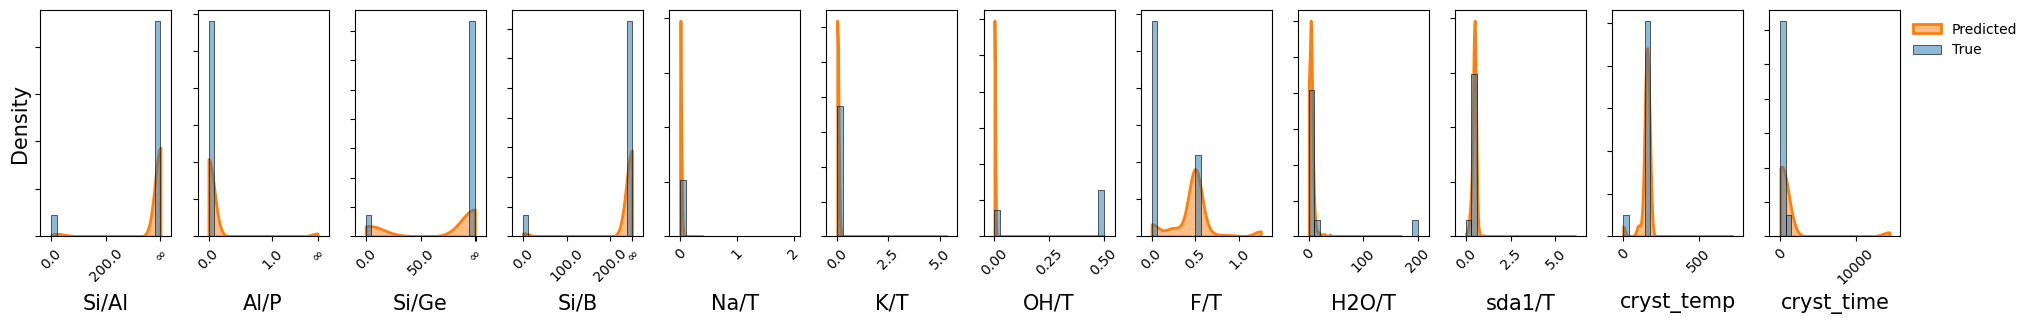

UFI CC[N+](CC)(CC)CC
MMD: 3.441661834716797
WSD: 0.8300655261089346


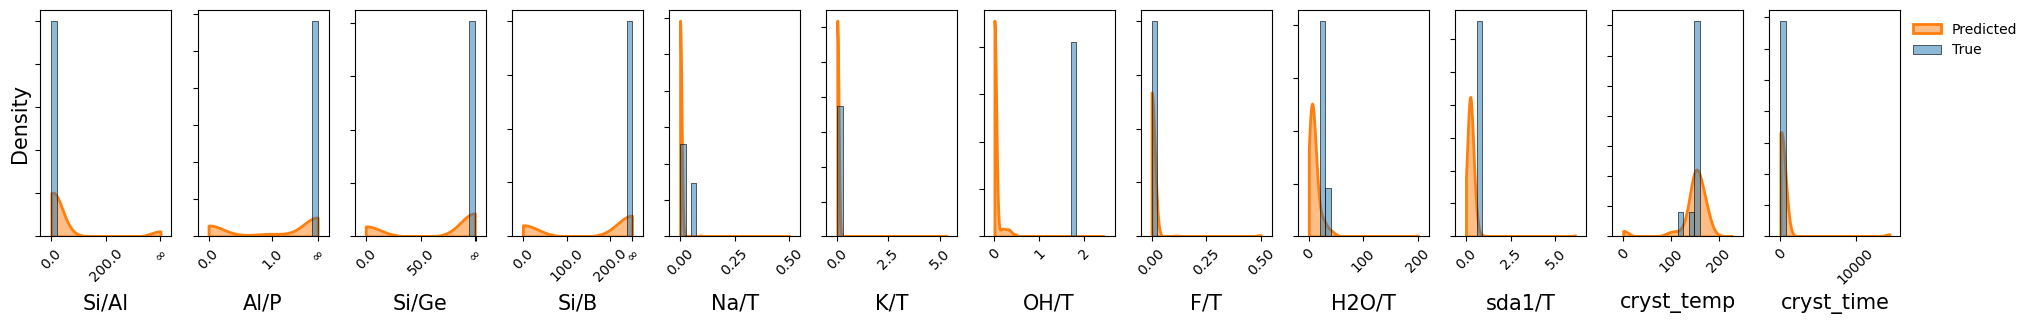

MTW C(CC[N+]12CCC(CC1)CC2)C[N+]12CCC(CC1)CC2
MMD: 1.6118335723876953
WSD: 0.5007562763430526


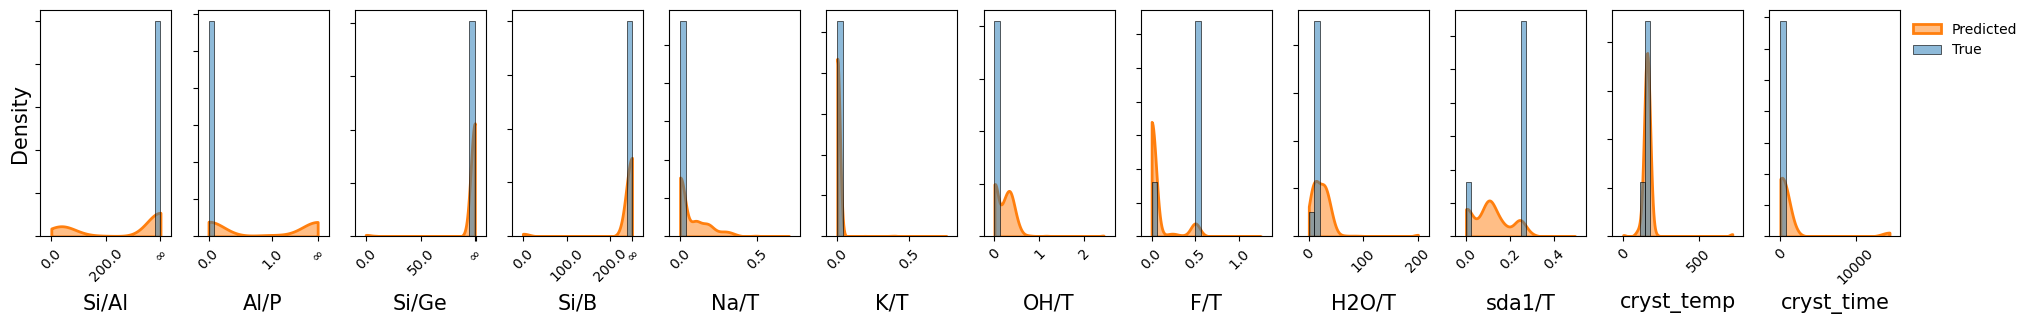

CLO C1CN2CCC1CC2
MMD: 1.4443397521972656
WSD: 0.5577139393965644


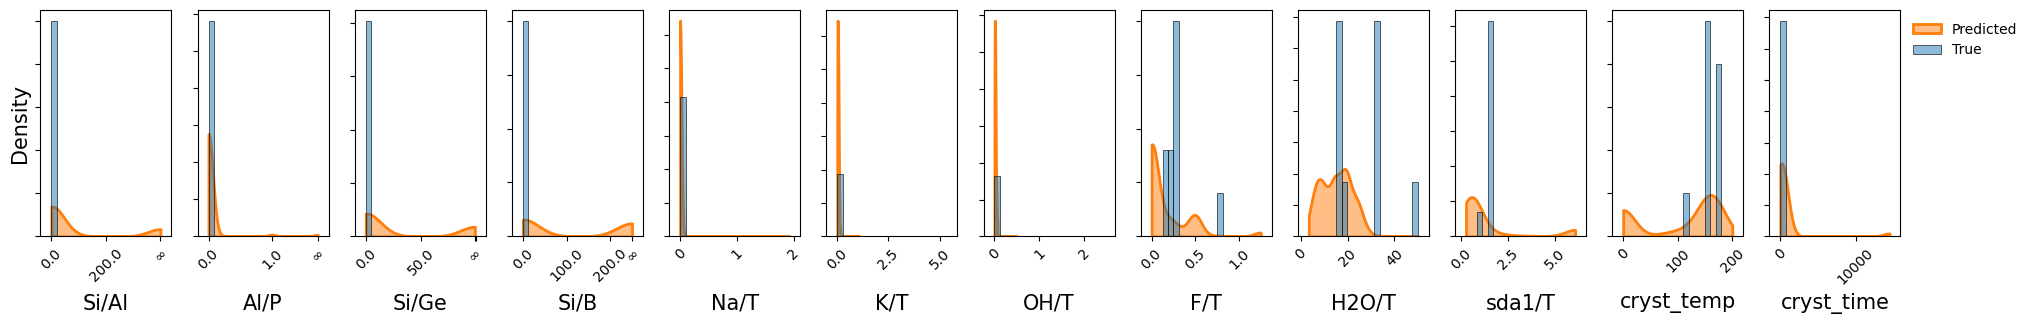

MTW CCC(CC)n1cc[n+](C(CC)CC)c1
MMD: 0.15884685516357422
WSD: 0.09044315530272892


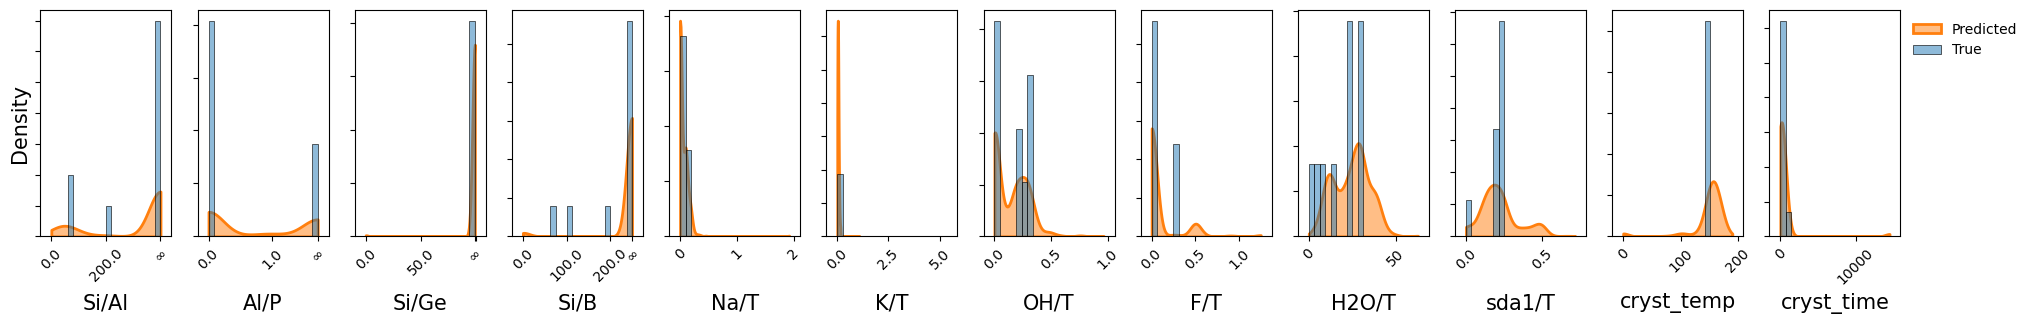

AFI [CH]1C=CC=C1
MMD: 2.8930282592773438
WSD: 0.29285877134543864


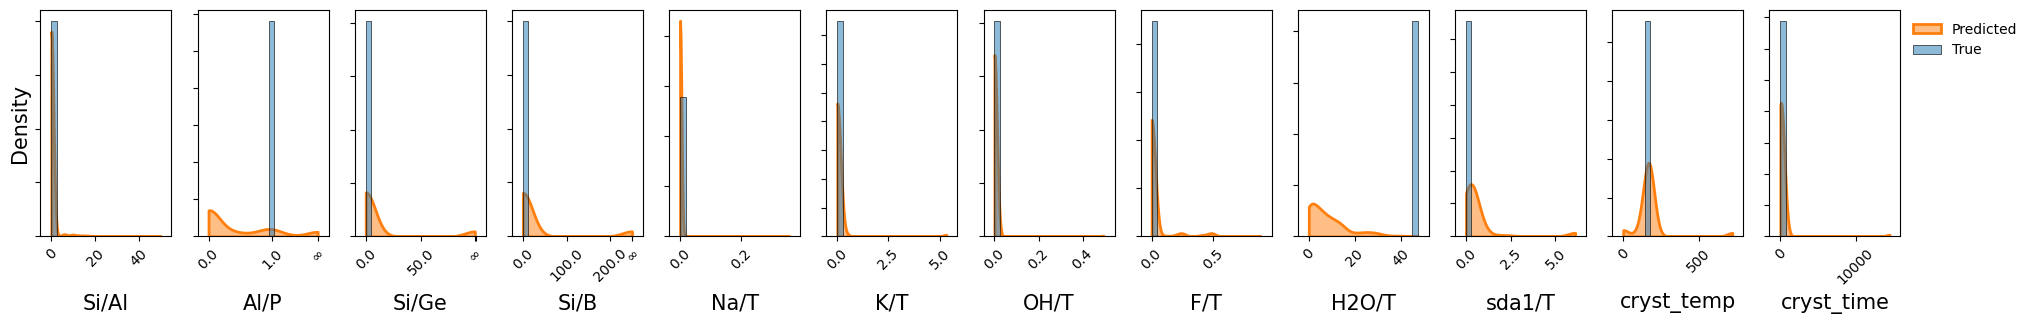

MFI CC[N+](CC)(CC)CCC[N+](CC)(CC)CC
MMD: 0.9560985565185547
WSD: 0.39847416895993765


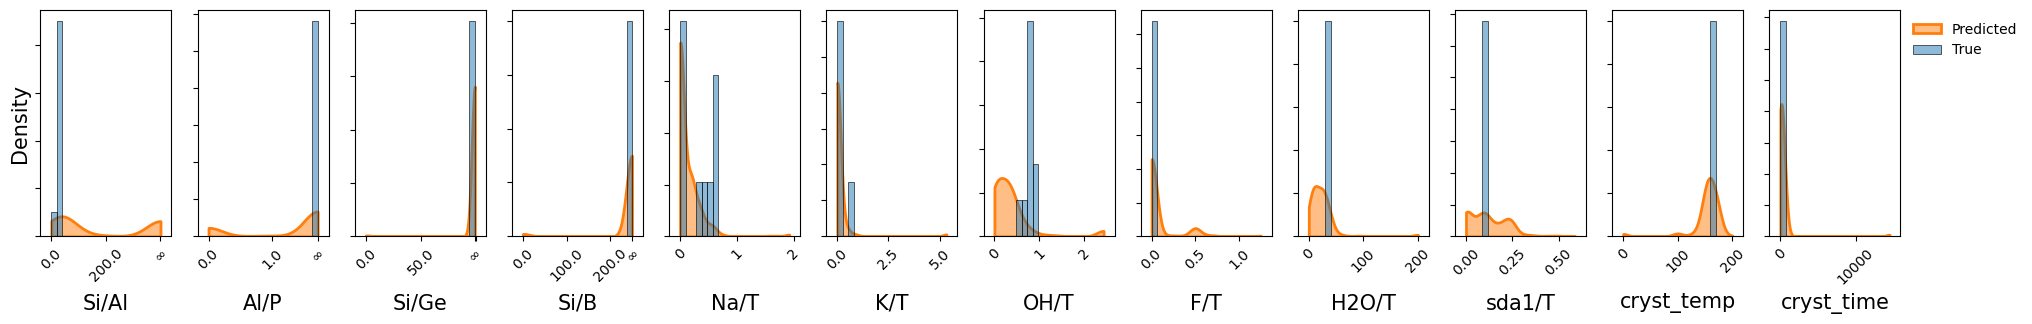

LAU c1c[nH]cn1
MMD: 0.9595365524291992
WSD: 0.3756171275832698


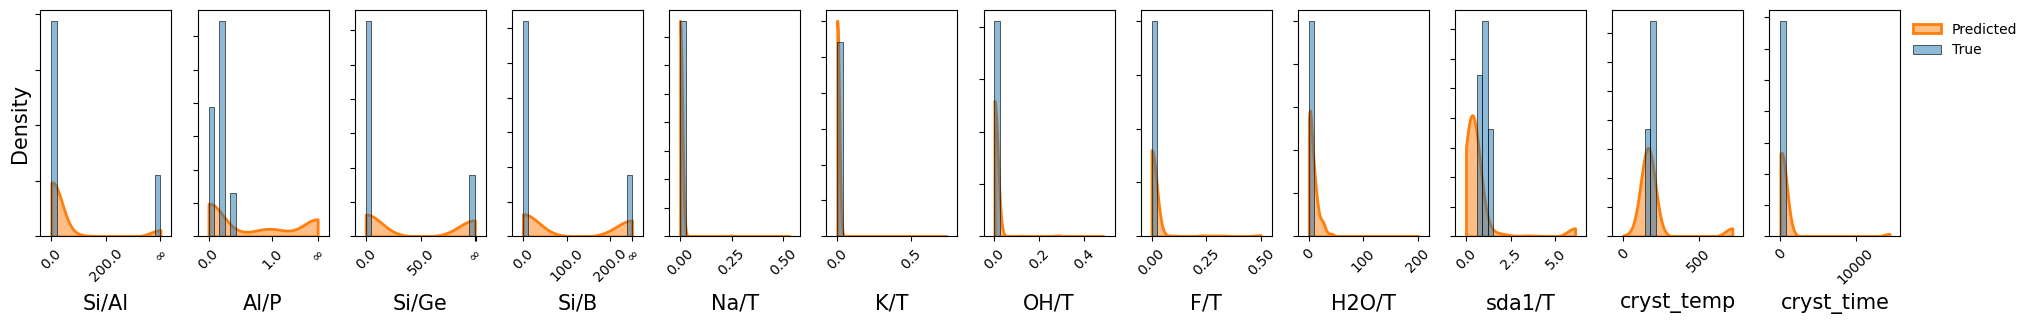

LEV CC[N+](C)(C)CC
MMD: 0.3495464324951172
WSD: 0.19408257948982438


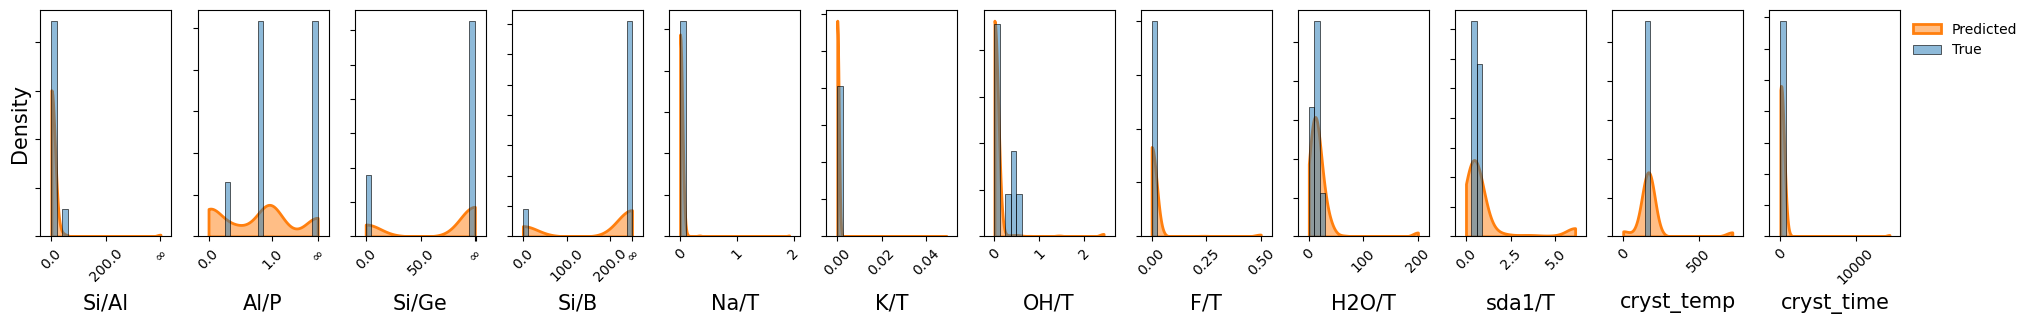

OFF C[N+](C)(C)Cc1ccccc1
MMD: 1.5082368850708008
WSD: 0.3598689867843008


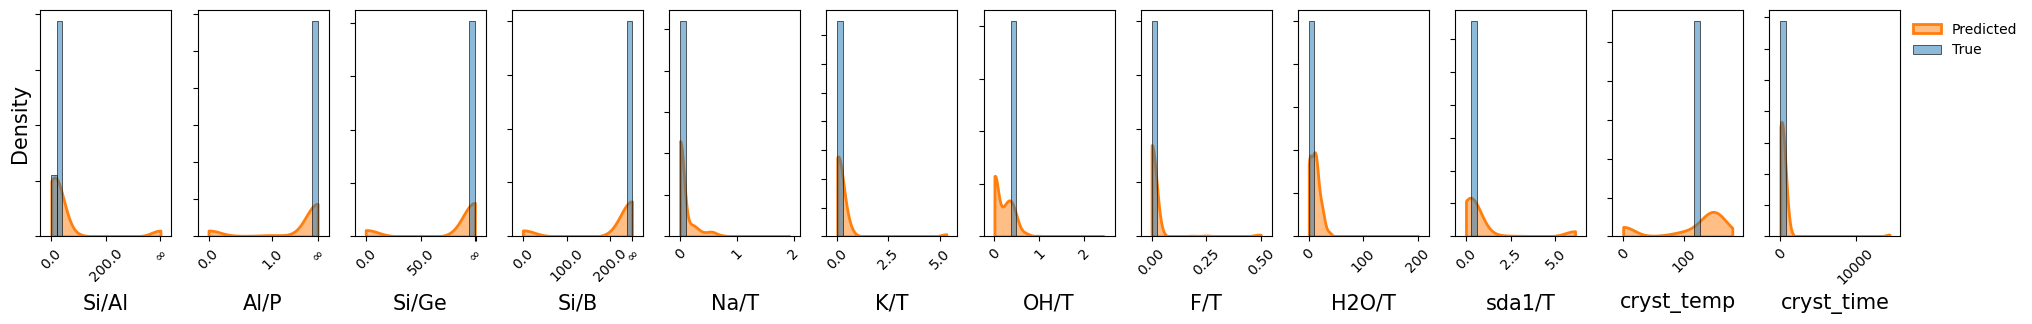

FER NCCCCN
MMD: 1.7407960891723633
WSD: 0.8560697739596421


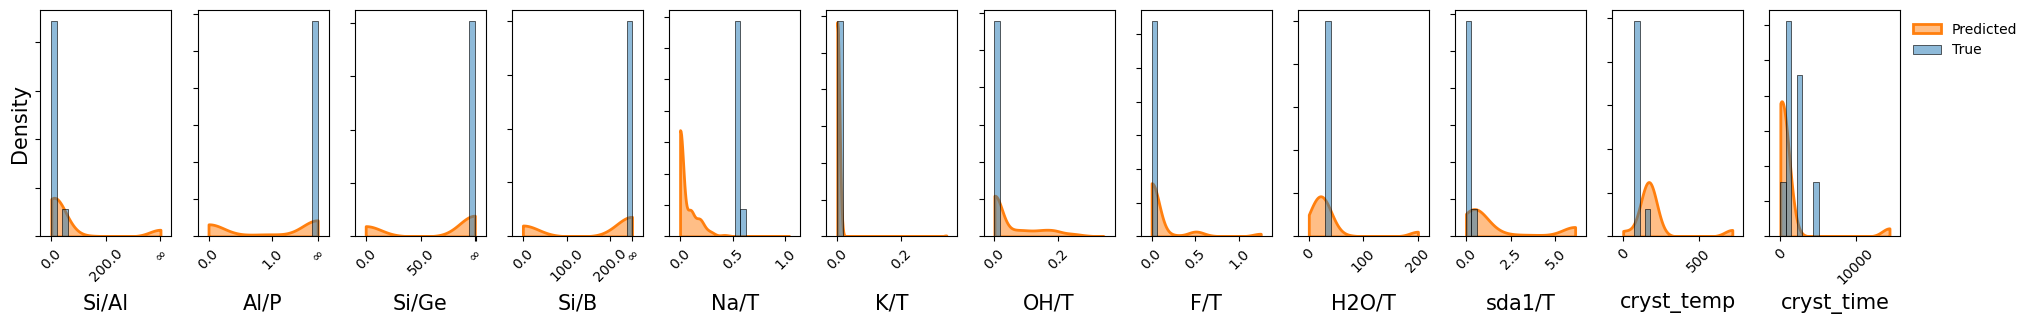

DDR C[N+]1(C)C2CCC1CC(O)C2
MMD: 0.41887378692626953
WSD: 0.10278350576435083


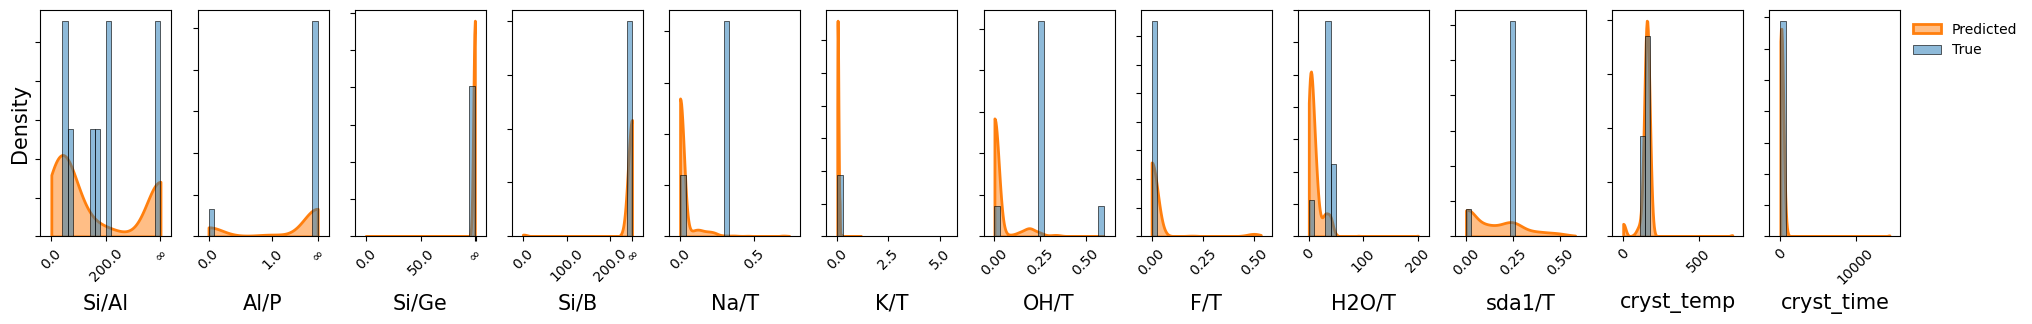

STI CC[N+](CC)(CC)CC
MMD: 3.8357462882995605
WSD: 1.2780997076503624


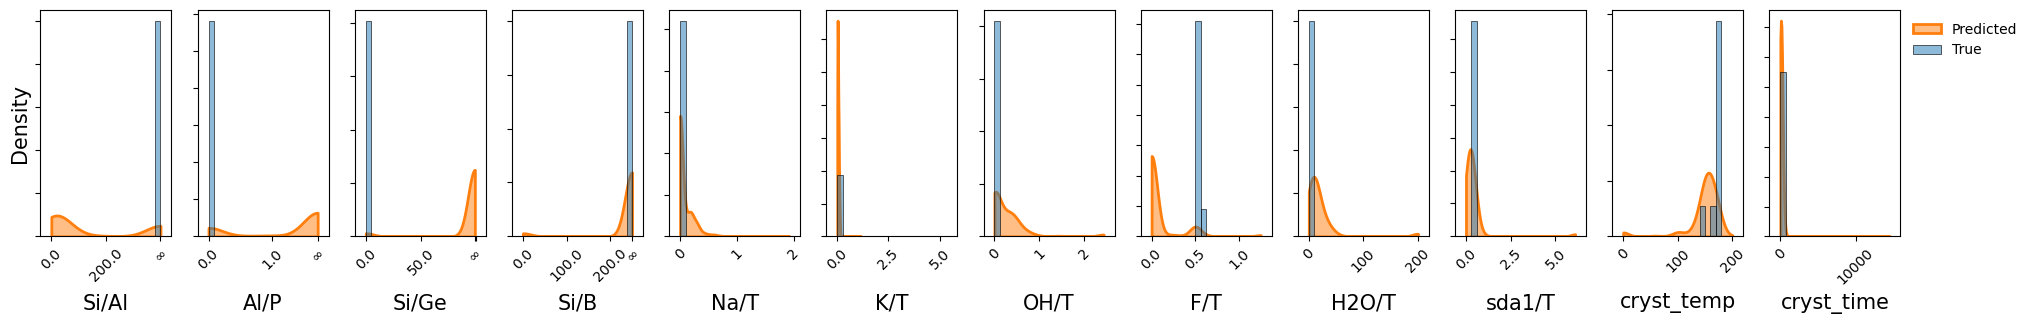

AFX C[N+]1(CCCCC[N+]2(C)CCCC2)CCCC1
MMD: 1.9428915977478027
WSD: 0.8262884234245909


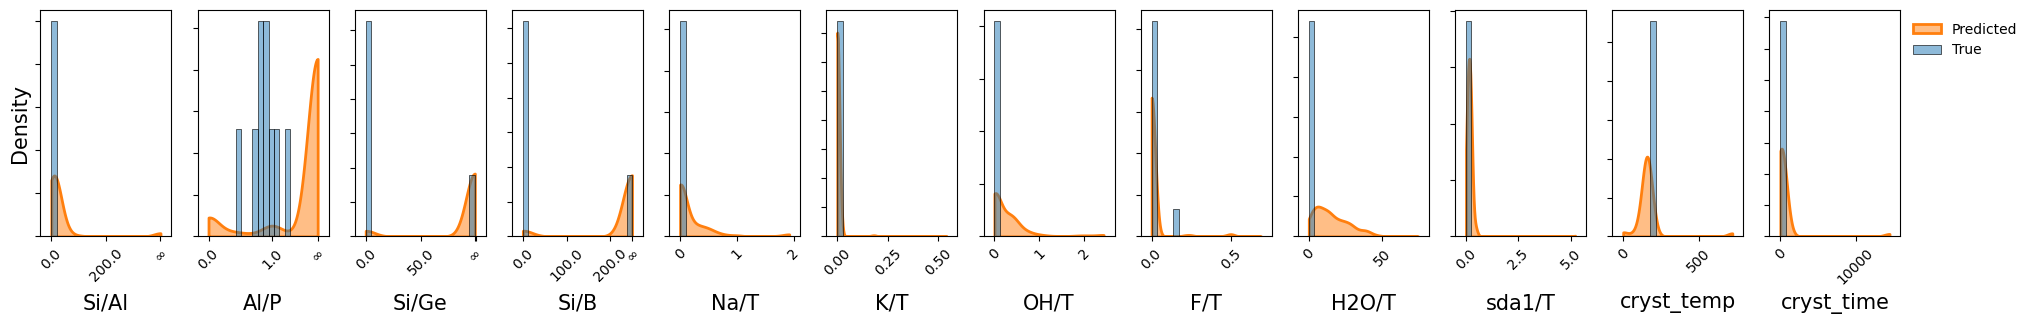

STF CC1(C)C2CCC[N+](C)(C)C1C2
MMD: 0.4860973358154297
WSD: 0.25468417209817246


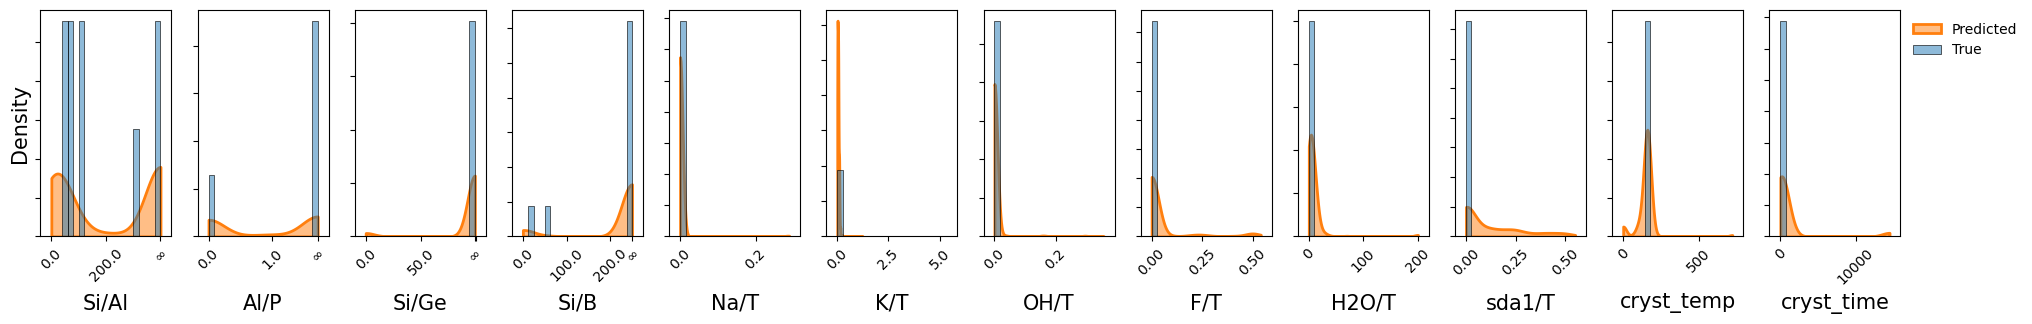

MTN C1CCNC1
MMD: 0.9405841827392578
WSD: 0.3492525017459522


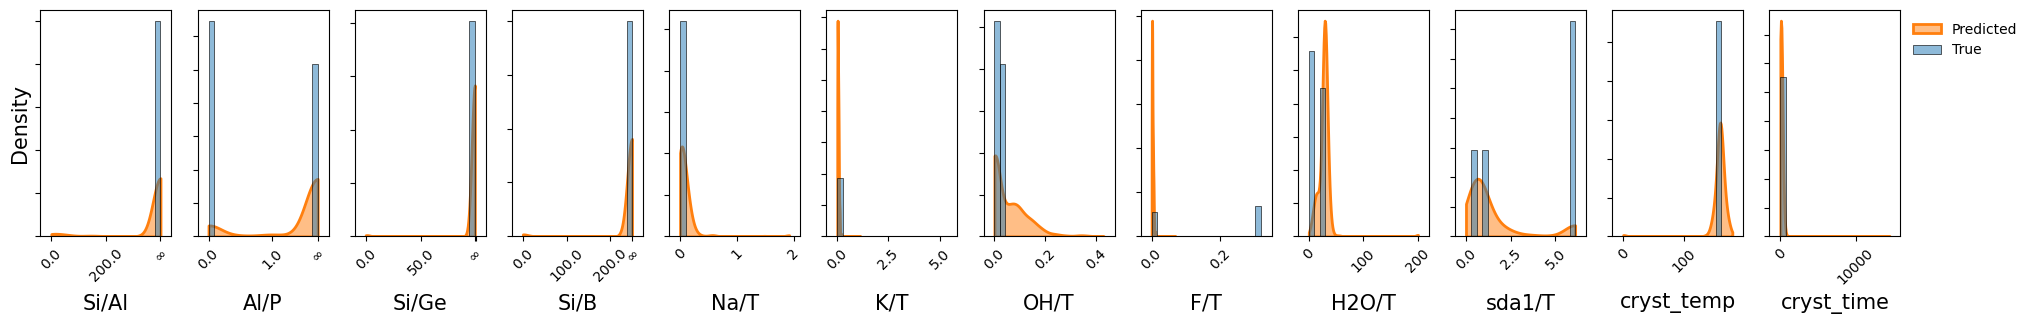

AFI CCN(C(C)C)C(C)C
MMD: 1.1713237762451172
WSD: 0.30696522128601245


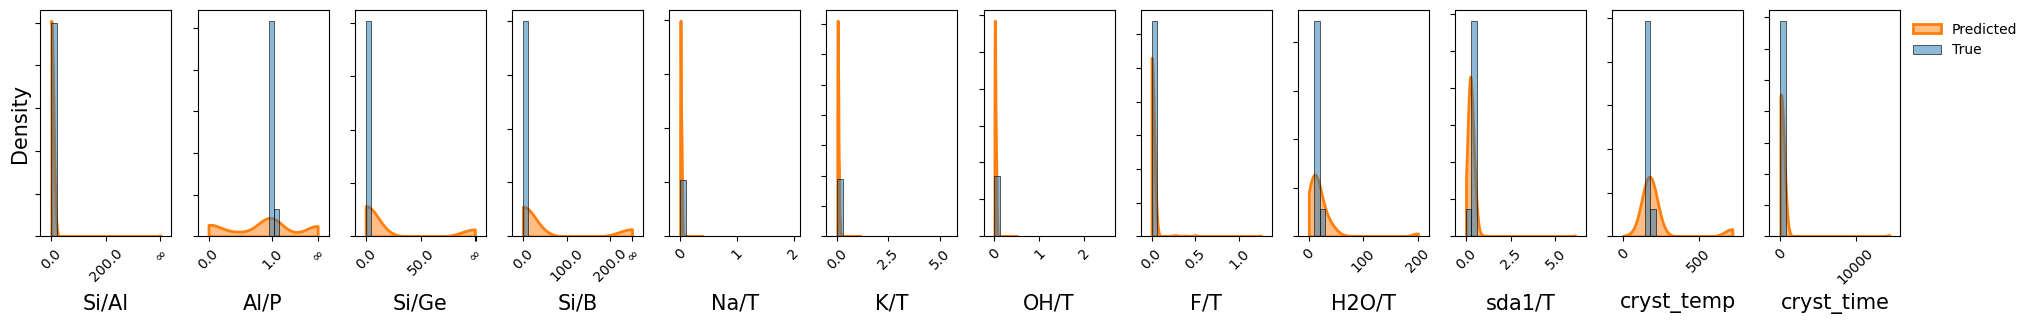

AEN CC[N+](CC)(CC)CC
MMD: 1.265146255493164
WSD: 0.42463797434058065


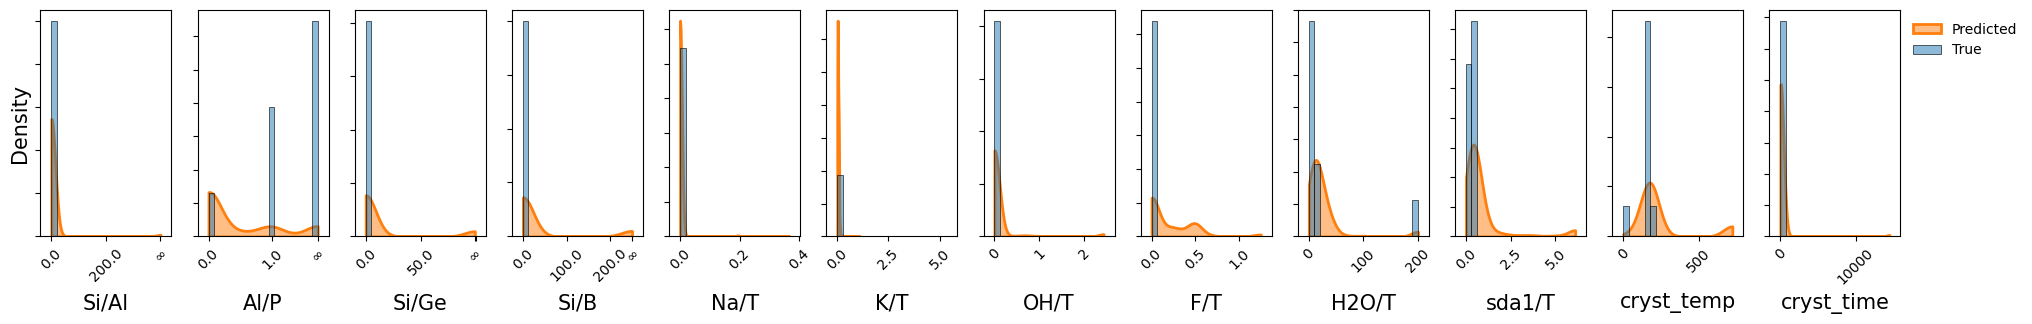

BEA c1ccc(C[N+]23CCC(CC2)CC3)cc1
MMD: 0.9929056167602539
WSD: 0.2571429295316172


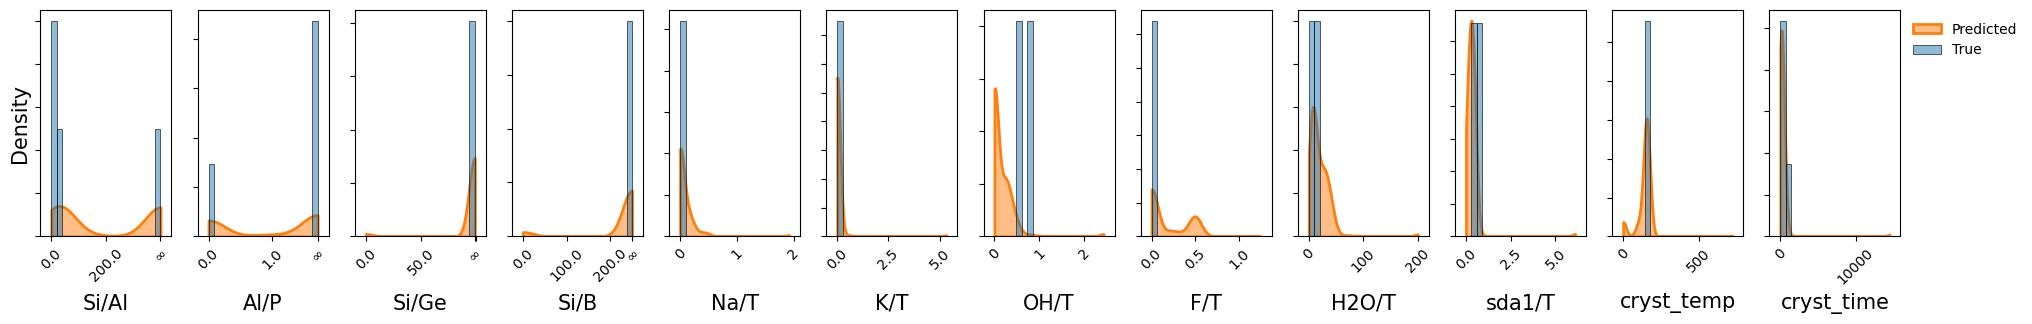

AST CC(C)[N+](C)(C)C
MMD: 1.0743417739868164
WSD: 0.5263104560192138


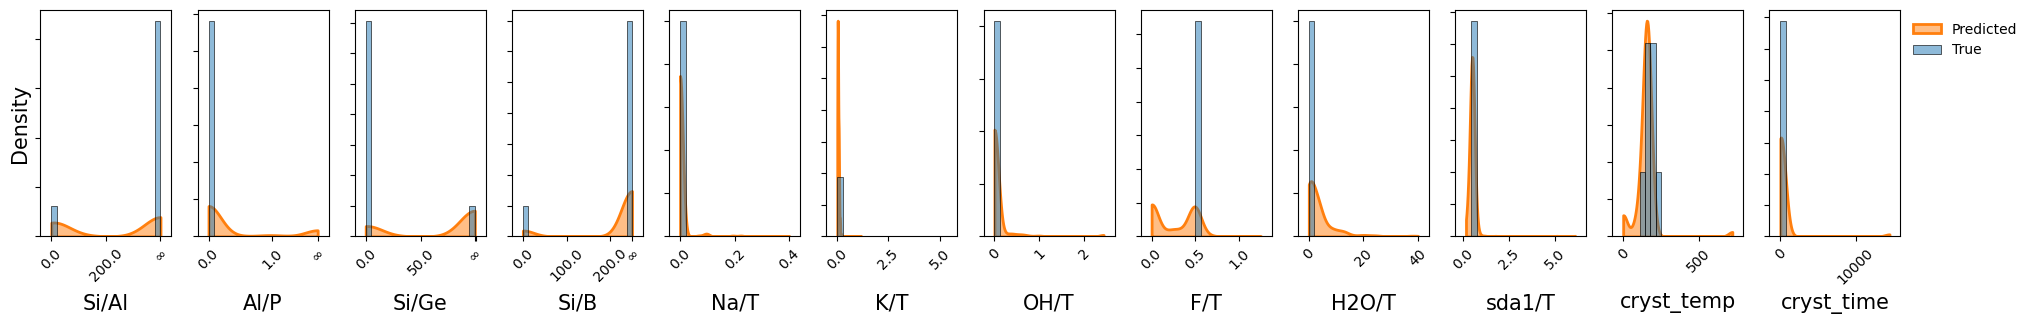

MTW C1CN2CCN1CC2
MMD: 1.741551399230957
WSD: 0.36027099123441053


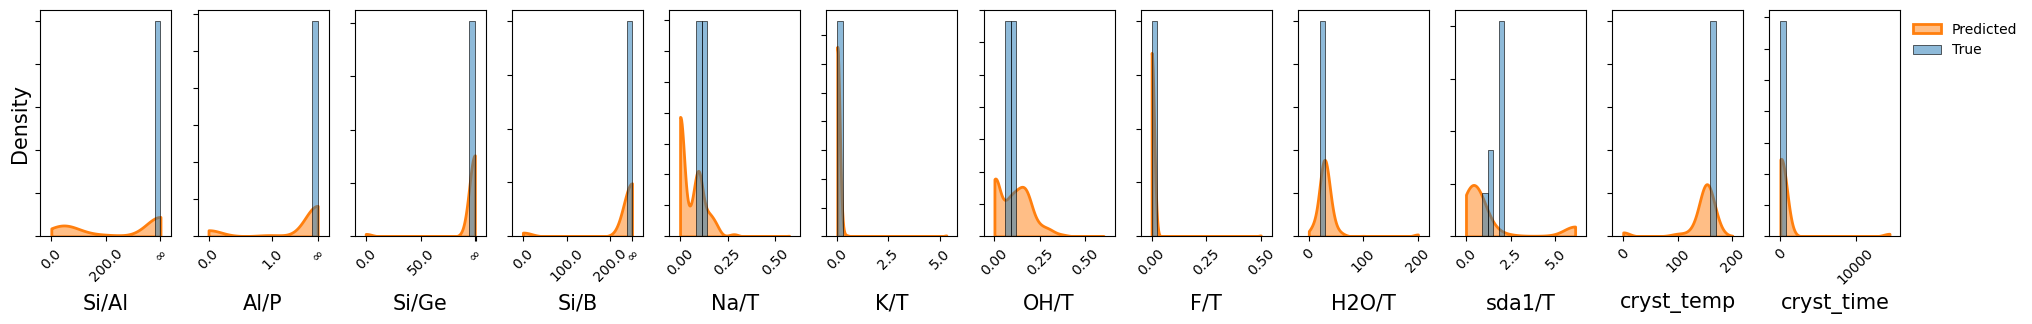

BEC CCC[N+]1(CCC)CCC([N+]2(CCC)CCCC2)CC1
MMD: 0.6381726264953613
WSD: 0.4196731142846726


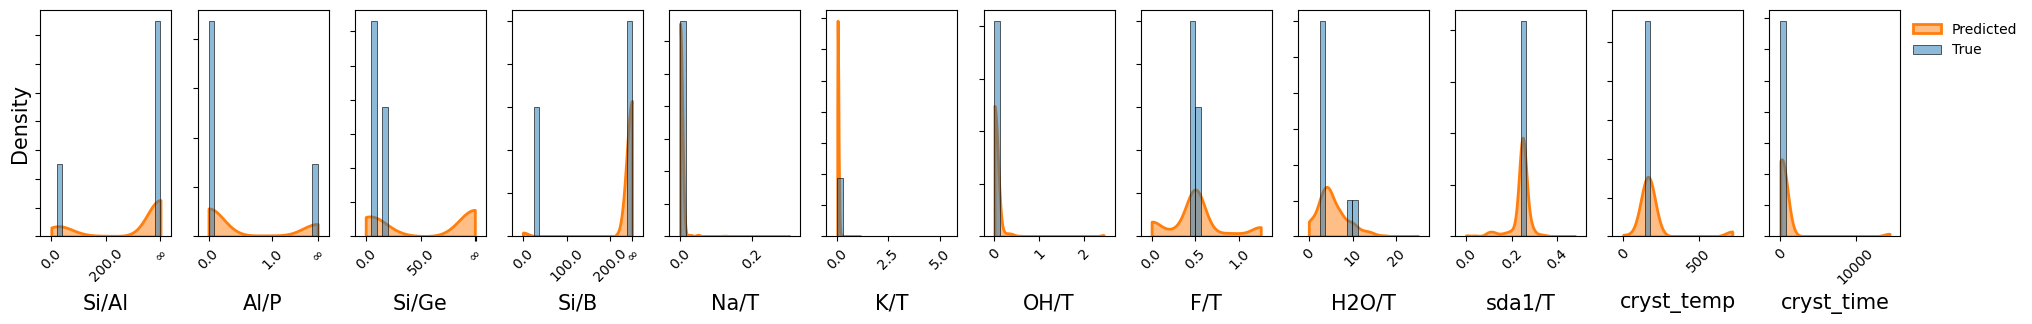

MTW C1CCC[N+]2(CC1)CCCCC2
MMD: 1.2578401565551758
WSD: 0.3865788905001625


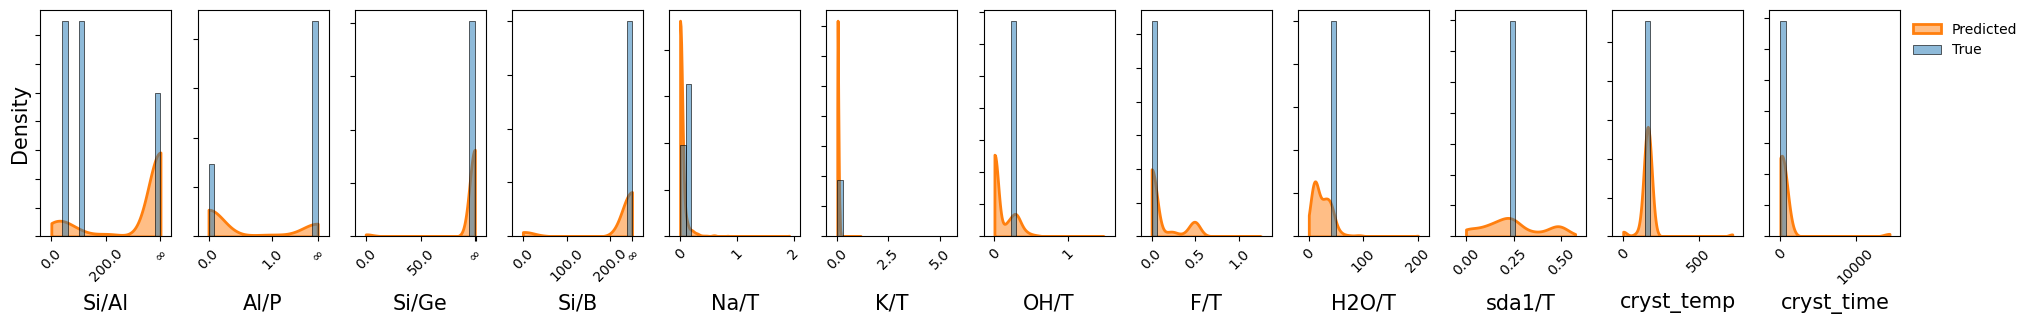

BEC OCC1CCCN1Cc1cccc(CN2CCCC2CO)c1
MMD: 1.8448257446289062
WSD: 0.3594541995943521


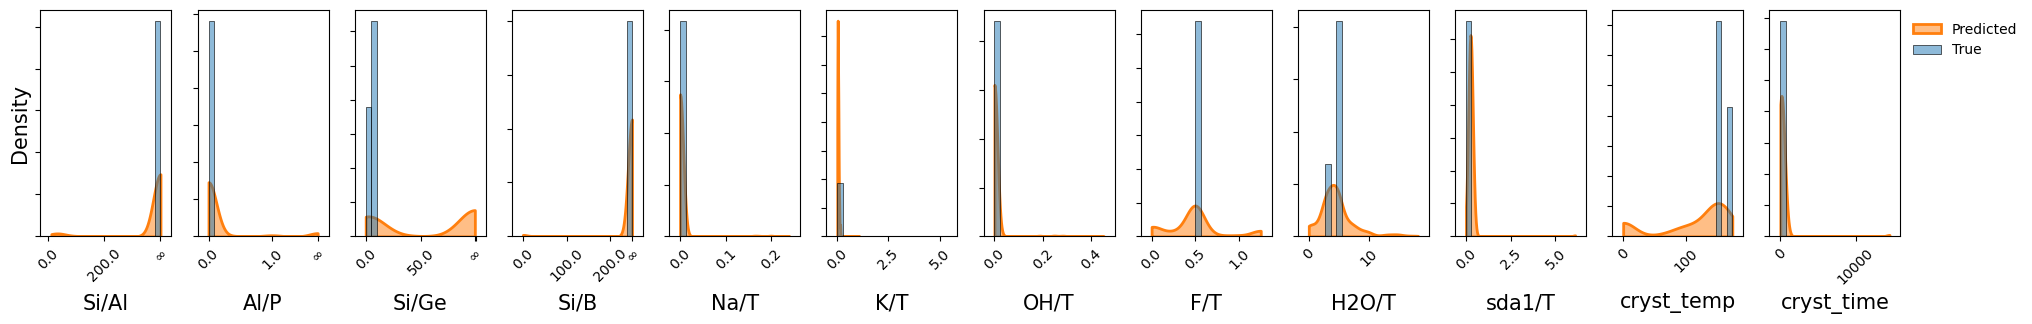

ITE C1CC[N+]23CCCCC2(C1)CCCC3
MMD: 2.274600028991699
WSD: 0.6743245964750595


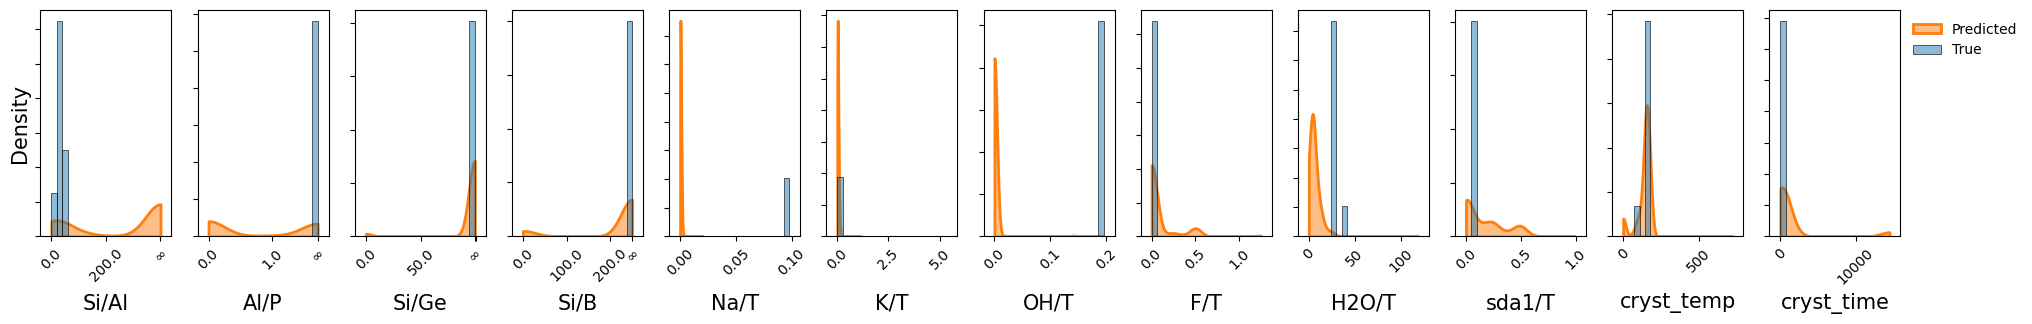

MFI C1CCNC1
MMD: 0.36953258514404297
WSD: 0.2188009123175867


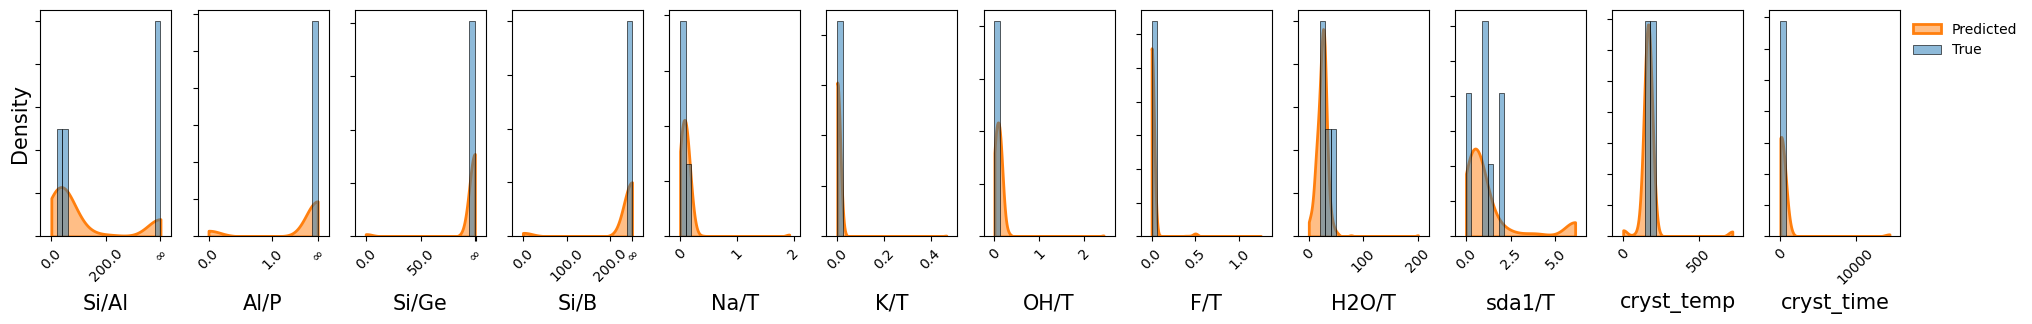

MTW CC(C)(C)c1cccc(C(C)(C)C)n1
MMD: 2.141796112060547
WSD: 0.7725138699513235


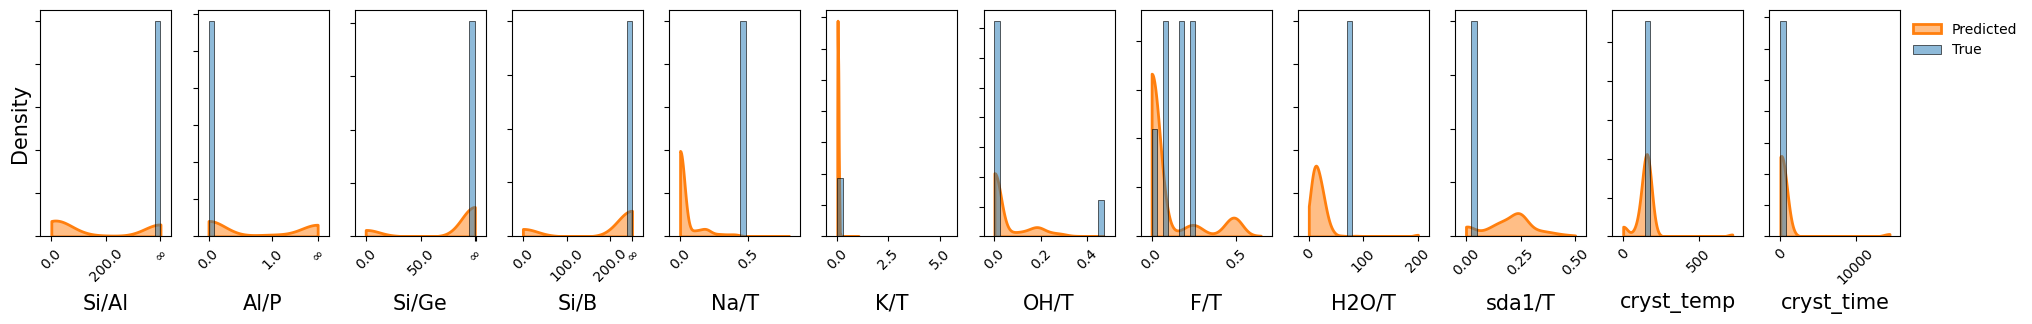

NON CC1CCCN1
MMD: 1.4487543106079102
WSD: 0.7244255748612406


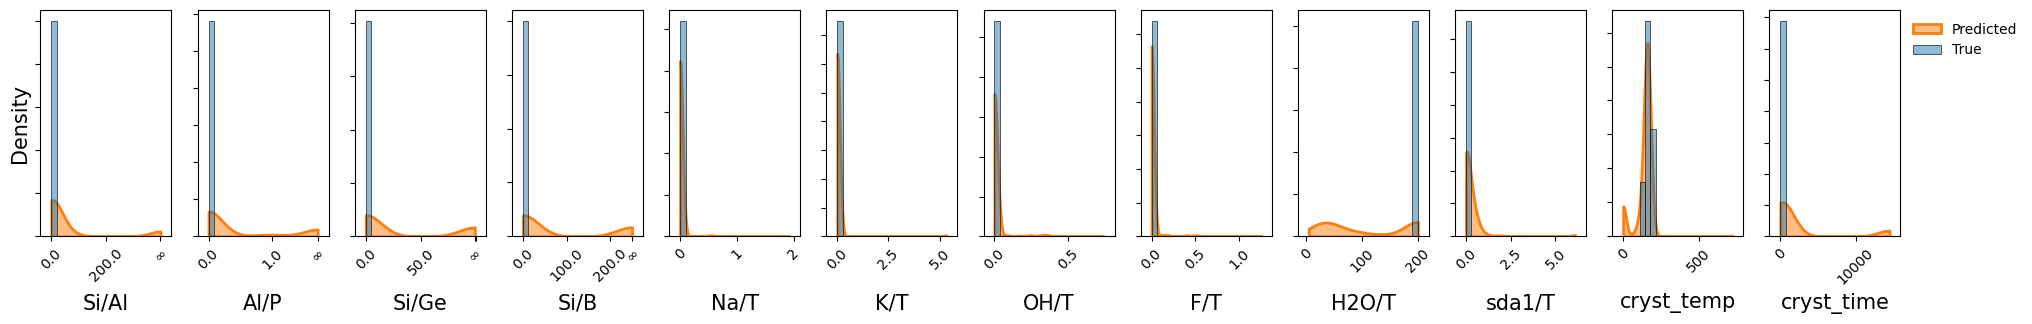

SFS CC[N+]1(CC)C(C)CC[C@H]2CCCCC21
MMD: 2.930917263031006
WSD: 0.6648411703993231


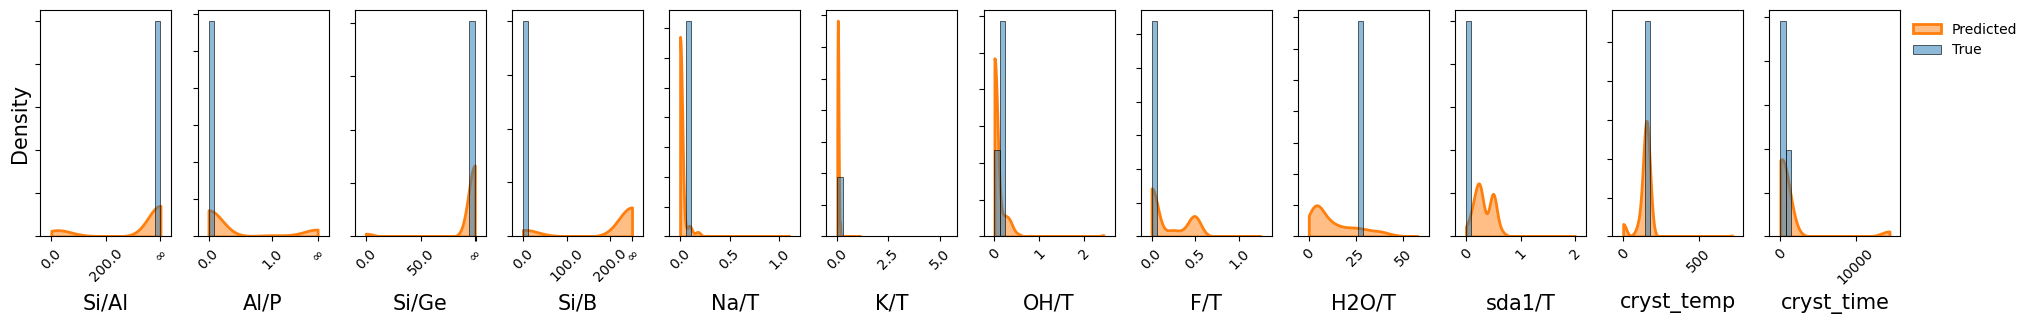

MTN N[C@@H]1C[C@H]2CC[C@@H]1C2
MMD: 1.6505274772644043
WSD: 0.52042812390495


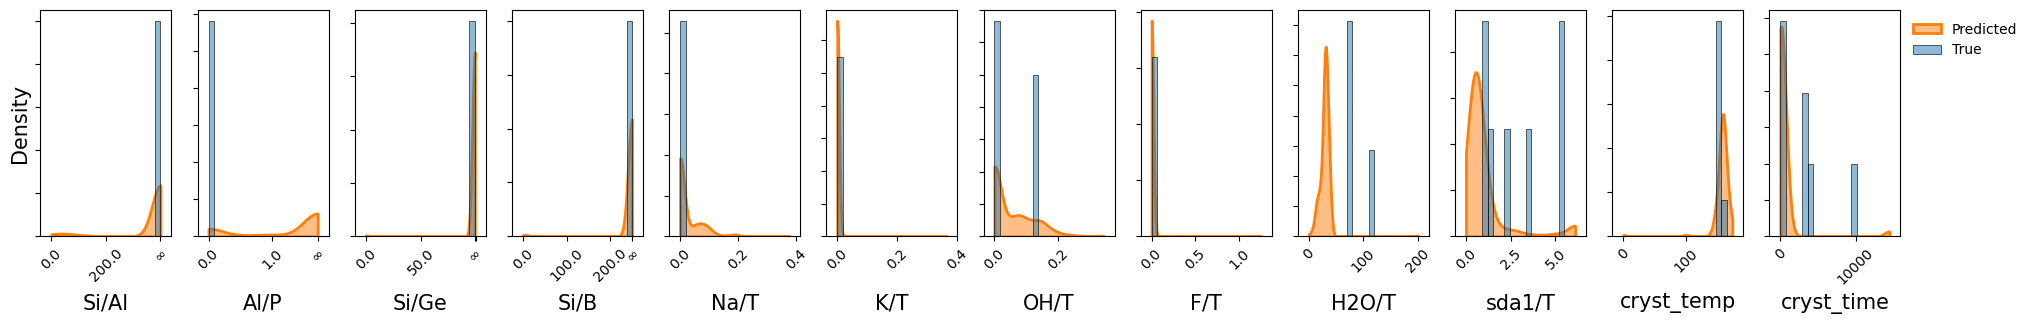

STF CC12CCC(C[N+](C)(C)C1)C2(C)C
MMD: 0.08507537841796875
WSD: 0.31839240931070445


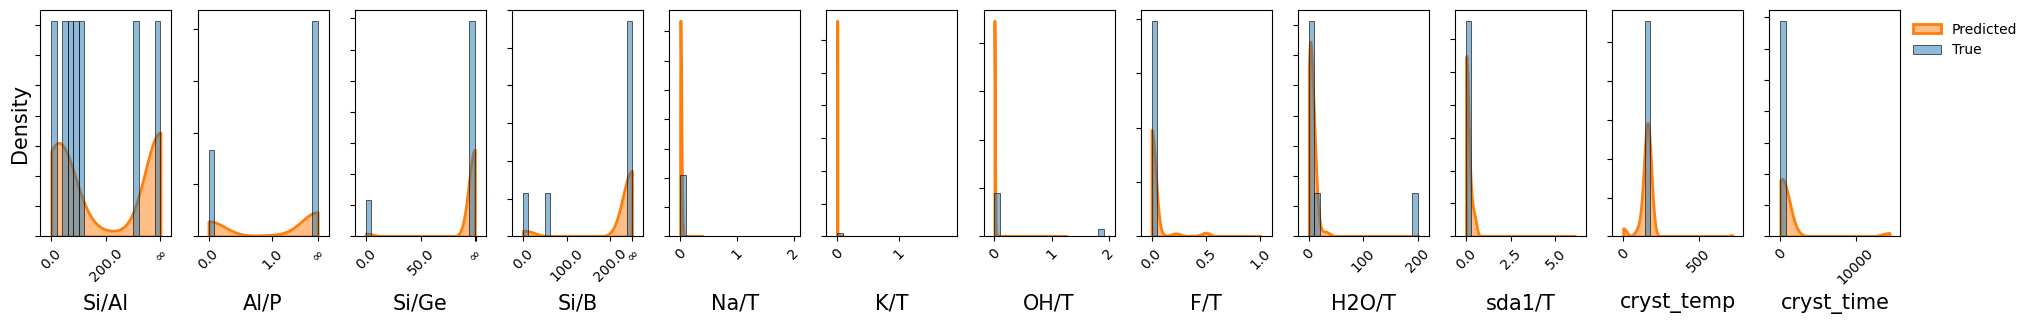

BEC CC[N+](CC)(CC)Cc1ccccc1
MMD: 0.8036022186279297
WSD: 0.486798448801555


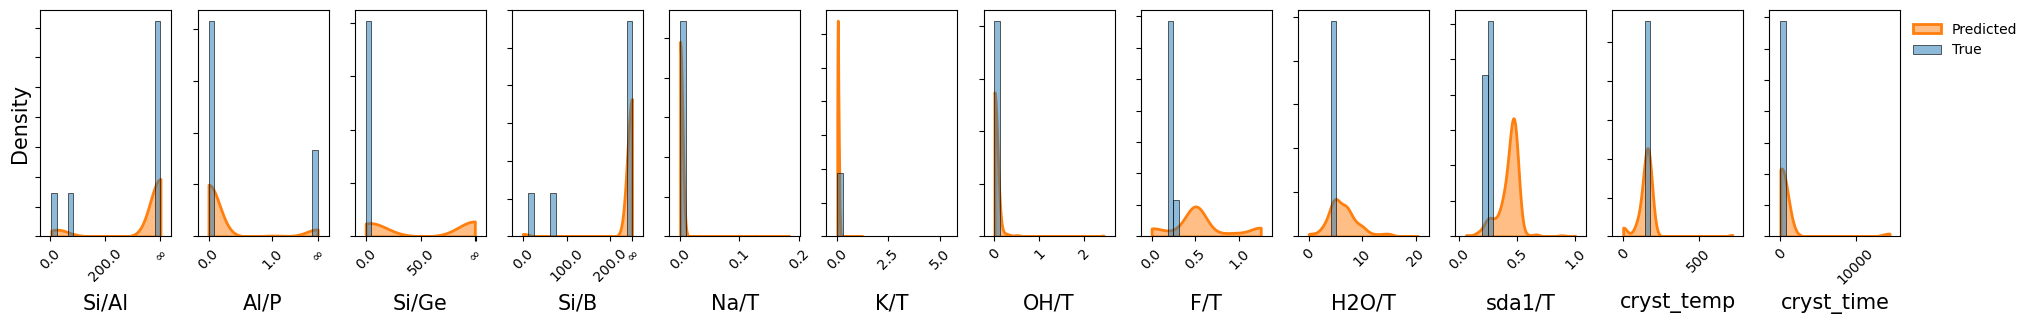

CHA CN(CCO)CCO
MMD: 1.4336128234863281
WSD: 0.523672149209492


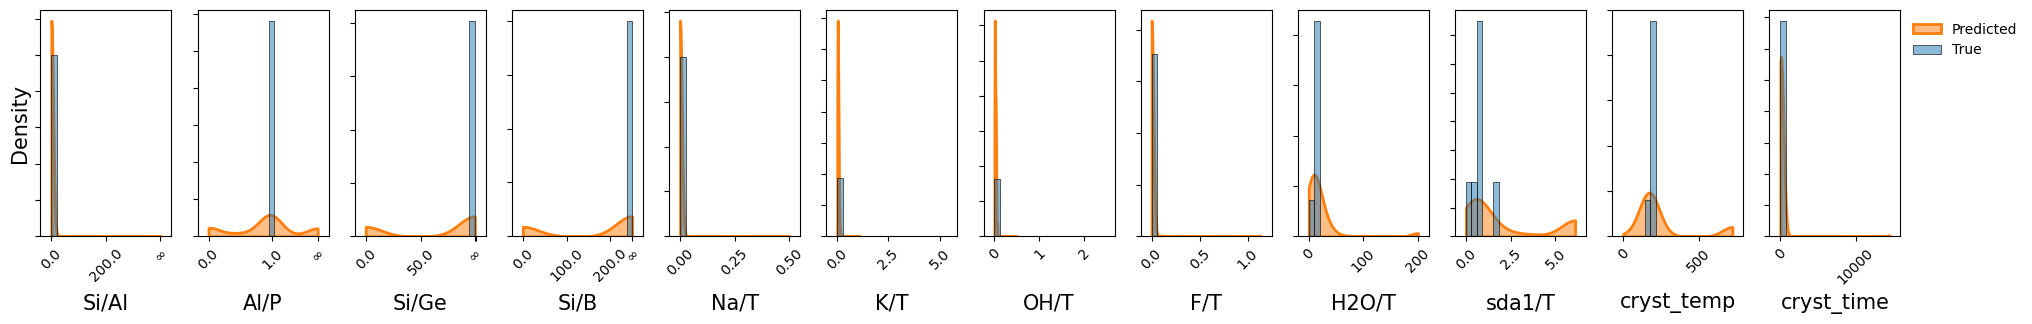

FAU Cc1cccc(C)[n+]1C
MMD: 0.6684722900390625
WSD: 0.13489939063785839


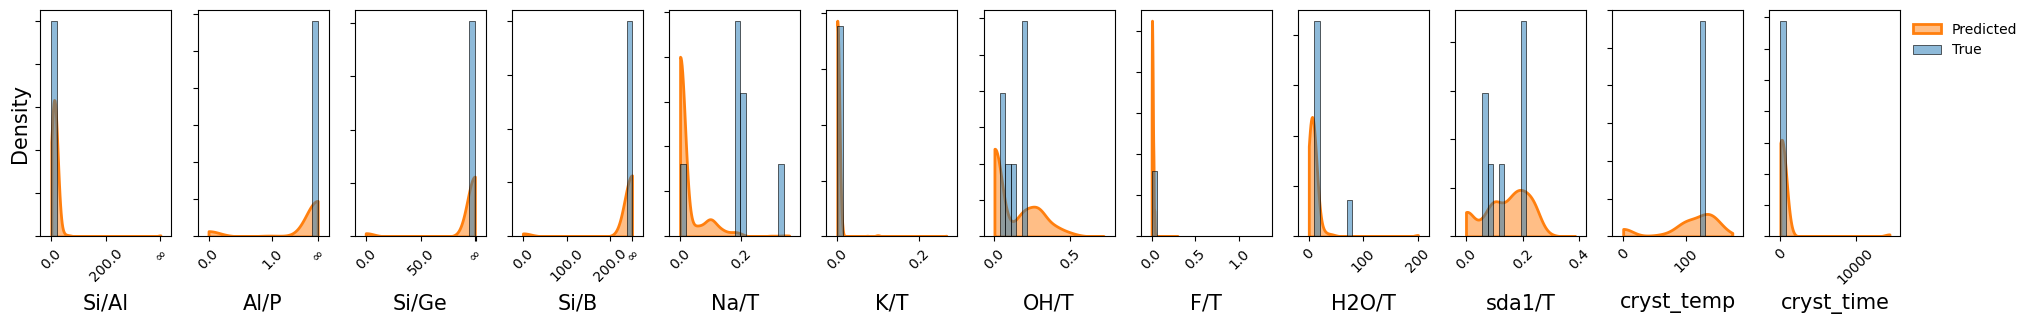

NON CC1CCCCN1
MMD: 1.1186513900756836
WSD: 0.6937725453639578


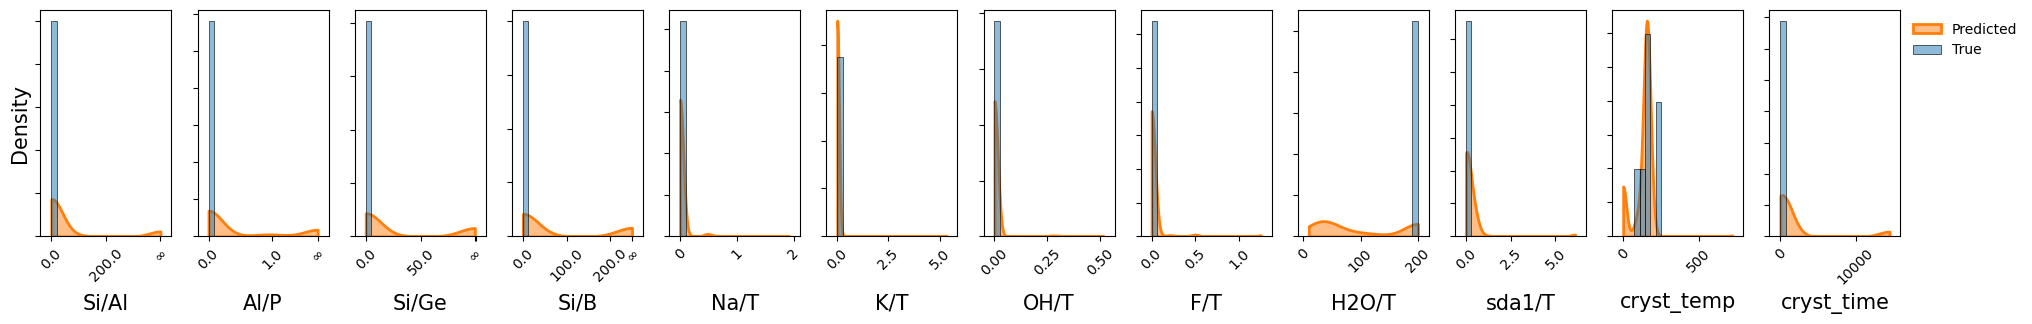

CHA CN1CCNCC1
MMD: 1.9851508140563965
WSD: 0.722688677803053


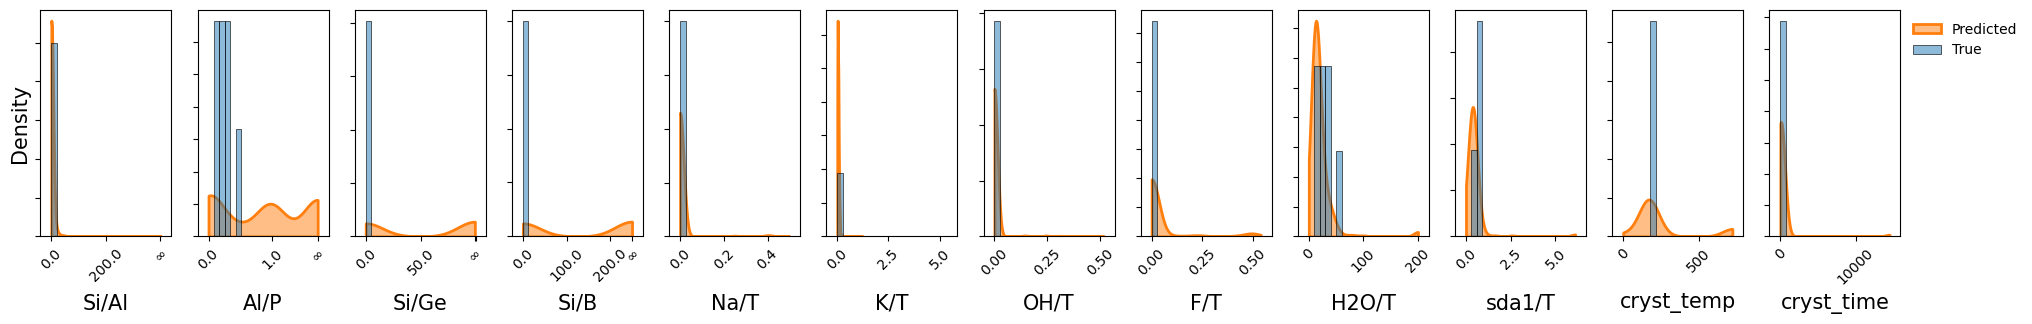

ERI C[N+]1(C)CCCCC1
MMD: 1.6012754440307617
WSD: 0.23911509528714503


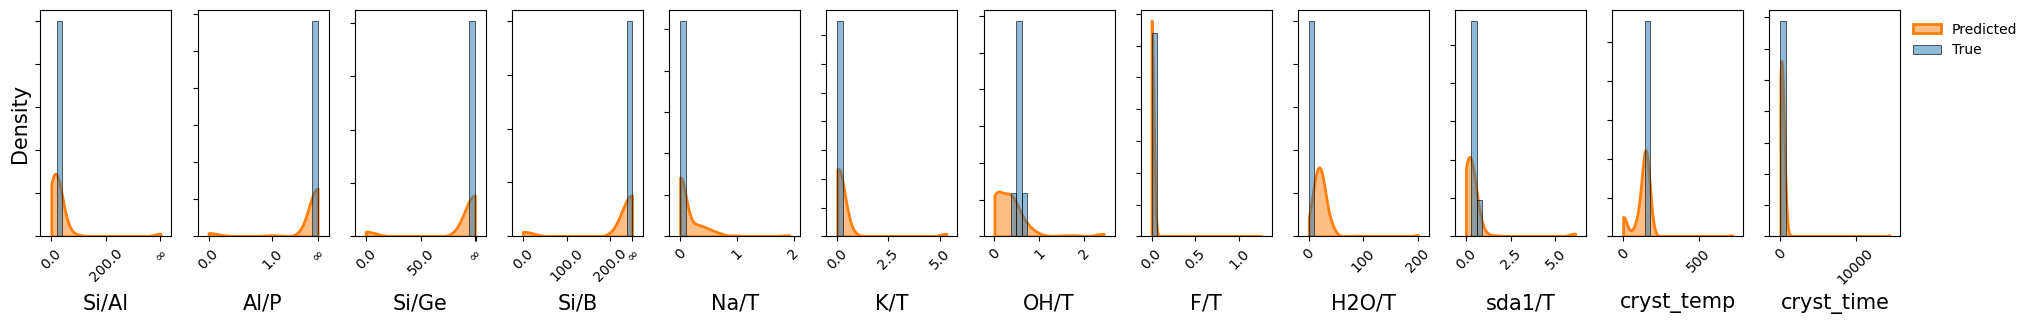

AFI C1CCCNCC1
MMD: 0.5916833877563477
WSD: 0.3740582788824316


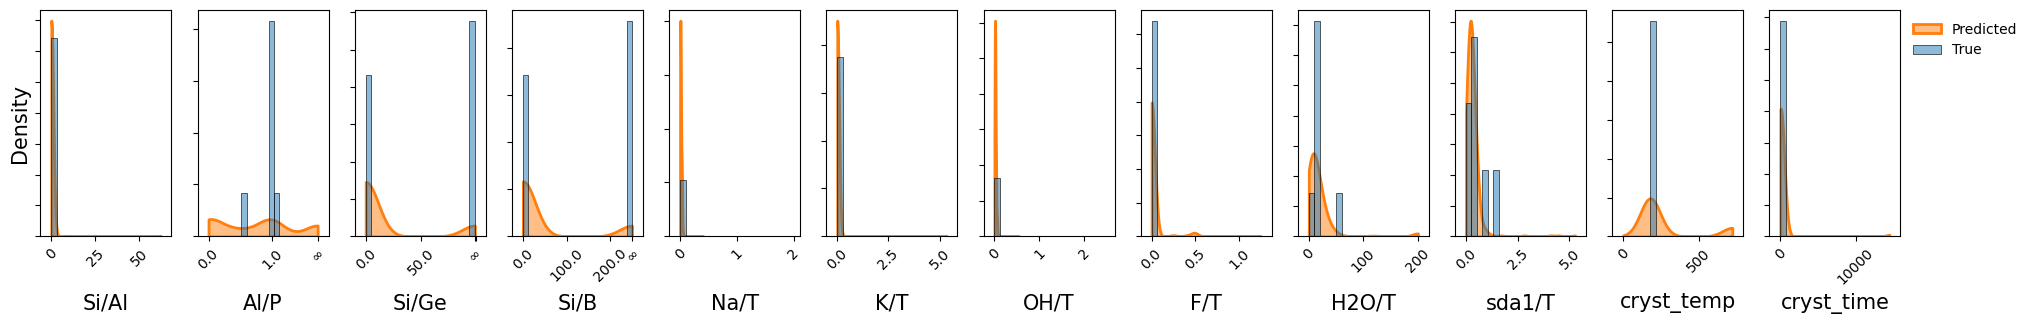

BEA CCC[N+]1(CCC)CCC([N+]2(CCC)CCCC2)CC1
MMD: 1.6716485023498535
WSD: 0.7482003183259988


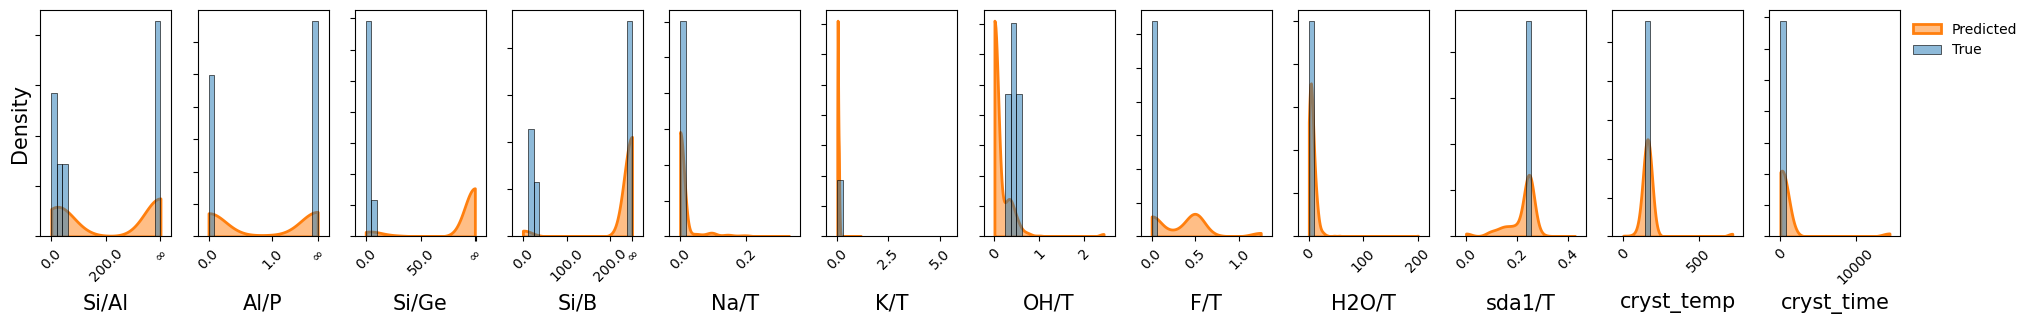

ITE C[N+]1(C)CCCCC2CCCCC21
MMD: 1.8940191268920898
WSD: 0.6200323145464397


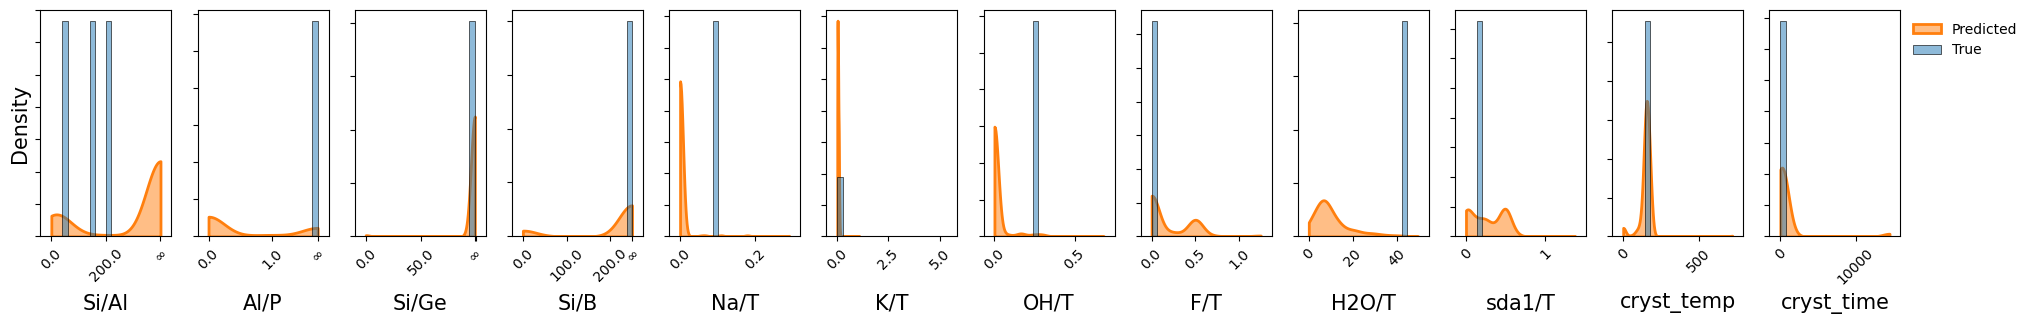

MFI CCCCCCCCCCCCCCCCCC[N+](C)(C)CCCCCC[N+](C)(C)CCCCCC
MMD: 0.7351350784301758
WSD: 0.3507891072955572


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: max must be larger than min in range parameter.

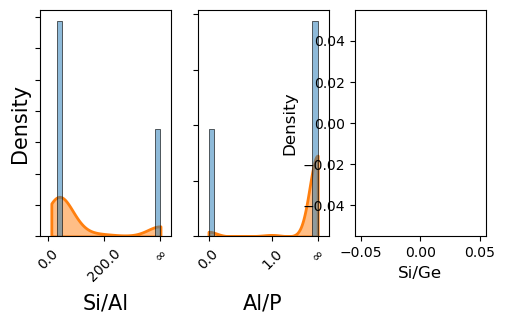

In [13]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 0.58563232421875
WSD: 0.2317287655838523


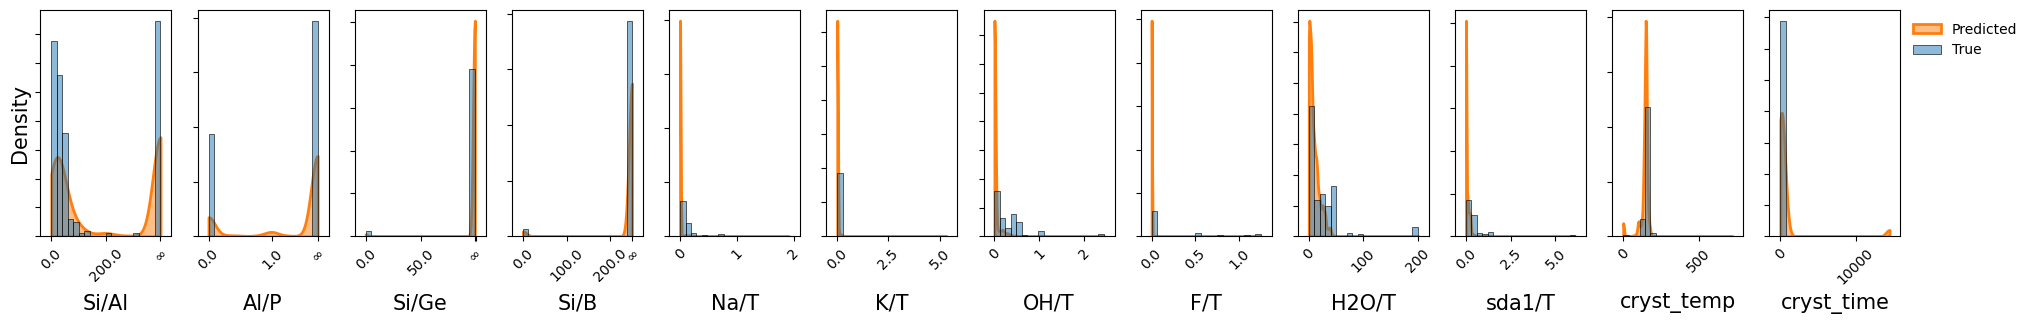

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')